# Modèle ARIMA 

In [1]:
!pip install pmdarima

In [2]:
import numpy as np # linear algebra
import pandas as pd # dataframes, data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plots
# Tools from Scikit Learn library:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA, ARMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

import itertools
import statsmodels as stat
sns.set()

from scipy import stats



## Importation de data

In [3]:
# Loading the dataset as a Pandas DataFrame
df=pd.read_csv('ETG1.csv')
df

Unnamed: 0                       _id  RealP2  RealP3  RealP1  Vrms1  \
0                0  61d9cefbdd4ae07ecb861f64     8.5    25.8     3.2  260.3   
1                1  61d9cefbdd4ae07ecb861f68    12.4    23.7     7.6  260.5   
2                2  61d9cefbdd4ae07ecb861f6c     8.9    25.3     3.0  260.4   
3                3  61d9cefbdd4ae07ecb861f70    11.0    22.3     7.0  260.5   
4                4  61d9cefbdd4ae07ecb861f74    11.6    27.2     4.2  260.5   
...            ...                       ...     ...     ...     ...    ...   
862352      862352  62141bb4dd4ae07ecbbab1b4    12.0    28.2     6.6  259.3   
862353      862353  62141bb9dd4ae07ecbbab1b8     9.6    22.7     7.8  259.1   
862354      862354  62141bbedd4ae07ecbbab1bc    13.1    27.9     7.7  259.2   
862355      862355  62141bc3dd4ae07ecbbab1c0     7.6    24.4     8.4  259.1   
862356      862356  62141bc9dd4ae07ecbbab1c4    11.6    24.9   162.2  259.2   

        ETG                 date   index  Vrms2  Irms2  Irms3  Irms1  PowerF2  \
0         1  2022-01-01 00:00:02   59338  258.4  239.3  284.1  342.7    0.138   
1         1  2022-01-01 00:00:07   59339  258.3  240.5  272.0  332.6    0.200   
2         1  2022-01-01 00:00:13   59340  258.3  231.5  279.1  335.5    0.150   
3         1  2022-01-01 00:00:18   59341  258.3  238.4  272.7  343.8    0.179   
4         1  2022-01-01 00:00:23   59342  258.3  241.3  278.7  336.0    0.186   
...     ...                  ...     ...    ...    ...    ...    ...      ...   
862352    1  2022-02-22 00:09:40  921931  257.2  243.0  286.0  406.4    0.193   
862353    1  2022-02-22 00:09:45  921932  257.1  242.0  279.6  420.0    0.154   
862354    1  2022-02-22 00:09:50  921933  257.1  248.1  283.3  409.5    0.206   
862355    1  2022-02-22 00:09:55  921934  257.4  249.8  281.6  433.6    0.119   
862356    1  2022-02-22 00:10:01  921935  257.1  247.8  276.4  725.3    0.182   

        PowerF3  Vrms3  PowerF1  
0         0.350  260.2    0.036  
1         0.334  260.1    0.087  
2         0.348  260.2    0.034  
3         0.314  260.2    0.078  
4         0.375  260.3    0.048  
...         ...    ...      ...  
862352    0.380  259.0    0.063  
862353    0.313  258.8    0.072  
862354    0.380  258.9    0.072  
862355    0.335  258.7    0.074  
862356    0.348  258.7    0.863  

[862357 rows x 17 columns]

In [4]:
#transformer la colonne de type objet en type  date 
timefmt = "%Y-%m-%d %H:%M:%S" 
df['date'] = pd.to_datetime(df['date'], format = timefmt, errors='coerce')
df

Unnamed: 0                       _id  RealP2  RealP3  RealP1  Vrms1  \
0                0  61d9cefbdd4ae07ecb861f64     8.5    25.8     3.2  260.3   
1                1  61d9cefbdd4ae07ecb861f68    12.4    23.7     7.6  260.5   
2                2  61d9cefbdd4ae07ecb861f6c     8.9    25.3     3.0  260.4   
3                3  61d9cefbdd4ae07ecb861f70    11.0    22.3     7.0  260.5   
4                4  61d9cefbdd4ae07ecb861f74    11.6    27.2     4.2  260.5   
...            ...                       ...     ...     ...     ...    ...   
862352      862352  62141bb4dd4ae07ecbbab1b4    12.0    28.2     6.6  259.3   
862353      862353  62141bb9dd4ae07ecbbab1b8     9.6    22.7     7.8  259.1   
862354      862354  62141bbedd4ae07ecbbab1bc    13.1    27.9     7.7  259.2   
862355      862355  62141bc3dd4ae07ecbbab1c0     7.6    24.4     8.4  259.1   
862356      862356  62141bc9dd4ae07ecbbab1c4    11.6    24.9   162.2  259.2   

        ETG                date   index  Vrms2  Irms2  Irms3  Irms1  PowerF2  \
0         1 2022-01-01 00:00:02   59338  258.4  239.3  284.1  342.7    0.138   
1         1 2022-01-01 00:00:07   59339  258.3  240.5  272.0  332.6    0.200   
2         1 2022-01-01 00:00:13   59340  258.3  231.5  279.1  335.5    0.150   
3         1 2022-01-01 00:00:18   59341  258.3  238.4  272.7  343.8    0.179   
4         1 2022-01-01 00:00:23   59342  258.3  241.3  278.7  336.0    0.186   
...     ...                 ...     ...    ...    ...    ...    ...      ...   
862352    1 2022-02-22 00:09:40  921931  257.2  243.0  286.0  406.4    0.193   
862353    1 2022-02-22 00:09:45  921932  257.1  242.0  279.6  420.0    0.154   
862354    1 2022-02-22 00:09:50  921933  257.1  248.1  283.3  409.5    0.206   
862355    1 2022-02-22 00:09:55  921934  257.4  249.8  281.6  433.6    0.119   
862356    1 2022-02-22 00:10:01  921935  257.1  247.8  276.4  725.3    0.182   

        PowerF3  Vrms3  PowerF1  
0         0.350  260.2    0.036  
1         0.334  260.1    0.087  
2         0.348  260.2    0.034  
3         0.314  260.2    0.078  
4         0.375  260.3    0.048  
...         ...    ...      ...  
862352    0.380  259.0    0.063  
862353    0.313  258.8    0.072  
862354    0.380  258.9    0.072  
862355    0.335  258.7    0.074  
862356    0.348  258.7    0.863  

[862357 rows x 17 columns]

In [5]:
df = pd.read_csv('ETG1.csv', parse_dates = ['date'], index_col = ['date'])
df.head()

Unnamed: 0                       _id  RealP2  RealP3  \
date                                                                        
2022-01-01 00:00:02           0  61d9cefbdd4ae07ecb861f64     8.5    25.8   
2022-01-01 00:00:07           1  61d9cefbdd4ae07ecb861f68    12.4    23.7   
2022-01-01 00:00:13           2  61d9cefbdd4ae07ecb861f6c     8.9    25.3   
2022-01-01 00:00:18           3  61d9cefbdd4ae07ecb861f70    11.0    22.3   
2022-01-01 00:00:23           4  61d9cefbdd4ae07ecb861f74    11.6    27.2   

                     RealP1  Vrms1  ETG  index  Vrms2  Irms2  Irms3  Irms1  \
date                                                                         
2022-01-01 00:00:02     3.2  260.3    1  59338  258.4  239.3  284.1  342.7   
2022-01-01 00:00:07     7.6  260.5    1  59339  258.3  240.5  272.0  332.6   
2022-01-01 00:00:13     3.0  260.4    1  59340  258.3  231.5  279.1  335.5   
2022-01-01 00:00:18     7.0  260.5    1  59341  258.3  238.4  272.7  343.8   
2022-01-01 00:00:23     4.2  260.5    1  59342  258.3  241.3  278.7  336.0   

                     PowerF2  PowerF3  Vrms3  PowerF1  
date                                                   
2022-01-01 00:00:02    0.138    0.350  260.2    0.036  
2022-01-01 00:00:07    0.200    0.334  260.1    0.087  
2022-01-01 00:00:13    0.150    0.348  260.2    0.034  
2022-01-01 00:00:18    0.179    0.314  260.2    0.078  
2022-01-01 00:00:23    0.186    0.375  260.3    0.048

On definit la variable Rtot comme somme de 3 puissances.

In [6]:
df['Rtot']=df['RealP1']+df['RealP2']+df['RealP3']

On divise les données en :


60% entrainement

20% validation


20% test

# Data processing

In [7]:
X_train, X_test, X_val= df[0:int(len(df)*0.60)], df[int(len(df)*0.60):int(len(df)*0.80)],df[int(len(df)*0.80):]


## Elimination des outliers

In [8]:
cols = ['Rtot'] # The columns you want to search for outliers in
#X_train=X_train['Irms1', 'PowerF1', 'RealP1']
# Calculate quantiles and IQR
Q1 = X_train[cols].quantile(0.25) # Same as np.percentile but maps (0,1) and not (0,100)
Q3 = X_train[cols].quantile(0.75)
IQR = Q3 - Q1

# Return a boolean array of the rows with (any) non-outlier column values
condition = ~((X_train[cols] < (Q1 - 1.5 * IQR)) | (X_train[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our dataframe based on condition
filtered_X = X_train[condition]

In [9]:
filtered_X

Unnamed: 0                       _id  RealP2  RealP3  \
date                                                                        
2022-01-01 00:00:02           0  61d9cefbdd4ae07ecb861f64     8.5    25.8   
2022-01-01 00:00:07           1  61d9cefbdd4ae07ecb861f68    12.4    23.7   
2022-01-01 00:00:13           2  61d9cefbdd4ae07ecb861f6c     8.9    25.3   
2022-01-01 00:00:18           3  61d9cefbdd4ae07ecb861f70    11.0    22.3   
2022-01-01 00:00:23           4  61d9cefbdd4ae07ecb861f74    11.6    27.2   
...                         ...                       ...     ...     ...   
2022-02-01 04:58:32      517409  61f8afe8dd4ae07ecba5a695    11.9    24.8   
2022-02-01 04:58:38      517410  61f8afeedd4ae07ecba5a699    11.1    26.8   
2022-02-01 04:58:43      517411  61f8aff3dd4ae07ecba5a69d     8.5    23.5   
2022-02-01 04:58:48      517412  61f8aff8dd4ae07ecba5a6a1    13.3    25.1   
2022-02-01 04:58:53      517413  61f8affddd4ae07ecba5a6a5     8.8    26.0   

                     RealP1  Vrms1  ETG   index  Vrms2  Irms2  Irms3  Irms1  \
date                                                                          
2022-01-01 00:00:02     3.2  260.3    1   59338  258.4  239.3  284.1  342.7   
2022-01-01 00:00:07     7.6  260.5    1   59339  258.3  240.5  272.0  332.6   
2022-01-01 00:00:13     3.0  260.4    1   59340  258.3  231.5  279.1  335.5   
2022-01-01 00:00:18     7.0  260.5    1   59341  258.3  238.4  272.7  343.8   
2022-01-01 00:00:23     4.2  260.5    1   59342  258.3  241.3  278.7  336.0   
...                     ...    ...  ...     ...    ...    ...    ...    ...   
2022-02-01 04:58:32    10.7  259.3    1  576948  257.4  272.3  300.8  382.9   
2022-02-01 04:58:38     7.4  259.3    1  576949  257.4  245.3  287.1  390.9   
2022-02-01 04:58:43     8.3  258.9    1  576950  257.4  246.1  284.3  397.5   
2022-02-01 04:58:48     9.4  259.0    1  576951  257.2  242.5  285.3  386.2   
2022-02-01 04:58:53     6.7  258.6    1  576952  257.2  242.1  283.9  388.0   

                     PowerF2  PowerF3  Vrms3  PowerF1  Rtot  
date                                                         
2022-01-01 00:00:02    0.138    0.350  260.2    0.036  37.5  
2022-01-01 00:00:07    0.200    0.334  260.1    0.087  43.7  
2022-01-01 00:00:13    0.150    0.348  260.2    0.034  37.2  
2022-01-01 00:00:18    0.179    0.314  260.2    0.078  40.3  
2022-01-01 00:00:23    0.186    0.375  260.3    0.048  43.0  
...                      ...      ...    ...      ...   ...  
2022-02-01 04:58:32    0.169    0.318  259.1    0.108  47.4  
2022-02-01 04:58:38    0.176    0.359  259.3    0.073  45.3  
2022-02-01 04:58:43    0.135    0.319  259.1    0.081  40.3  
2022-02-01 04:58:48    0.213    0.340  259.0    0.094  47.8  
2022-02-01 04:58:53    0.141    0.354  258.9    0.067  41.5  

[436628 rows x 17 columns]

## Scaling

In [10]:
x=filtered_X['Rtot']
x=pd.DataFrame(x)
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
sc.fit(x)

MinMaxScaler()

In [11]:
feature_scale=[feature for feature in filtered_X.columns if feature not in ['_id','ETG','index']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(filtered_X[feature_scale])

MinMaxScaler()

In [12]:
scaler.data_max_

array([5.17413e+05, 5.71000e+02, 5.25600e+02, 5.67900e+02, 2.63100e+02,
       2.61500e+02, 4.84920e+03, 6.56500e+03, 6.58880e+03, 7.31000e-01,
       6.06000e-01, 2.63000e+02, 9.65000e-01, 5.97300e+02])

In [13]:
scaler.transform(filtered_X[feature_scale])

array([[0.00000000e+00, 1.43683196e-02, 4.90867580e-02, ...,
        8.27160494e-01, 3.73056995e-02, 3.26594090e-02],
       [1.93269207e-06, 2.12020326e-02, 4.50913242e-02, ...,
        8.20987654e-01, 9.01554404e-02, 4.33730776e-02],
       [3.86538413e-06, 1.50692132e-02, 4.81354642e-02, ...,
        8.27160494e-01, 3.52331606e-02, 3.21410057e-02],
       ...,
       [9.99996135e-01, 1.43683196e-02, 4.47108067e-02, ...,
        7.59259259e-01, 8.39378238e-02, 3.74978400e-02],
       [9.99998067e-01, 2.27790433e-02, 4.77549467e-02, ...,
        7.53086420e-01, 9.74093264e-02, 5.04579229e-02],
       [1.00000000e+00, 1.48939898e-02, 4.94672755e-02, ...,
        7.46913580e-01, 6.94300518e-02, 3.95714533e-02]])

In [14]:
# transform the train , and add on the Id 
data = pd.concat([filtered_X[['_id','index']].reset_index(drop=False),
                    pd.DataFrame(scaler.transform(filtered_X[feature_scale]), columns=feature_scale)],
                    axis=1)
data.set_index(data['index'])


date                       _id   index  Unnamed: 0  \
index                                                                      
59338  2022-01-01 00:00:02  61d9cefbdd4ae07ecb861f64   59338    0.000000   
59339  2022-01-01 00:00:07  61d9cefbdd4ae07ecb861f68   59339    0.000002   
59340  2022-01-01 00:00:13  61d9cefbdd4ae07ecb861f6c   59340    0.000004   
59341  2022-01-01 00:00:18  61d9cefbdd4ae07ecb861f70   59341    0.000006   
59342  2022-01-01 00:00:23  61d9cefbdd4ae07ecb861f74   59342    0.000008   
...                    ...                       ...     ...         ...   
576948 2022-02-01 04:58:32  61f8afe8dd4ae07ecba5a695  576948    0.999992   
576949 2022-02-01 04:58:38  61f8afeedd4ae07ecba5a699  576949    0.999994   
576950 2022-02-01 04:58:43  61f8aff3dd4ae07ecba5a69d  576950    0.999996   
576951 2022-02-01 04:58:48  61f8aff8dd4ae07ecba5a6a1  576951    0.999998   
576952 2022-02-01 04:58:53  61f8affddd4ae07ecba5a6a5  576952    1.000000   

          RealP2    RealP3    RealP1     Vrms1  Vrms2     Irms2     Irms3  \
index                                                                       
59338   0.014368  0.049087  0.005635  0.772358  0.752  0.004234  0.004533   
59339   0.021202  0.045091  0.013383  0.788618  0.744  0.004493  0.002615   
59340   0.015069  0.048135  0.005283  0.780488  0.744  0.002549  0.003740   
59341   0.018749  0.042428  0.012326  0.788618  0.744  0.004039  0.002726   
59342   0.019800  0.051750  0.007396  0.788618  0.744  0.004666  0.003677   
...          ...       ...       ...       ...    ...       ...       ...   
576948  0.020326  0.047184  0.018841  0.691057  0.672  0.011362  0.007180   
576949  0.018924  0.050989  0.013030  0.691057  0.672  0.005530  0.005008   
576950  0.014368  0.044711  0.014615  0.658537  0.672  0.005703  0.004565   
576951  0.022779  0.047755  0.016552  0.666667  0.656  0.004925  0.004723   
576952  0.014894  0.049467  0.011798  0.634146  0.656  0.004839  0.004501   

           Irms1   PowerF2   PowerF3     Vrms3   PowerF1      Rtot  
index                                                               
59338   0.004383  0.187671  0.577558  0.827160  0.037306  0.032659  
59339   0.002774  0.272603  0.551155  0.820988  0.090155  0.043373  
59340   0.003236  0.204110  0.574257  0.827160  0.035233  0.032141  
59341   0.004559  0.243836  0.518152  0.827160  0.080829  0.037498  
59342   0.003315  0.253425  0.618812  0.833333  0.049741  0.042163  
...          ...       ...       ...       ...       ...       ...  
576948  0.010791  0.230137  0.524752  0.759259  0.111917  0.049767  
576949  0.012066  0.239726  0.592409  0.771605  0.075648  0.046138  
576950  0.013118  0.183562  0.526403  0.759259  0.083938  0.037498  
576951  0.011317  0.290411  0.561056  0.753086  0.097409  0.050458  
576952  0.011604  0.191781  0.584158  0.746914  0.069430  0.039571  

[436628 rows x 17 columns]

In [92]:
# transform the test , and add on the Id 
datatest = pd.concat([X_test[['_id','index']].reset_index(drop=False),
                    pd.DataFrame(scaler.transform(X_test[feature_scale]), columns=feature_scale)],
                    axis=1)
datatest.set_index(datatest['index'])


date                       _id   index  Unnamed: 0  \
index                                                                      
576953 2022-02-01 04:58:58  61f8b002dd4ae07ecba5a6a9  576953    1.000002   
576954 2022-02-01 04:59:04  61f8b008dd4ae07ecba5a6ad  576954    1.000004   
576955 2022-02-01 04:59:09  61f8b00ddd4ae07ecba5a6b1  576955    1.000006   
576956 2022-02-01 04:59:14  61f8b012dd4ae07ecba5a6b5  576956    1.000008   
576957 2022-02-01 04:59:19  61f8b017dd4ae07ecba5a6b9  576957    1.000010   
...                    ...                       ...     ...         ...   
749419 2022-02-11 14:32:21  62066565dd4ae07ecbb02aea  749419    1.333326   
749420 2022-02-11 14:32:26  6206656add4ae07ecbb02aee  749420    1.333328   
749421 2022-02-11 14:32:31  6206656fdd4ae07ecbb02af2  749421    1.333329   
749422 2022-02-11 14:32:36  62066574dd4ae07ecbb02af6  749422    1.333331   
749423 2022-02-11 14:32:41  62066579dd4ae07ecbb02afa  749423    1.333333   

          RealP2    RealP3    RealP1     Vrms1  Vrms2     Irms2     Irms3  \
index                                                                       
576953  0.020676  0.046613  0.020778  0.658537  0.656  0.006243  0.003534   
576954  0.017873  0.053843  0.010037  0.658537  0.656  0.005292  0.004533   
576955  0.015069  0.043569  0.017433  0.658537  0.664  0.003521  0.003772   
576956  0.022429  0.053653  0.016904  0.650407  0.656  0.006675  0.003978   
576957  0.012791  0.045852  0.014263  0.658537  0.664  0.005789  0.004311   
...          ...       ...       ...       ...    ...       ...       ...   
749419  0.015770  0.041476  0.112520  0.439024  0.488  0.003953  0.003677   
749420  0.019800  0.055365  0.100018  0.463415  0.504  0.006523  0.005135   
749421  0.016296  0.042618  0.122205  0.455285  0.512  0.006804  0.004152   
749422  0.018574  0.052702  0.119387  0.463415  0.520  0.006351  0.005357   
749423  0.018749  0.045662  0.123437  0.463415  0.520  0.004601  0.002457   

           Irms1   PowerF2   PowerF3     Vrms3   PowerF1      Rtot  
index                                                               
576953  0.012895  0.258904  0.562706  0.740741  0.119171  0.051495  
576954  0.011206  0.228767  0.633663  0.765432  0.060104  0.044755  
576955  0.013469  0.200000  0.523102  0.746914  0.099482  0.039917  
576956  0.011333  0.278082  0.641914  0.753086  0.099482  0.055815  
576957  0.012752  0.163014  0.542904  0.746914  0.081865  0.036634  
...          ...       ...       ...       ...       ...       ...  
749419  0.066055  0.209589  0.501650  0.641975  0.354404  0.132020  
749420  0.060635  0.247945  0.646865  0.660494  0.330570  0.136340  
749421  0.070422  0.202740  0.509901  0.660494  0.370984  0.143079  
749422  0.070677  0.234247  0.613861  0.660494  0.360622  0.151719  
749423  0.070948  0.243836  0.567657  0.660494  0.373057  0.149473  

[172471 rows x 17 columns]

In [16]:
# transform the validation , and add on the Id 
dataval = pd.concat([X_val[['_id','index']].reset_index(drop=False),
                    pd.DataFrame(scaler.transform(X_val[feature_scale]), columns=feature_scale)],
                    axis=1)
dataval.set_index(dataval['index'])


date                       _id   index  Unnamed: 0  \
index                                                                      
749424 2022-02-11 14:32:47  6206657fdd4ae07ecbb02afe  749424    1.333335   
749425 2022-02-11 14:32:52  62066584dd4ae07ecbb02b02  749425    1.333337   
749426 2022-02-11 14:32:57  62066589dd4ae07ecbb02b06  749426    1.333339   
749427 2022-02-11 14:33:02  6206658edd4ae07ecbb02b0a  749427    1.333341   
749428 2022-02-11 14:33:07  62066594dd4ae07ecbb02b0e  749428    1.333343   
...                    ...                       ...     ...         ...   
921931 2022-02-22 00:09:40  62141bb4dd4ae07ecbbab1b4  921931    1.666661   
921932 2022-02-22 00:09:45  62141bb9dd4ae07ecbbab1b8  921932    1.666663   
921933 2022-02-22 00:09:50  62141bbedd4ae07ecbbab1bc  921933    1.666665   
921934 2022-02-22 00:09:55  62141bc3dd4ae07ecbbab1c0  921934    1.666667   
921935 2022-02-22 00:10:01  62141bc9dd4ae07ecbbab1c4  921935    1.666669   

          RealP2    RealP3    RealP1     Vrms1  Vrms2     Irms2     Irms3  \
index                                                                       
749424  0.017347  0.050038  0.118683  0.447154  0.512  0.004039  0.005341   
749425  0.020676  0.044901  0.100898  0.463415  0.520  0.005595  0.003725   
749426  0.015595  0.047184  0.090861  0.455285  0.504  0.003715  0.005706   
749427  0.022253  0.048706  0.103715  0.455285  0.512  0.005767  0.003661   
749428  0.014719  0.046423  0.101074  0.455285  0.520  0.005271  0.005103   
...          ...       ...       ...       ...    ...       ...       ...   
921931  0.020501  0.053653  0.011622  0.691057  0.656  0.005033  0.004834   
921932  0.016296  0.043189  0.013735  0.674797  0.648  0.004817  0.003820   
921933  0.022429  0.053082  0.013559  0.682927  0.648  0.006135  0.004406   
921934  0.012791  0.046423  0.014791  0.674797  0.672  0.006502  0.004137   
921935  0.019800  0.047374  0.285614  0.682927  0.648  0.006070  0.003312   

           Irms1   PowerF2   PowerF3     Vrms3   PowerF1      Rtot  
index                                                               
749424  0.070103  0.227397  0.582508  0.660494  0.360622  0.147399  
749425  0.058292  0.261644  0.541254  0.666667  0.339896  0.128564  
749426  0.058659  0.206849  0.544554  0.666667  0.305699  0.115777  
749427  0.059296  0.282192  0.587459  0.660494  0.346114  0.136340  
749428  0.061161  0.190411  0.542904  0.660494  0.331606  0.124244  
...          ...       ...       ...       ...       ...       ...  
921931  0.014537  0.263014  0.627063  0.753086  0.065285  0.048730  
921932  0.016705  0.209589  0.516502  0.740741  0.074611  0.037152  
921933  0.015031  0.280822  0.627063  0.746914  0.074611  0.052013  
921934  0.018873  0.161644  0.552805  0.734568  0.076684  0.037671  
921935  0.065369  0.247945  0.574257  0.734568  0.894301  0.311215  

[172472 rows x 17 columns]

In [17]:
import warnings

warnings.filterwarnings("ignore")

In [18]:
#Test de Dickey-Fuller augmenté (ADF)
result = adfuller(data['Rtot'])
 
print('Statistiques ADF : {}'.format(result[0]))
print('p-value : {}'.format(result[1]))
print('Valeurs Critiques :')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))
if result[1] <= 0.05:
    print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
else:
    print("Weak evidence against null hypothesis,indicating it is non-stationary ")

KeyboardInterrupt: 

## ACF-PCF

In [ ]:
plot_acf(data['Rtot'],lags=100)
plt.show()

In [ ]:
plot_pacf(data['Rtot'],lags=50)
plt.show()

D'après le plot de l'autocorrelation partielle, on peut estimer que le paramètre de l'autorégression sera de valeur 3.

## Modèle

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

X_train, X_test = train_test_split(data['Rtot'], test_size=0.25, random_state=40)

model = sm.tsa.ARIMA(data['Rtot'], order=(0,1,0))
result = model.fit()
print(result.summary())

In [ ]:
from pmdarima.arima import auto_arima

model_autoARIMA = auto_arima(dataval['Rtot'], start_p=1, start_q=1, max_p=6, max_q=6, seasonal=False,
                           d=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

print(model_autoARIMA.summary())

## Training

In [114]:
X_train, X_test = train_test_split(data['Rtot'], test_size=0.25, random_state=40)


In [115]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import statsmodels

model =  statsmodels.tsa.arima.model.ARIMA(X_train, order=(3,0,3))
model_fit = model.fit()

In [116]:
yhat=model_fit.fittedvalues

In [117]:
# evaluate forecasts
from sklearn.metrics import f1_score
rmse = sqrt(mean_squared_error(X_train, yhat))
print('Train RMSE: %.3f' % rmse)


Train RMSE: 0.213


In [119]:
yhat=model_fit.predict(start=X_train.shape[0],end=(X_train.shape[0]+X_test.shape[0]-1), dynamic=False)

In [120]:
# evaluate forecasts
from sklearn.metrics import f1_score
rmse = sqrt(mean_squared_error(X_test, yhat))
print('Validation RMSE: %.3f' % rmse)


Train RMSE: 0.214


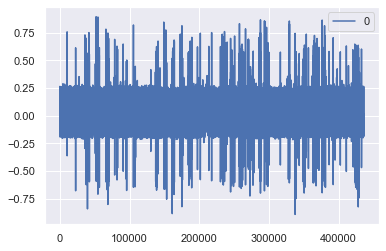

In [70]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

## Test

On cherche à predire les valeurs de test afin de les comparer avec le valeurs réelles.

In [109]:
test=datatest['Rtot']
output = model_fit.predict(start=data.shape[0],end=(data.shape[0]+datatest.shape[0]-1), dynamic=False)

#output = model_fit.predict(datatest['Rtot'])
yhat=output
rmse = sqrt(mean_squared_error(test, yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.909


In [111]:
ytest=yhat.values.reshape(-1,1)
ytest= sc.inverse_transform(ytest)

In [105]:
Xtest=test.values.reshape(-1,1)
xtest= sc.inverse_transform(Xtest)

In [112]:
ytest

array([[ 43.31201415],
       [ 43.50048159],
       [ 44.16838278],
       ...,
       [122.95135085],
       [122.95135085],
       [122.95135085]])

In [98]:
#xtest=xtest1(14)
n=0
for i in range(172471):
    if np.abs(yhat[i][13]-dt[i][13])>100:
        n=n+1
        print(dt[i][13],'Surconsommation')
    else:
        print(dt[i][13],'normal')
print(n)

48.4 normal
44.5 normal
41.7 normal
50.9 normal
39.8 normal
49.5 normal
40.400000000000006 normal
47.3 normal
39.4 normal
48.7 normal
41.2 normal
45.6 normal
41.099999999999994 normal
47.400000000000006 normal
42.3 normal
46.099999999999994 normal
47.8 normal
39.5 normal
49.60000000000001 normal
44.9 normal
40.6 normal
50.99999999999999 normal
39.9 normal
48.1 normal
40.8 normal
45.5 normal
45.5 normal
42.4 normal
49.1 normal
41.3 normal
48.00000000000001 normal
45.8 normal
42.699999999999996 normal
51.20000000000001 normal
40.7 normal
47.599999999999994 normal
43.1 normal
42.5 normal
46.7 normal
39.70000000000001 normal
47.2 normal
39.9 normal
51.4 normal
41.400000000000006 normal
50.1 normal
38.800000000000004 normal
49.3 normal
40.2 normal
49.4 normal
40.8 normal
48.00000000000001 normal
40.2 normal
47.6 normal
39.1 normal
48.1 normal
43.5 normal
42.2 normal
49.5 normal
40.900000000000006 normal
44.9 normal
47.3 normal
38.900000000000006 normal
49.1 normal
45.00000000000001 normal
3

565.7 normal
561.3 normal
549.3 normal
542.5999999999999 normal
194.6 normal
209.10000000000002 normal
204.4 normal
207.6 normal
206.2 normal
197.70000000000002 normal
211.9 normal
198.89999999999998 normal
210.7 normal
208.0 normal
195.8 normal
224.4 normal
191.70000000000002 normal
200.9 normal
197.3 normal
197.6 normal
199.4 normal
199.8 normal
203.2 normal
193.2 normal
203.8 normal
191.79999999999998 normal
192.20000000000002 normal
193.4 normal
192.20000000000002 normal
193.6 normal
190.10000000000002 normal
199.29999999999998 normal
188.2 normal
197.2 normal
198.40000000000003 normal
196.4 normal
198.39999999999998 normal
199.70000000000002 normal
518.0 normal
577.2 normal
567.4 normal
555.7 normal
551.9 normal
540.9 normal
542.5999999999999 normal
538.6 normal
537.1 normal
546.8 normal
536.3 normal
547.9 normal
539.0 normal
554.0 normal
545.3 normal
547.5 normal
546.8 normal
546.8 normal
539.2 normal
544.3 normal
548.1 normal
542.0 normal
538.9 normal
547.9 normal
541.5 normal
5

402.2 normal
425.0 normal
421.7 normal
430.79999999999995 normal
428.7 normal
429.50000000000006 normal
437.2 normal
438.90000000000003 normal
430.00000000000006 normal
430.90000000000003 normal
435.3 normal
435.6 normal
431.49999999999994 normal
432.2 normal
437.7 normal
432.0 normal
415.5 normal
410.4 normal
398.5 normal
395.9 normal
383.2 normal
386.5 normal
373.1 normal
376.3 normal
398.8 normal
420.1 normal
422.40000000000003 normal
437.5 normal
433.79999999999995 normal
445.0 normal
441.70000000000005 normal
438.3 normal
444.1 normal
443.9 normal
441.19999999999993 normal
439.90000000000003 normal
440.0 normal
440.8 normal
446.3 normal
434.90000000000003 normal
421.20000000000005 normal
409.4 normal
401.0 normal
385.7 normal
392.6 normal
381.3 normal
377.0 normal
398.8 normal
405.1 normal
418.79999999999995 normal
430.50000000000006 normal
433.0 normal
447.8 normal
438.7 normal
442.4 normal
432.70000000000005 normal
437.2000000000001 normal
444.79999999999995 normal
442.4 normal


1734.0 normal
1728.7000000000003 normal
1727.7000000000003 normal
1728.3 normal
1726.4 normal
77.1 normal
68.7 normal
74.6 normal
72.99999999999999 normal
66.7 normal
74.3 normal
77.2 normal
65.2 normal
76.5 normal
70.0 normal
74.8 normal
78.7 normal
74.0 normal
73.89999999999999 normal
81.0 normal
73.89999999999999 normal
78.50000000000001 normal
80.0 normal
73.80000000000001 normal
75.6 normal
84.69999999999999 normal
70.9 normal
79.6 normal
74.5 normal
77.60000000000001 normal
74.1 normal
71.5 normal
77.0 normal
72.6 normal
84.80000000000001 normal
75.1 normal
78.69999999999999 normal
75.9 normal
69.1 normal
70.2 normal
64.7 normal
58.9 normal
69.1 normal
67.30000000000001 normal
61.8 normal
76.7 normal
74.6 normal
64.1 normal
69.9 normal
97.19999999999999 normal
83.5 normal
89.3 normal
81.9 normal
79.2 normal
79.5 normal
86.9 normal
72.4 normal
84.19999999999999 normal
76.0 normal
78.0 normal
83.69999999999999 normal
75.2 normal
89.3 normal
84.49999999999999 normal
69.4 normal
85.1

279.0 normal
282.70000000000005 normal
283.5 normal
277.3 normal
280.7 normal
280.4 normal
278.4 normal
281.9 normal
284.70000000000005 normal
284.90000000000003 normal
281.5 normal
284.5 normal
283.6 normal
283.3 normal
280.1 normal
283.70000000000005 normal
283.0 normal
283.9 normal
282.8 normal
280.0 normal
283.09999999999997 normal
282.7 normal
285.40000000000003 normal
284.8 normal
285.40000000000003 normal
285.0 normal
246.3 normal
245.7 normal
245.10000000000002 normal
242.6 normal
244.70000000000002 normal
242.99999999999997 normal
242.9 normal
243.70000000000002 normal
249.3 normal
250.60000000000002 normal
254.2 normal
251.0 normal
250.2 normal
249.70000000000002 normal
249.5 normal
250.7 normal
249.79999999999998 normal
251.5 normal
247.5 normal
249.1 normal
252.7 normal
248.6 normal
249.20000000000002 normal
247.7 normal
247.9 normal
248.69999999999996 normal
252.2 normal
258.70000000000005 normal
248.69999999999996 normal
249.40000000000003 normal
249.49999999999997 normal

146.1 normal
147.2 normal
146.79999999999998 normal
142.7 normal
145.4 normal
147.0 normal
144.4 normal
144.7 normal
145.99999999999997 normal
143.6 normal
145.20000000000002 normal
144.2 normal
145.2 normal
144.9 normal
142.8 normal
145.3 normal
145.00000000000003 normal
144.7 normal
144.5 normal
144.0 normal
143.9 normal
144.8 normal
144.9 normal
144.4 normal
144.1 normal
143.89999999999998 normal
143.0 normal
143.9 normal
142.9 normal
144.70000000000002 normal
142.0 normal
143.8 normal
145.9 normal
144.4 normal
144.7 normal
144.2 normal
144.7 normal
144.2 normal
144.3 normal
147.20000000000002 normal
145.99999999999997 normal
143.9 normal
143.7 normal
144.70000000000002 normal
145.49999999999997 normal
146.1 normal
144.8 normal
146.2 normal
145.6 normal
145.6 normal
144.5 normal
144.0 normal
145.6 normal
145.8 normal
144.5 normal
144.8 normal
144.0 normal
142.7 normal
146.2 normal
144.9 normal
145.2 normal
143.70000000000002 normal
145.4 normal
145.7 normal
145.8 normal
145.4 normal

39.5 normal
47.4 normal
43.2 normal
39.70000000000001 normal
47.6 normal
41.2 normal
44.3 normal
49.099999999999994 normal
40.9 normal
47.3 normal
43.1 normal
45.1 normal
42.1 normal
46.699999999999996 normal
43.0 normal
48.4 normal
42.0 normal
46.099999999999994 normal
43.5 normal
40.9 normal
48.3 normal
42.699999999999996 normal
48.00000000000001 normal
41.79999999999999 normal
42.8 normal
43.8 normal
40.7 normal
49.099999999999994 normal
38.599999999999994 normal
47.3 normal
40.6 normal
44.79999999999999 normal
42.3 normal
46.3 normal
41.599999999999994 normal
46.5 normal
40.400000000000006 normal
46.3 normal
41.6 normal
46.6 normal
44.1 normal
43.9 normal
47.400000000000006 normal
40.3 normal
48.5 normal
39.400000000000006 normal
48.2 normal
41.5 normal
45.5 normal
45.2 normal
39.70000000000001 normal
47.5 normal
39.70000000000001 normal
47.199999999999996 normal
44.599999999999994 normal
43.2 normal
46.5 normal
39.4 normal
50.4 normal
39.8 normal
49.7 normal
38.900000000000006 nor

47.7 normal
43.5 normal
43.8 normal
46.6 normal
41.5 normal
47.1 normal
43.6 normal
45.1 normal
47.5 normal
39.1 normal
43.8 normal
48.7 normal
39.3 normal
46.9 normal
49.7 normal
42.2 normal
40.3 normal
42.6 normal
46.6 normal
48.400000000000006 normal
43.400000000000006 normal
38.9 normal
45.2 normal
51.1 normal
41.0 normal
44.1 normal
48.5 normal
39.8 normal
46.39999999999999 normal
47.7 normal
38.5 normal
48.599999999999994 normal
45.699999999999996 normal
41.0 normal
47.8 normal
39.4 normal
44.79999999999999 normal
44.79999999999999 normal
41.900000000000006 normal
47.599999999999994 normal
39.599999999999994 normal
48.9 normal
39.4 normal
46.9 normal
44.1 normal
43.3 normal
46.8 normal
40.6 normal
49.900000000000006 normal
39.2 normal
44.6 normal
48.00000000000001 normal
40.400000000000006 normal
45.699999999999996 normal
47.699999999999996 normal
39.1 normal
46.3 normal
45.400000000000006 normal
39.5 normal
48.400000000000006 normal
42.1 normal
51.5 normal
40.8 normal
48.8000000

164.9 normal
154.10000000000002 normal
163.5 normal
153.7 normal
165.1 normal
155.1 normal
162.09999999999997 normal
154.79999999999998 normal
161.70000000000002 normal
160.4 normal
156.79999999999998 normal
159.20000000000002 normal
159.20000000000002 normal
156.0 normal
163.2 normal
154.5 normal
161.4 normal
157.3 normal
158.5 normal
164.5 normal
155.6 normal
164.5 normal
159.1 normal
155.6 normal
163.1 normal
43.2 normal
45.1 normal
47.800000000000004 normal
40.1 normal
46.8 normal
42.8 normal
42.0 normal
47.0 normal
40.1 normal
48.5 normal
38.800000000000004 normal
47.9 normal
43.300000000000004 normal
38.099999999999994 normal
47.400000000000006 normal
48.00000000000001 normal
39.0 normal
44.5 normal
47.5 normal
40.5 normal
43.7 normal
48.7 normal
40.0 normal
49.099999999999994 normal
41.5 normal
45.9 normal
44.5 normal
44.4 normal
45.699999999999996 normal
42.699999999999996 normal
47.900000000000006 normal
46.1 normal
40.3 normal
41.79999999999999 normal
48.099999999999994 norma

572.4000000000001 normal
561.4 normal
547.4000000000001 normal
549.2 normal
545.0 normal
526.3 normal
523.9 normal
539.5 normal
520.0 normal
550.3 normal
547.6 normal
545.7 normal
566.8 normal
561.6999999999999 normal
558.7 normal
568.2 normal
571.7 normal
573.3 normal
563.8 normal
559.7 normal
566.3 normal
570.8 normal
564.3 normal
588.6 normal
574.7 normal
570.2 normal
590.0 normal
576.1 normal
2286.7 normal
2235.2000000000003 normal
2218.5 normal
2229.5 normal
2200.2 normal
2192.6 normal
2198.9 normal
2201.3 normal
2182.4 normal
2182.2000000000003 normal
2221.1 normal
2220.5 normal
2217.5 normal
2240.9 normal
2215.8 normal
2219.2 normal
2228.8999999999996 normal
2224.3 normal
2232.5 normal
2219.0 normal
2226.1000000000004 normal
2232.9 normal
2223.0 normal
2230.2 normal
2215.4 normal
2219.5 normal
2217.9 normal
2213.4 normal
2230.0 normal
2231.5 normal
2223.9 normal
2212.5 normal
2207.2 normal
2204.7 normal
2193.8 normal
2180.7999999999997 normal
2182.9 normal
2177.4 normal
2176.6 n

99.9 normal
107.1 normal
103.4 normal
100.4 normal
94.1 normal
121.0 normal
111.3 normal
103.0 normal
94.20000000000002 normal
99.60000000000001 normal
94.6 normal
97.7 normal
99.29999999999997 normal
93.8 normal
98.9 normal
92.19999999999999 normal
99.39999999999999 normal
95.6 normal
101.80000000000001 normal
109.4 normal
94.30000000000001 normal
91.30000000000001 normal
84.2 normal
97.6 normal
95.19999999999999 normal
108.70000000000002 normal
98.9 normal
102.3 normal
114.00000000000001 normal
91.1 normal
108.30000000000001 normal
115.0 normal
105.4 normal
97.1 normal
101.0 normal
97.8 normal
94.6 normal
94.10000000000002 normal
93.30000000000001 normal
102.3 normal
89.89999999999999 normal
89.7 normal
90.30000000000001 normal
84.4 normal
86.2 normal
102.6 normal
86.89999999999999 normal
102.1 normal
89.89999999999999 normal
101.9 normal
109.19999999999999 normal
93.5 normal
108.8 normal
96.89999999999999 normal
101.60000000000001 normal
107.6 normal
102.30000000000001 normal
104.19

2346.300000000001 normal
2358.7 normal
2350.1000000000004 normal
2349.1000000000004 normal
2347.4 normal
2351.999999999999 normal
2348.800000000001 normal
2344.800000000001 normal
2357.9 normal
2352.9 normal
2410.9 normal
2412.5000000000005 normal
2433.3 normal
2453.9000000000005 normal
2456.6 normal
2472.3999999999996 normal
2467.0000000000005 normal
2417.5000000000005 normal
2405.600000000001 normal
2396.3 normal
2381.0000000000005 normal
2393.3 normal
2384.4 normal
3745.7000000000003 normal
3740.0 normal
3732.000000000001 normal
3711.6000000000004 normal
2809.2 normal
3716.1000000000004 normal
3725.2000000000003 normal
3711.2999999999997 normal
3713.1000000000004 normal
3715.6000000000004 normal
3696.2999999999997 normal
3708.6000000000004 normal
3709.5 normal
3693.0 normal
3695.0 normal
2923.500000000001 normal
3688.6 normal
3708.400000000001 normal
3753.9 normal
3752.7000000000003 normal
3768.2999999999997 normal
2498.8 normal
3804.8000000000006 normal
3807.5000000000005 normal
38

281.0 normal
278.0 normal
270.5 normal
275.20000000000005 normal
275.8 normal
270.0 normal
280.40000000000003 normal
273.7 normal
287.8 normal
289.4 normal
292.6 normal
284.90000000000003 normal
283.6 normal
287.9 normal
279.79999999999995 normal
283.2 normal
291.2 normal
277.2 normal
279.90000000000003 normal
277.20000000000005 normal
283.2 normal
274.90000000000003 normal
284.0 normal
285.4 normal
285.7 normal
294.1000000000001 normal
286.40000000000003 normal
280.4 normal
271.4 normal
273.0 normal
277.3 normal
266.5 normal
276.3 normal
282.1 normal
275.1 normal
283.0 normal
270.8 normal
276.9 normal
272.1 normal
279.7 normal
273.1 normal
279.2 normal
277.9 normal
266.2 normal
277.8 normal
272.70000000000005 normal
284.6 normal
272.3 normal
288.5 normal
275.4 normal
283.2 normal
270.7 normal
289.6 normal
275.4 normal
287.2 normal
279.8 normal
286.49999999999994 normal
287.40000000000003 normal
278.0 normal
282.6 normal
280.09999999999997 normal
275.8 normal
277.8 normal
277.8 normal


138.7 normal
139.1 normal
140.1 normal
139.4 normal
140.7 normal
141.0 normal
140.0 normal
139.1 normal
142.1 normal
141.7 normal
141.2 normal
140.5 normal
141.2 normal
142.8 normal
138.6 normal
140.6 normal
140.9 normal
143.4 normal
142.2 normal
139.7 normal
141.7 normal
141.2 normal
142.39999999999998 normal
141.6 normal
141.3 normal
140.7 normal
141.79999999999998 normal
139.9 normal
141.79999999999998 normal
140.9 normal
142.4 normal
141.6 normal
139.6 normal
139.9 normal
141.2 normal
140.7 normal
141.4 normal
142.7 normal
140.3 normal
143.0 normal
143.3 normal
139.2 normal
139.89999999999998 normal
140.4 normal
142.9 normal
142.29999999999998 normal
141.6 normal
142.4 normal
140.5 normal
140.7 normal
140.6 normal
140.5 normal
140.5 normal
141.0 normal
139.9 normal
140.1 normal
139.9 normal
141.70000000000002 normal
139.4 normal
140.1 normal
136.8 normal
141.1 normal
140.9 normal
140.6 normal
140.1 normal
140.4 normal
140.9 normal
141.1 normal
140.3 normal
140.4 normal
139.70000000

155.10000000000002 normal
162.9 normal
154.1 normal
160.8 normal
152.0 normal
161.9 normal
152.70000000000002 normal
161.5 normal
157.4 normal
160.8 normal
155.8 normal
159.9 normal
157.9 normal
162.2 normal
156.70000000000002 normal
163.0 normal
154.8 normal
163.0 normal
155.5 normal
155.6 normal
164.39999999999998 normal
153.70000000000005 normal
159.5 normal
161.9 normal
157.29999999999998 normal
161.9 normal
156.1 normal
154.5 normal
161.7 normal
154.3 normal
159.6 normal
157.29999999999998 normal
151.89999999999998 normal
159.2 normal
161.5 normal
155.6 normal
154.60000000000002 normal
160.6 normal
157.49999999999997 normal
154.2 normal
161.60000000000002 normal
153.29999999999998 normal
161.5 normal
157.8 normal
156.1 normal
161.60000000000002 normal
155.0 normal
160.70000000000002 normal
155.8 normal
156.39999999999998 normal
162.4 normal
155.00000000000003 normal
163.0 normal
154.0 normal
162.4 normal
156.79999999999998 normal
159.70000000000002 normal
157.9 normal
156.7 normal

38.2 normal
39.70000000000001 normal
41.4 normal
47.8 normal
46.5 normal
45.2 normal
39.9 normal
37.7 normal
45.599999999999994 normal
39.0 normal
43.5 normal
39.900000000000006 normal
44.9 normal
45.4 normal
37.8 normal
49.2 normal
40.6 normal
46.5 normal
42.2 normal
41.2 normal
47.400000000000006 normal
46.7 normal
44.3 normal
39.0 normal
39.8 normal
41.800000000000004 normal
48.9 normal
46.0 normal
38.400000000000006 normal
46.5 normal
36.8 normal
46.0 normal
39.9 normal
44.6 normal
42.4 normal
41.900000000000006 normal
46.5 normal
39.900000000000006 normal
48.4 normal
43.2 normal
39.1 normal
41.4 normal
47.3 normal
41.79999999999999 normal
40.3 normal
48.00000000000001 normal
44.1 normal
38.3 normal
46.7 normal
42.599999999999994 normal
40.2 normal
37.7 normal
42.0 normal
46.1 normal
38.800000000000004 normal
45.5 normal
38.7 normal
49.7 normal
41.79999999999999 normal
42.0 normal
44.4 normal
39.9 normal
47.199999999999996 normal
37.9 normal
46.9 normal
37.099999999999994 normal
47

45.6 normal
44.5 normal
40.7 normal
46.8 normal
38.3 normal
47.8 normal
36.4 normal
49.900000000000006 normal
37.6 normal
47.800000000000004 normal
37.0 normal
47.5 normal
37.8 normal
47.4 normal
38.9 normal
46.9 normal
41.2 normal
42.599999999999994 normal
43.9 normal
41.3 normal
43.2 normal
43.599999999999994 normal
38.5 normal
46.7 normal
37.900000000000006 normal
47.7 normal
41.4 normal
40.5 normal
48.6 normal
40.7 normal
42.8 normal
46.5 normal
38.0 normal
46.900000000000006 normal
39.3 normal
42.9 normal
46.3 normal
37.599999999999994 normal
47.2 normal
38.7 normal
47.5 normal
38.7 normal
46.5 normal
43.2 normal
39.400000000000006 normal
47.1 normal
38.099999999999994 normal
46.3 normal
44.5 normal
39.3 normal
46.400000000000006 normal
37.6 normal
47.1 normal
42.0 normal
39.6 normal
49.2 normal
38.0 normal
47.4 normal
40.2 normal
42.8 normal
44.7 normal
39.5 normal
45.4 normal
39.5 normal
48.00000000000001 normal
42.6 normal
41.2 normal
46.7 normal
43.7 normal
40.6 normal
45.3 no

1688.7 normal
1691.3999999999999 normal
1693.8 normal
1687.6999999999998 normal
1693.0 normal
1695.0 normal
1685.0 normal
1695.0 normal
1693.3999999999999 normal
1829.3 normal
1847.7 normal
1850.3000000000002 normal
1849.3999999999999 normal
1845.5 normal
1828.6 normal
1830.0 normal
1812.6999999999998 normal
1818.4999999999998 normal
1804.3999999999999 normal
1805.8999999999999 normal
1800.6999999999998 normal
1801.6999999999998 normal
1791.1 normal
1793.8 normal
1797.8999999999999 normal
1783.3999999999999 normal
1793.8000000000002 normal
1790.4 normal
1785.2 normal
1794.0000000000002 normal
1788.6000000000004 normal
1783.2 normal
1788.8000000000002 normal
1783.1 normal
1789.3 normal
1788.6 normal
1783.1000000000001 normal
1790.8 normal
1786.4999999999998 normal
1791.6 normal
1791.5 normal
1787.2 normal
1795.8 normal
1792.4 normal
1784.7 normal
1793.0 normal
1790.8999999999999 normal
1783.8 normal
1793.3 normal
1791.0 normal
1787.5000000000002 normal
1796.4 normal
177.20000000000005 n

445.70000000000005 normal
433.40000000000003 normal
421.0 normal
430.99999999999994 normal
429.59999999999997 normal
436.7 normal
425.4 normal
433.90000000000003 normal
422.1 normal
431.6 normal
426.7 normal
433.0 normal
422.2 normal
429.7 normal
426.1 normal
424.0 normal
435.90000000000003 normal
427.7 normal
86.5 normal
75.2 normal
82.0 normal
83.4 normal
81.2 normal
87.1 normal
73.10000000000001 normal
83.2 normal
78.4 normal
83.5 normal
78.0 normal
83.7 normal
76.1 normal
89.49999999999999 normal
76.5 normal
81.30000000000001 normal
75.4 normal
82.69999999999997 normal
98.30000000000001 normal
77.19999999999999 normal
101.8 normal
93.69999999999999 normal
114.5 normal
85.99999999999999 normal
93.1 normal
86.10000000000001 normal
97.10000000000001 normal
85.8 normal
99.6 normal
85.9 normal
93.4 normal
94.6 normal
88.3 normal
92.89999999999999 normal
91.10000000000001 normal
87.4 normal
94.8 normal
93.2 normal
89.0 normal
418.6 normal
374.0 normal
638.5 normal
729.6999999999999 norma

85.69999999999999 normal
82.30000000000001 normal
103.19999999999999 normal
89.5 normal
90.00000000000001 normal
82.00000000000001 normal
86.10000000000001 normal
75.2 normal
93.5 normal
78.50000000000001 normal
97.9 normal
83.1 normal
84.6 normal
81.70000000000002 normal
90.90000000000002 normal
453.00000000000006 normal
487.9 normal
508.90000000000003 normal
502.6 normal
513.0 normal
515.7 normal
508.8 normal
518.7 normal
519.8 normal
528.6 normal
535.5 normal
521.9 normal
519.1 normal
522.2 normal
519.0999999999999 normal
522.1 normal
543.4 normal
520.4 normal
523.6 normal
530.2 normal
541.4 normal
523.1 normal
535.2 normal
542.6 normal
531.4000000000001 normal
525.5 normal
88.50000000000001 normal
78.9 normal
87.6 normal
89.59999999999998 normal
83.3 normal
77.5 normal
85.9 normal
87.4 normal
79.0 normal
85.69999999999999 normal
97.5 normal
79.5 normal
80.69999999999999 normal
91.5 normal
91.1 normal
90.1 normal
78.1 normal
89.2 normal
89.2 normal
85.9 normal
77.7 normal
85.7 norma

374.70000000000005 normal
393.20000000000005 normal
373.09999999999997 normal
366.6 normal
373.50000000000006 normal
372.3 normal
367.40000000000003 normal
373.6 normal
371.50000000000006 normal
369.8 normal
374.5 normal
369.1 normal
364.09999999999997 normal
374.1 normal
377.59999999999997 normal
370.1 normal
369.4 normal
377.7 normal
373.2 normal
401.4 normal
370.6 normal
380.40000000000003 normal
388.29999999999995 normal
370.70000000000005 normal
378.8 normal
382.7 normal
378.3 normal
380.49999999999994 normal
374.9 normal
376.9 normal
371.0 normal
369.5 normal
389.40000000000003 normal
373.0 normal
372.6 normal
357.1 normal
371.0 normal
371.9 normal
374.0 normal
377.2 normal
369.8 normal
366.7 normal
360.90000000000003 normal
371.9 normal
372.8 normal
376.1 normal
376.5 normal
385.3 normal
381.0 normal
374.1 normal
372.6 normal
381.1 normal
364.0 normal
357.0 normal
360.2 normal
356.40000000000003 normal
358.0 normal
362.1 normal
357.2 normal
352.5 normal
349.0 normal
365.2 normal

165.90000000000003 normal
167.5 normal
165.90000000000003 normal
166.0 normal
164.39999999999998 normal
165.5 normal
165.39999999999995 normal
167.19999999999996 normal
163.60000000000002 normal
166.1 normal
165.1 normal
164.5 normal
165.10000000000002 normal
164.3 normal
165.60000000000002 normal
165.0 normal
164.79999999999998 normal
163.3 normal
165.3 normal
165.6 normal
163.79999999999998 normal
166.3 normal
164.0 normal
161.70000000000002 normal
170.5 normal
166.5 normal
163.0 normal
162.4 normal
162.20000000000002 normal
162.5 normal
164.29999999999998 normal
161.1 normal
164.3 normal
162.39999999999998 normal
163.6 normal
164.3 normal
165.1 normal
163.5 normal
164.2 normal
162.7 normal
164.2 normal
163.6 normal
163.5 normal
160.8 normal
161.7 normal
163.3 normal
163.5 normal
153.6 normal
163.40000000000003 normal
163.7 normal
162.8 normal
167.8 normal
157.8 normal
160.20000000000002 normal
162.09999999999997 normal
161.1 normal
155.0 normal
160.5 normal
160.2 normal
164.9 normal

138.8 normal
137.5 normal
137.4 normal
139.2 normal
137.4 normal
137.2 normal
138.3 normal
137.9 normal
138.29999999999998 normal
138.9 normal
138.70000000000002 normal
136.7 normal
138.1 normal
137.5 normal
136.5 normal
137.2 normal
137.1 normal
138.1 normal
137.3 normal
138.7 normal
138.29999999999998 normal
137.79999999999998 normal
136.9 normal
137.0 normal
137.9 normal
138.29999999999998 normal
137.7 normal
136.8 normal
138.10000000000002 normal
139.0 normal
285.99999999999994 normal
295.8 normal
294.8 normal
296.0 normal
291.49999999999994 normal
279.0 normal
272.20000000000005 normal
264.9 normal
260.2 normal
258.7 normal
254.79999999999998 normal
252.9 normal
253.6 normal
250.2 normal
247.9 normal
247.10000000000002 normal
247.3 normal
245.5 normal
247.2 normal
246.10000000000002 normal
247.40000000000003 normal
245.29999999999998 normal
246.60000000000002 normal
247.09999999999997 normal
244.60000000000002 normal
247.6 normal
247.89999999999998 normal
247.5 normal
249.0 normal

49.1 normal
42.5 normal
52.2 normal
42.8 normal
53.0 normal
43.0 normal
51.20000000000001 normal
39.400000000000006 normal
53.5 normal
44.7 normal
52.599999999999994 normal
41.79999999999999 normal
50.6 normal
41.79999999999999 normal
52.599999999999994 normal
42.2 normal
48.7 normal
46.6 normal
46.2 normal
45.5 normal
46.400000000000006 normal
46.8 normal
46.099999999999994 normal
45.699999999999996 normal
44.3 normal
51.3 normal
42.3 normal
50.900000000000006 normal
42.9 normal
50.599999999999994 normal
50.5 normal
42.1 normal
45.00000000000001 normal
51.4 normal
45.90000000000001 normal
42.9 normal
47.2 normal
49.5 normal
50.8 normal
49.8 normal
48.2 normal
41.900000000000006 normal
44.1 normal
50.300000000000004 normal
47.5 normal
42.9 normal
50.599999999999994 normal
43.7 normal
47.0 normal
47.5 normal
45.5 normal
47.3 normal
45.2 normal
50.8 normal
43.7 normal
46.5 normal
50.1 normal
42.6 normal
52.7 normal
41.400000000000006 normal
47.7 normal
46.8 normal
40.2 normal
48.40000000

47.900000000000006 normal
41.099999999999994 normal
47.400000000000006 normal
51.3 normal
44.1 normal
46.5 normal
50.5 normal
40.2 normal
44.1 normal
51.099999999999994 normal
44.1 normal
40.9 normal
40.900000000000006 normal
43.6 normal
46.6 normal
49.599999999999994 normal
50.0 normal
49.099999999999994 normal
47.1 normal
41.79999999999999 normal
40.2 normal
41.6 normal
43.2 normal
47.0 normal
50.300000000000004 normal
49.400000000000006 normal
52.4 normal
49.7 normal
48.2 normal
45.8 normal
45.2 normal
41.79999999999999 normal
41.7 normal
42.8 normal
41.79999999999999 normal
44.79999999999999 normal
45.9 normal
48.9 normal
48.7 normal
49.1 normal
50.99999999999999 normal
51.8 normal
49.1 normal
49.60000000000001 normal
41.6 normal
44.5 normal
50.2 normal
49.9 normal
44.7 normal
42.2 normal
46.2 normal
50.6 normal
49.2 normal
43.400000000000006 normal
41.79999999999999 normal
49.2 normal
49.599999999999994 normal
44.79999999999999 normal
41.099999999999994 normal
45.199999999999996 n

41.7 normal
51.8 normal
40.2 normal
50.400000000000006 normal
40.8 normal
49.9 normal
43.400000000000006 normal
48.400000000000006 normal
44.6 normal
46.5 normal
46.0 normal
44.599999999999994 normal
47.1 normal
49.9 normal
43.3 normal
46.9 normal
49.900000000000006 normal
43.400000000000006 normal
47.2 normal
51.099999999999994 normal
41.3 normal
44.900000000000006 normal
50.9 normal
40.699999999999996 normal
47.7 normal
48.6 normal
44.599999999999994 normal
49.4 normal
41.79999999999999 normal
51.1 normal
43.900000000000006 normal
46.3 normal
44.800000000000004 normal
44.2 normal
48.5 normal
41.400000000000006 normal
48.599999999999994 normal
43.0 normal
49.7 normal
44.4 normal
44.3 normal
48.1 normal
42.5 normal
51.8 normal
42.2 normal
50.300000000000004 normal
40.7 normal
51.5 normal
42.2 normal
50.599999999999994 normal
42.599999999999994 normal
49.1 normal
41.6 normal
50.300000000000004 normal
42.3 normal
48.7 normal
41.7 normal
50.6 normal
43.2 normal
39.5 normal
42.0 normal
39.

97.89999999999998 normal
88.3 normal
99.4 normal
92.9 normal
106.70000000000002 normal
105.8 normal
103.89999999999999 normal
113.19999999999999 normal
99.6 normal
103.5 normal
108.6 normal
94.1 normal
103.49999999999999 normal
98.19999999999999 normal
104.0 normal
105.5 normal
107.4 normal
107.8 normal
113.89999999999999 normal
98.50000000000001 normal
95.4 normal
101.0 normal
96.2 normal
96.3 normal
91.39999999999999 normal
92.2 normal
100.10000000000002 normal
86.6 normal
93.3 normal
96.4 normal
93.60000000000001 normal
100.3 normal
92.4 normal
98.99999999999999 normal
95.6 normal
97.10000000000001 normal
105.70000000000002 normal
96.39999999999999 normal
101.50000000000001 normal
105.0 normal
96.4 normal
110.69999999999999 normal
103.3 normal
91.7 normal
102.40000000000002 normal
96.50000000000001 normal
107.1 normal
92.3 normal
95.60000000000001 normal
88.00000000000001 normal
94.80000000000001 normal
91.6 normal
99.30000000000001 normal
87.70000000000002 normal
100.3 normal
100.2

579.2 normal
570.4000000000001 normal
575.8 normal
561.7 normal
561.5 normal
561.9 normal
558.4 normal
563.5 normal
569.2 normal
572.0 normal
567.5999999999999 normal
568.9 normal
567.4000000000001 normal
570.1 normal
560.9 normal
569.6 normal
588.8 normal
574.4 normal
573.6 normal
570.4 normal
559.5 normal
561.2 normal
577.7 normal
581.1 normal
584.2 normal
576.6 normal
586.3000000000001 normal
581.5000000000001 normal
573.6 normal
583.0999999999999 normal
576.9 normal
576.8 normal
578.9 normal
576.8 normal
574.6 normal
583.4999999999999 normal
585.3 normal
593.7 normal
585.0 normal
587.8 normal
588.9 normal
567.8 normal
560.8000000000001 normal
549.1 normal
542.5 normal
530.9000000000001 normal
215.49999999999997 normal
210.29999999999998 normal
218.10000000000002 normal
216.80000000000004 normal
208.0 normal
223.9 normal
216.60000000000002 normal
220.3 normal
213.69999999999996 normal
219.39999999999998 normal
220.5 normal
235.4 normal
234.4 normal
229.50000000000003 normal
227.9000

200.4 normal
212.4 normal
201.8 normal
208.7 normal
202.10000000000002 normal
210.5 normal
200.10000000000002 normal
221.40000000000003 normal
201.5 normal
217.4 normal
210.70000000000002 normal
222.7 normal
202.10000000000002 normal
213.20000000000002 normal
199.0 normal
216.2 normal
206.8 normal
197.79999999999998 normal
199.7 normal
216.7 normal
202.4 normal
207.0 normal
204.6 normal
202.19999999999996 normal
203.2 normal
204.80000000000004 normal
212.3 normal
233.5 normal
203.7 normal
213.8 normal
216.0 normal
201.20000000000002 normal
212.7 normal
209.6 normal
200.4 normal
216.40000000000003 normal
205.20000000000002 normal
218.60000000000005 normal
221.7 normal
202.4 normal
219.29999999999998 normal
210.0 normal
220.0 normal
212.7 normal
214.2 normal
200.29999999999998 normal
207.79999999999998 normal
199.50000000000003 normal
206.7 normal
207.29999999999995 normal
216.5 normal
216.5 normal
221.3 normal
213.6 normal
200.50000000000003 normal
195.20000000000002 normal
191.89999999

166.9 normal
163.6 normal
157.6 normal
160.1 normal
161.39999999999998 normal
158.2 normal
168.9 normal
159.7 normal
158.5 normal
162.9 normal
160.5 normal
163.8 normal
161.89999999999998 normal
158.99999999999994 normal
163.7 normal
159.70000000000002 normal
162.20000000000002 normal
161.09999999999997 normal
158.9 normal
160.1 normal
159.8 normal
1853.8000000000002 normal
1843.2 normal
1839.4 normal
1833.3999999999999 normal
1837.4 normal
1829.8999999999999 normal
1828.0 normal
1828.8 normal
1829.2 normal
1824.0 normal
1827.8000000000002 normal
1829.3 normal
1825.4000000000003 normal
1837.3 normal
1847.1999999999998 normal
1836.3000000000002 normal
1844.9 normal
1830.7 normal
1827.6 normal
1824.1 normal
1828.6 normal
1829.5 normal
1831.3999999999999 normal
1831.8 normal
1831.5 normal
1836.6 normal
1827.3 normal
1834.6 normal
1837.5 normal
1836.6000000000001 normal
1839.9999999999998 normal
1837.1000000000001 normal
1838.3 normal
1837.1 normal
1832.5 normal
1831.5 normal
1830.39999999

132.5 normal
133.6 normal
131.4 normal
132.5 normal
132.8 normal
135.3 normal
133.60000000000002 normal
134.3 normal
132.7 normal
134.1 normal
131.6 normal
132.6 normal
132.7 normal
133.1 normal
133.0 normal
133.7 normal
133.1 normal
133.3 normal
132.39999999999998 normal
131.8 normal
134.5 normal
134.2 normal
134.79999999999998 normal
133.7 normal
132.1 normal
131.9 normal
133.9 normal
133.6 normal
133.20000000000002 normal
131.79999999999998 normal
133.5 normal
131.7 normal
131.29999999999998 normal
132.6 normal
133.2 normal
134.8 normal
131.9 normal
132.10000000000002 normal
132.7 normal
133.1 normal
135.20000000000002 normal
133.1 normal
132.3 normal
133.9 normal
133.6 normal
135.0 normal
133.5 normal
134.29999999999998 normal
132.3 normal
132.3 normal
133.6 normal
133.3 normal
133.1 normal
134.5 normal
133.7 normal
134.39999999999998 normal
135.5 normal
133.8 normal
134.5 normal
132.7 normal
134.2 normal
134.4 normal
132.7 normal
132.5 normal
133.3 normal
134.4 normal
132.6 normal

164.1 normal
164.2 normal
156.0 normal
161.49999999999997 normal
165.8 normal
168.1 normal
161.20000000000002 normal
156.4 normal
160.5 normal
167.4 normal
158.79999999999998 normal
161.2 normal
163.20000000000002 normal
156.39999999999998 normal
165.5 normal
157.6 normal
165.39999999999995 normal
158.80000000000004 normal
160.0 normal
165.20000000000005 normal
158.0 normal
162.9 normal
164.5 normal
156.2 normal
166.4 normal
157.2 normal
167.9 normal
157.10000000000002 normal
164.10000000000002 normal
154.79999999999998 normal
168.4 normal
156.79999999999998 normal
165.20000000000005 normal
161.29999999999998 normal
157.2 normal
166.9 normal
158.50000000000003 normal
162.59999999999997 normal
159.8 normal
158.30000000000004 normal
166.5 normal
159.8 normal
164.39999999999998 normal
162.10000000000002 normal
157.20000000000002 normal
166.9 normal
156.1 normal
163.20000000000002 normal
165.2 normal
156.7 normal
167.4 normal
157.8 normal
163.6 normal
161.29999999999998 normal
158.0 normal

39.9 normal
43.8 normal
48.6 normal
45.8 normal
41.3 normal
40.1 normal
39.2 normal
44.5 normal
49.400000000000006 normal
46.1 normal
40.599999999999994 normal
40.7 normal
49.7 normal
42.099999999999994 normal
39.4 normal
45.00000000000001 normal
49.400000000000006 normal
38.5 normal
45.2 normal
43.3 normal
42.1 normal
45.9 normal
43.400000000000006 normal
45.8 normal
42.6 normal
44.79999999999999 normal
43.0 normal
45.5 normal
38.0 normal
48.2 normal
40.0 normal
50.400000000000006 normal
38.6 normal
48.9 normal
41.099999999999994 normal
48.7 normal
39.3 normal
49.4 normal
40.400000000000006 normal
47.0 normal
47.5 normal
38.2 normal
45.1 normal
49.1 normal
43.3 normal
40.5 normal
46.5 normal
42.1 normal
40.7 normal
47.0 normal
41.79999999999999 normal
45.90000000000001 normal
46.7 normal
39.70000000000001 normal
48.8 normal
38.3 normal
47.900000000000006 normal
41.6 normal
42.8 normal
43.0 normal
37.8 normal
48.1 normal
41.6 normal
43.5 normal
42.0 normal
46.599999999999994 normal
40.

79.0 normal
66.2 normal
76.10000000000001 normal
67.0 normal
71.60000000000001 normal
65.7 normal
75.89999999999999 normal
74.4 normal
77.5 normal
78.39999999999999 normal
76.30000000000001 normal
76.7 normal
79.0 normal
74.9 normal
79.8 normal
73.5 normal
79.69999999999999 normal
74.2 normal
74.1 normal
83.7 normal
72.2 normal
75.29999999999998 normal
81.1 normal
72.6 normal
73.1 normal
80.1 normal
71.8 normal
71.3 normal
81.2 normal
77.1 normal
73.2 normal
80.0 normal
70.8 normal
77.3 normal
75.9 normal
72.8 normal
83.8 normal
68.6 normal
82.8 normal
73.8 normal
79.80000000000001 normal
71.3 normal
80.5 normal
72.99999999999999 normal
83.5 normal
66.69999999999999 normal
76.0 normal
72.10000000000001 normal
79.1 normal
75.29999999999998 normal
69.1 normal
77.19999999999999 normal
76.0 normal
70.3 normal
77.9 normal
70.7 normal
76.9 normal
79.40000000000002 normal
69.7 normal
70.3 normal
76.89999999999999 normal
78.50000000000001 normal
76.9 normal
70.3 normal
78.9 normal
78.800000000

150.4 normal
153.1 normal
150.3 normal
141.7 normal
135.29999999999998 normal
132.9 normal
151.1 normal
146.10000000000002 normal
128.5 normal
149.2 normal
141.29999999999998 normal
137.79999999999998 normal
153.4 normal
134.4 normal
132.0 normal
129.1 normal
132.2 normal
129.8 normal
124.19999999999999 normal
128.6 normal
119.90000000000002 normal
132.9 normal
135.2 normal
119.89999999999999 normal
132.0 normal
123.9 normal
134.4 normal
133.70000000000002 normal
139.6 normal
146.1 normal
126.29999999999998 normal
124.60000000000001 normal
128.7 normal
116.8 normal
132.1 normal
137.7 normal
121.1 normal
122.8 normal
160.0 normal
121.5 normal
131.10000000000002 normal
131.0 normal
125.1 normal
128.79999999999998 normal
131.7 normal
132.5 normal
131.3 normal
135.7 normal
145.9 normal
146.1 normal
131.9 normal
121.5 normal
128.6 normal
142.4 normal
138.2 normal
141.7 normal
129.7 normal
126.9 normal
131.4 normal
143.0 normal
121.5 normal
121.3 normal
125.00000000000001 normal
113.70000000

79.5 normal
71.6 normal
79.7 normal
84.4 normal
74.2 normal
78.2 normal
80.0 normal
78.1 normal
72.4 normal
80.4 normal
81.9 normal
71.1 normal
90.00000000000001 normal
84.4 normal
71.5 normal
84.49999999999999 normal
79.9 normal
83.7 normal
73.19999999999999 normal
73.1 normal
75.30000000000001 normal
79.2 normal
71.9 normal
80.80000000000001 normal
71.9 normal
85.0 normal
74.5 normal
86.69999999999999 normal
90.69999999999999 normal
87.2 normal
86.69999999999999 normal
75.8 normal
75.5 normal
77.4 normal
78.6 normal
75.5 normal
91.39999999999999 normal
74.19999999999999 normal
78.6 normal
90.90000000000002 normal
80.69999999999999 normal
85.5 normal
80.4 normal
90.2 normal
75.69999999999999 normal
84.69999999999999 normal
74.19999999999999 normal
83.5 normal
73.1 normal
81.80000000000001 normal
71.5 normal
88.5 normal
79.6 normal
86.3 normal
227.2 normal
237.5 normal
233.39999999999998 normal
243.0 normal
231.2 normal
229.4 normal
216.40000000000003 normal
210.89999999999998 normal
1

40.0 normal
48.599999999999994 normal
38.0 normal
49.8 normal
41.400000000000006 normal
50.09999999999999 normal
38.2 normal
46.0 normal
46.3 normal
39.1 normal
48.8 normal
43.0 normal
39.1 normal
48.099999999999994 normal
42.5 normal
43.3 normal
45.00000000000001 normal
41.79999999999999 normal
48.3 normal
39.3 normal
47.599999999999994 normal
40.699999999999996 normal
46.8 normal
47.0 normal
40.400000000000006 normal
49.1 normal
38.6 normal
47.599999999999994 normal
40.0 normal
49.599999999999994 normal
43.900000000000006 normal
40.0 normal
48.7 normal
42.099999999999994 normal
42.1 normal
47.4 normal
39.8 normal
48.00000000000001 normal
49.0 normal
41.2 normal
41.0 normal
48.4 normal
40.5 normal
49.4 normal
39.6 normal
43.900000000000006 normal
48.2 normal
43.7 normal
39.6 normal
43.8 normal
49.7 normal
44.900000000000006 normal
38.0 normal
46.5 normal
46.900000000000006 normal
40.400000000000006 normal
46.900000000000006 normal
43.900000000000006 normal
41.6 normal
49.9 normal
40.5

135.8 normal
137.79999999999998 normal
136.9 normal
138.3 normal
137.9 normal
139.9 normal
137.0 normal
138.6 normal
137.39999999999998 normal
138.4 normal
138.6 normal
136.8 normal
138.7 normal
136.8 normal
137.6 normal
138.1 normal
136.9 normal
138.7 normal
138.1 normal
138.1 normal
135.5 normal
137.1 normal
136.6 normal
138.0 normal
137.5 normal
138.8 normal
137.9 normal
135.9 normal
138.0 normal
135.5 normal
137.8 normal
139.29999999999998 normal
138.4 normal
137.29999999999998 normal
138.0 normal
139.5 normal
138.5 normal
138.6 normal
136.70000000000002 normal
138.8 normal
138.2 normal
138.0 normal
139.3 normal
138.4 normal
138.3 normal
137.4 normal
137.9 normal
137.2 normal
137.8 normal
138.6 normal
136.7 normal
137.2 normal
137.7 normal
136.5 normal
137.4 normal
136.4 normal
138.2 normal
134.79999999999998 normal
138.70000000000002 normal
138.4 normal
136.5 normal
137.4 normal
134.8 normal
138.1 normal
137.9 normal
134.0 normal
136.1 normal
137.79999999999998 normal
136.4 normal

134.2 normal
137.9 normal
135.1 normal
136.9 normal
136.2 normal
136.0 normal
134.5 normal
136.8 normal
136.6 normal
135.4 normal
136.0 normal
135.2 normal
135.2 normal
136.5 normal
137.8 normal
138.20000000000002 normal
137.2 normal
137.4 normal
137.2 normal
138.1 normal
135.4 normal
136.8 normal
135.8 normal
137.70000000000002 normal
136.6 normal
135.60000000000002 normal
136.10000000000002 normal
135.7 normal
137.4 normal
137.8 normal
135.4 normal
136.6 normal
136.5 normal
136.3 normal
136.79999999999998 normal
135.5 normal
136.8 normal
136.39999999999998 normal
135.8 normal
137.29999999999998 normal
136.29999999999998 normal
135.70000000000002 normal
136.8 normal
137.2 normal
137.4 normal
136.5 normal
136.0 normal
137.5 normal
137.0 normal
134.3 normal
137.1 normal
137.3 normal
135.2 normal
134.5 normal
136.9 normal
138.2 normal
135.5 normal
134.9 normal
137.10000000000002 normal
136.6 normal
136.7 normal
136.4 normal
136.0 normal
137.9 normal
136.9 normal
137.5 normal
135.1 normal

38.7 normal
47.400000000000006 normal
42.0 normal
38.2 normal
44.1 normal
46.9 normal
39.6 normal
44.800000000000004 normal
42.699999999999996 normal
46.6 normal
40.599999999999994 normal
47.5 normal
43.6 normal
39.099999999999994 normal
48.8 normal
47.2 normal
39.4 normal
40.900000000000006 normal
46.6 normal
46.39999999999999 normal
43.400000000000006 normal
38.9 normal
41.6 normal
48.6 normal
43.400000000000006 normal
39.599999999999994 normal
46.5 normal
392.8 normal
39.6 normal
47.7 normal
41.900000000000006 normal
39.6 normal
48.6 normal
43.0 normal
43.099999999999994 normal
48.9 normal
38.5 normal
43.900000000000006 normal
47.0 normal
39.0 normal
46.2 normal
45.699999999999996 normal
39.5 normal
42.4 normal
50.09999999999999 normal
41.5 normal
40.1 normal
48.9 normal
46.3 normal
39.3 normal
46.7 normal
40.400000000000006 normal
42.699999999999996 normal
46.400000000000006 normal
39.3 normal
49.3 normal
39.5 normal
49.5 normal
43.400000000000006 normal
40.9 normal
49.099999999999

151.5 normal
161.7 normal
154.70000000000002 normal
162.20000000000002 normal
153.5 normal
159.4 normal
153.3 normal
153.89999999999995 normal
151.1 normal
156.8 normal
148.4 normal
157.6 normal
146.4 normal
157.49999999999997 normal
150.8 normal
159.9 normal
150.10000000000002 normal
159.8 normal
151.1 normal
162.3 normal
153.79999999999998 normal
157.1 normal
162.4 normal
156.0 normal
164.7 normal
154.2 normal
164.1 normal
157.1 normal
164.5 normal
158.1 normal
160.5 normal
161.1 normal
151.8 normal
159.9 normal
152.7 normal
161.3 normal
152.7 normal
161.1 normal
152.0 normal
161.29999999999998 normal
153.6 normal
161.3 normal
155.3 normal
153.70000000000005 normal
163.6 normal
157.50000000000003 normal
157.00000000000003 normal
163.8 normal
161.79999999999998 normal
155.8 normal
163.40000000000003 normal
157.4 normal
156.6 normal
158.70000000000002 normal
161.79999999999998 normal
164.10000000000002 normal
161.4 normal
154.0 normal
158.5 normal
161.9 normal
156.0 normal
162.09999999

39.70000000000001 normal
48.099999999999994 normal
44.7 normal
40.400000000000006 normal
47.7 normal
39.900000000000006 normal
49.5 normal
42.1 normal
44.79999999999999 normal
46.2 normal
40.5 normal
47.6 normal
40.9 normal
40.8 normal
45.8 normal
51.1 normal
44.4 normal
38.7 normal
45.2 normal
47.5 normal
40.6 normal
43.5 normal
49.7 normal
39.699999999999996 normal
46.2 normal
46.3 normal
40.599999999999994 normal
49.0 normal
38.900000000000006 normal
47.2 normal
38.099999999999994 normal
48.7 normal
39.3 normal
48.6 normal
42.9 normal
45.400000000000006 normal
42.5 normal
46.8 normal
39.6 normal
49.0 normal
38.2 normal
49.3 normal
40.3 normal
48.4 normal
41.3 normal
42.5 normal
49.3 normal
43.7 normal
40.3 normal
47.400000000000006 normal
47.1 normal
40.9 normal
44.79999999999999 normal
47.9 normal
41.2 normal
42.2 normal
47.5 normal
39.3 normal
48.6 normal
40.2 normal
43.400000000000006 normal
47.5 normal
39.2 normal
49.3 normal
40.3 normal
45.300000000000004 normal
46.0 normal
40.

41.0 normal
42.6 normal
48.4 normal
39.2 normal
48.00000000000001 normal
38.5 normal
43.400000000000006 normal
46.2 normal
39.70000000000001 normal
46.7 normal
44.7 normal
45.2 normal
44.79999999999999 normal
42.0 normal
48.00000000000001 normal
41.2 normal
45.8 normal
43.6 normal
44.6 normal
44.3 normal
43.6 normal
45.699999999999996 normal
39.3 normal
49.7 normal
41.099999999999994 normal
47.3 normal
42.4 normal
43.400000000000006 normal
46.1 normal
43.400000000000006 normal
42.1 normal
45.6 normal
39.300000000000004 normal
48.7 normal
41.2 normal
46.9 normal
47.1 normal
38.5 normal
49.8 normal
39.9 normal
49.7 normal
39.699999999999996 normal
48.9 normal
41.6 normal
45.400000000000006 normal
47.1 normal
39.5 normal
49.7 normal
43.3 normal
45.400000000000006 normal
44.4 normal
45.4 normal
43.0 normal
46.0 normal
42.2 normal
46.1 normal
48.2 normal
39.3 normal
44.2 normal
51.5 normal
40.400000000000006 normal
39.8 normal
39.5 normal
43.400000000000006 normal
45.6 normal
48.9 normal
47

39.5 normal
47.9 normal
45.5 normal
38.9 normal
48.4 normal
43.400000000000006 normal
41.3 normal
49.099999999999994 normal
39.5 normal
43.400000000000006 normal
49.3 normal
39.8 normal
45.4 normal
47.1 normal
38.800000000000004 normal
50.0 normal
38.7 normal
47.4 normal
41.7 normal
40.7 normal
49.2 normal
41.79999999999999 normal
41.400000000000006 normal
48.5 normal
44.2 normal
39.0 normal
48.7 normal
41.30000000000001 normal
39.900000000000006 normal
47.4 normal
39.1 normal
45.00000000000001 normal
43.0 normal
44.2 normal
44.4 normal
36.49999999999999 normal
40.400000000000006 normal
44.1 normal
47.5 normal
47.3 normal
42.0 normal
38.400000000000006 normal
37.2 normal
45.8 normal
49.4 normal
44.79999999999999 normal
39.3 normal
40.6 normal
49.5 normal
42.8 normal
40.3 normal
48.00000000000001 normal
41.2 normal
39.9 normal
48.6 normal
43.3 normal
43.5 normal
48.5 normal
38.2 normal
49.2 normal
40.9 normal
47.8 normal
40.0 normal
49.8 normal
40.9 normal
47.9 normal
38.400000000000006

47.699999999999996 normal
44.0 normal
42.099999999999994 normal
46.2 normal
40.400000000000006 normal
45.6 normal
41.2 normal
44.79999999999999 normal
41.0 normal
44.0 normal
44.5 normal
42.2 normal
44.1 normal
43.599999999999994 normal
41.5 normal
46.7 normal
40.900000000000006 normal
42.699999999999996 normal
47.5 normal
39.5 normal
46.9 normal
45.5 normal
39.5 normal
47.900000000000006 normal
42.3 normal
39.70000000000001 normal
48.8 normal
41.2 normal
43.199999999999996 normal
48.2 normal
40.400000000000006 normal
44.6 normal
45.699999999999996 normal
41.3 normal
46.0 normal
46.400000000000006 normal
38.800000000000004 normal
47.4 normal
38.0 normal
48.599999999999994 normal
39.1 normal
49.5 normal
40.400000000000006 normal
47.3 normal
38.4 normal
46.3 normal
40.0 normal
46.6 normal
39.70000000000001 normal
48.5 normal
39.5 normal
47.3 normal
39.6 normal
48.00000000000001 normal
38.7 normal
45.00000000000001 normal
42.4 normal
42.599999999999994 normal
46.6 normal
289.9000000000000

40.9 normal
47.8 normal
41.099999999999994 normal
45.00000000000001 normal
45.099999999999994 normal
45.5 normal
38.2 normal
48.8 normal
40.2 normal
43.599999999999994 normal
44.7 normal
41.099999999999994 normal
44.9 normal
42.0 normal
42.8 normal
47.3 normal
37.8 normal
46.1 normal
46.9 normal
38.0 normal
44.2 normal
45.699999999999996 normal
41.3 normal
46.2 normal
41.4 normal
44.900000000000006 normal
46.39999999999999 normal
47.3 normal
39.70000000000001 normal
46.0 normal
39.0 normal
47.0 normal
41.5 normal
43.5 normal
47.1 normal
42.0 normal
37.900000000000006 normal
47.8 normal
44.5 normal
36.1 normal
47.7 normal
41.0 normal
45.3 normal
45.4 normal
37.0 normal
49.900000000000006 normal
40.19999999999999 normal
44.6 normal
40.2 normal
41.9 normal
48.3 normal
39.1 normal
48.2 normal
42.3 normal
42.5 normal
47.2 normal
39.2 normal
47.7 normal
39.0 normal
46.5 normal
42.099999999999994 normal
41.0 normal
45.699999999999996 normal
37.5 normal
48.00000000000001 normal
39.0 normal
48.

249.1 normal
248.1 normal
249.49999999999997 normal
250.8 normal
247.7 normal
248.20000000000002 normal
250.3 normal
249.2 normal
249.4 normal
249.2 normal
252.1 normal
251.9 normal
251.0 normal
251.4 normal
250.9 normal
250.00000000000003 normal
249.5 normal
249.2 normal
248.69999999999996 normal
249.4 normal
247.9 normal
249.6 normal
252.8 normal
252.2 normal
251.4 normal
250.4 normal
249.1 normal
249.79999999999998 normal
249.39999999999998 normal
249.89999999999998 normal
247.8 normal
248.29999999999998 normal
250.79999999999998 normal
250.89999999999998 normal
251.70000000000002 normal
250.8 normal
251.70000000000002 normal
253.2 normal
250.6 normal
249.4 normal
250.10000000000002 normal
250.3 normal
254.60000000000002 normal
250.8 normal
250.49999999999997 normal
249.1 normal
249.20000000000002 normal
252.29999999999998 normal
250.49999999999997 normal
249.9 normal
249.8 normal
249.6 normal
249.29999999999998 normal
250.9 normal
250.49999999999997 normal
249.39999999999998 normal

140.0 normal
139.5 normal
142.9 normal
141.5 normal
142.0 normal
140.2 normal
139.5 normal
139.2 normal
139.2 normal
139.0 normal
140.5 normal
138.8 normal
138.70000000000002 normal
139.0 normal
138.2 normal
138.70000000000002 normal
139.2 normal
138.8 normal
139.6 normal
139.10000000000002 normal
140.3 normal
139.0 normal
139.5 normal
139.0 normal
140.8 normal
140.0 normal
139.0 normal
139.2 normal
141.5 normal
140.60000000000002 normal
141.3 normal
140.9 normal
140.6 normal
139.7 normal
139.5 normal
140.1 normal
139.2 normal
140.5 normal
140.5 normal
143.0 normal
139.8 normal
138.8 normal
140.2 normal
140.4 normal
140.9 normal
141.1 normal
140.5 normal
141.0 normal
139.79999999999998 normal
140.2 normal
140.4 normal
138.9 normal
139.8 normal
136.9 normal
140.6 normal
138.8 normal
139.6 normal
140.1 normal
143.0 normal
139.0 normal
138.2 normal
140.70000000000002 normal
140.0 normal
140.79999999999998 normal
139.9 normal
138.70000000000002 normal
139.10000000000002 normal
141.5 normal

162.5 normal
161.1 normal
164.8 normal
157.7 normal
165.5 normal
157.20000000000002 normal
156.9 normal
160.5 normal
163.2 normal
169.20000000000002 normal
162.4 normal
160.7 normal
153.6 normal
156.6 normal
159.2 normal
159.5 normal
159.6 normal
163.29999999999998 normal
165.1 normal
164.39999999999998 normal
161.9 normal
163.0 normal
163.8 normal
164.3 normal
163.3 normal
160.70000000000002 normal
159.4 normal
161.0 normal
158.9 normal
158.6 normal
152.9 normal
156.89999999999998 normal
158.1 normal
166.5 normal
162.2 normal
156.70000000000002 normal
153.4 normal
162.59999999999997 normal
164.39999999999998 normal
160.5 normal
155.4 normal
164.3 normal
156.0 normal
162.20000000000002 normal
161.9 normal
154.0 normal
164.70000000000002 normal
160.0 normal
155.8 normal
157.1 normal
161.8 normal
162.2 normal
159.0 normal
154.79999999999998 normal
159.4 normal
162.7 normal
163.20000000000002 normal
157.20000000000002 normal
157.4 normal
156.9 normal
162.5 normal
166.1 normal
162.60000000

1722.1 normal
1718.9 normal
1723.2 normal
1715.7 normal
1720.8 normal
1713.9999999999998 normal
1711.2 normal
1719.4 normal
1713.3999999999999 normal
1710.6000000000001 normal
1718.8 normal
1716.7 normal
1710.5000000000005 normal
1721.0000000000002 normal
1715.2 normal
1705.0 normal
1716.1999999999998 normal
1714.0 normal
1714.0 normal
1711.5 normal
1722.7 normal
1718.8 normal
1711.4 normal
1724.1999999999998 normal
1718.0000000000002 normal
1709.9 normal
1719.1 normal
1718.6 normal
1710.3999999999999 normal
1721.1000000000001 normal
1710.5000000000005 normal
1719.2 normal
1715.2 normal
1717.5000000000002 normal
1718.7 normal
1715.1 normal
1720.2 normal
1717.9 normal
45.8 normal
44.4 normal
46.2 normal
43.3 normal
46.5 normal
43.099999999999994 normal
42.9 normal
47.1 normal
40.599999999999994 normal
48.2 normal
39.8 normal
50.2 normal
40.7 normal
46.9 normal
45.2 normal
43.599999999999994 normal
47.6 normal
42.0 normal
48.2 normal
39.8 normal
47.9 normal
40.2 normal
47.699999999999996

160.6 normal
158.7 normal
162.59999999999997 normal
165.1 normal
160.8 normal
158.1 normal
154.0 normal
158.29999999999998 normal
162.2 normal
156.3 normal
156.4 normal
164.5 normal
43.5 normal
39.70000000000001 normal
49.8 normal
48.599999999999994 normal
44.3 normal
40.3 normal
41.79999999999999 normal
48.8 normal
42.3 normal
40.599999999999994 normal
47.7 normal
41.2 normal
45.00000000000001 normal
44.5 normal
42.5 normal
47.400000000000006 normal
42.1 normal
46.599999999999994 normal
45.00000000000001 normal
39.5 normal
48.5 normal
43.5 normal
42.5 normal
49.5 normal
41.2 normal
43.5 normal
48.9 normal
39.6 normal
41.099999999999994 normal
46.2 normal
48.2 normal
39.900000000000006 normal
39.3 normal
41.4 normal
47.8 normal
48.7 normal
49.0 normal
42.5 normal
39.599999999999994 normal
42.699999999999996 normal
46.0 normal
50.1 normal
43.7 normal
41.5 normal
43.7 normal
50.599999999999994 normal
40.5 normal
41.5 normal
47.6 normal
42.9 normal
41.6 normal
49.0 normal
40.0 normal
47.2

423.2 normal
431.6 normal
416.20000000000005 normal
427.8999999999999 normal
417.8 normal
423.7 normal
428.4 normal
420.20000000000005 normal
421.6 normal
419.90000000000003 normal
430.50000000000006 normal
421.2 normal
425.4 normal
424.2999999999999 normal
425.29999999999995 normal
422.7 normal
417.5 normal
417.5 normal
425.0 normal
456.2 normal
469.4 normal
450.8999999999999 normal
460.5999999999999 normal
455.20000000000005 normal
455.6 normal
465.7 normal
452.09999999999997 normal
457.8 normal
463.8 normal
450.79999999999995 normal
463.0 normal
452.6 normal
460.8 normal
456.4 normal
456.20000000000005 normal
459.3 normal
454.4 normal
463.29999999999995 normal
455.3 normal
464.6 normal
458.7 normal
99.70000000000002 normal
97.8 normal
97.1 normal
99.3 normal
94.5 normal
94.10000000000002 normal
98.4 normal
99.0 normal
91.39999999999999 normal
98.4 normal
95.99999999999999 normal
95.4 normal
92.7 normal
89.2 normal
93.69999999999999 normal
112.80000000000001 normal
102.40000000000002

426.7 normal
441.20000000000005 normal
427.79999999999995 normal
439.3 normal
437.2000000000001 normal
435.40000000000003 normal
427.3999999999999 normal
440.20000000000005 normal
440.0 normal
433.79999999999995 normal
444.9 normal
440.29999999999995 normal
438.1 normal
443.20000000000005 normal
442.6 normal
442.3 normal
447.2 normal
440.09999999999997 normal
445.2 normal
423.7 normal
409.5 normal
403.40000000000003 normal
396.80000000000007 normal
391.9 normal
381.79999999999995 normal
375.29999999999995 normal
407.49999999999994 normal
418.8 normal
426.6 normal
430.4 normal
427.6 normal
440.1 normal
436.4 normal
437.79999999999995 normal
445.20000000000005 normal
442.20000000000005 normal
434.8 normal
447.5 normal
453.7 normal
439.40000000000003 normal
446.0 normal
458.4 normal
441.1 normal
444.7 normal
426.0 normal
417.5 normal
410.7 normal
404.70000000000005 normal
391.6 normal
384.8 normal
395.9 normal
415.09999999999997 normal
423.20000000000005 normal
434.8 normal
429.2000000000

1742.4 normal
68.1 normal
67.2 normal
72.7 normal
68.9 normal
66.5 normal
72.50000000000001 normal
76.4 normal
54.900000000000006 normal
64.8 normal
67.1 normal
71.5 normal
63.900000000000006 normal
61.199999999999996 normal
74.2 normal
64.2 normal
73.40000000000002 normal
63.699999999999996 normal
77.1 normal
67.1 normal
69.3 normal
72.50000000000001 normal
69.69999999999999 normal
67.5 normal
76.3 normal
69.3 normal
65.3 normal
71.9 normal
71.5 normal
65.6 normal
75.29999999999998 normal
67.4 normal
66.0 normal
73.2 normal
65.69999999999999 normal
70.6 normal
68.39999999999999 normal
68.7 normal
80.7 normal
64.9 normal
69.8 normal
63.6 normal
72.50000000000001 normal
63.6 normal
73.69999999999999 normal
64.1 normal
71.6 normal
64.1 normal
71.0 normal
71.9 normal
63.40000000000001 normal
80.1 normal
65.80000000000001 normal
67.2 normal
71.0 normal
64.1 normal
70.69999999999999 normal
72.8 normal
70.1 normal
71.7 normal
63.1 normal
63.5 normal
66.4 normal
74.4 normal
69.6 normal
65.0 n

173.79999999999998 normal
161.9 normal
169.39999999999998 normal
155.70000000000002 normal
172.3 normal
180.49999999999997 normal
167.70000000000002 normal
166.2 normal
176.7 normal
170.2 normal
160.8 normal
163.5 normal
175.89999999999998 normal
174.2 normal
162.8 normal
167.7 normal
168.4 normal
164.39999999999998 normal
169.10000000000002 normal
164.5 normal
172.39999999999998 normal
173.00000000000003 normal
165.7 normal
164.8 normal
162.4 normal
168.8 normal
163.5 normal
167.0 normal
166.3 normal
163.89999999999998 normal
171.39999999999998 normal
168.10000000000002 normal
164.2 normal
180.49999999999997 normal
165.60000000000002 normal
158.39999999999998 normal
157.1 normal
156.79999999999998 normal
151.90000000000003 normal
159.70000000000002 normal
160.6 normal
169.10000000000002 normal
160.7 normal
161.5 normal
155.8 normal
161.1 normal
166.2 normal
163.8 normal
159.4 normal
164.20000000000002 normal
154.79999999999998 normal
163.0 normal
168.1 normal
166.5 normal
154.70000000

130.5 normal
129.8 normal
130.5 normal
127.9 normal
129.8 normal
129.29999999999998 normal
129.3 normal
129.7 normal
129.8 normal
130.3 normal
129.20000000000002 normal
131.1 normal
129.70000000000002 normal
130.0 normal
130.3 normal
130.3 normal
129.7 normal
129.5 normal
131.1 normal
129.3 normal
131.8 normal
129.5 normal
131.8 normal
131.3 normal
130.1 normal
131.1 normal
131.6 normal
130.7 normal
131.5 normal
132.3 normal
131.4 normal
129.6 normal
131.6 normal
131.5 normal
129.6 normal
129.70000000000002 normal
130.7 normal
131.5 normal
130.5 normal
129.4 normal
130.5 normal
131.3 normal
131.7 normal
131.6 normal
130.9 normal
130.70000000000002 normal
131.29999999999998 normal
133.0 normal
130.2 normal
128.3 normal
130.8 normal
130.2 normal
132.70000000000002 normal
131.20000000000002 normal
129.6 normal
130.5 normal
130.3 normal
130.70000000000002 normal
130.8 normal
131.0 normal
129.9 normal
132.2 normal
130.8 normal
130.5 normal
130.29999999999998 normal
131.20000000000002 normal

36.8 normal
43.3 normal
37.3 normal
41.599999999999994 normal
36.70000000000001 normal
43.9 normal
34.8 normal
43.900000000000006 normal
40.900000000000006 normal
35.900000000000006 normal
44.0 normal
37.4 normal
39.8 normal
43.599999999999994 normal
35.6 normal
41.099999999999994 normal
45.00000000000001 normal
36.1 normal
39.70000000000001 normal
43.599999999999994 normal
36.1 normal
41.2 normal
42.6 normal
36.49999999999999 normal
42.599999999999994 normal
40.5 normal
36.6 normal
40.9 normal
37.7 normal
45.4 normal
35.2 normal
43.7 normal
37.0 normal
40.7 normal
38.7 normal
39.2 normal
44.2 normal
35.6 normal
44.6 normal
39.599999999999994 normal
40.900000000000006 normal
40.5 normal
35.0 normal
45.699999999999996 normal
36.400000000000006 normal
42.4 normal
38.800000000000004 normal
35.8 normal
44.900000000000006 normal
40.099999999999994 normal
37.0 normal
44.6 normal
41.099999999999994 normal
34.900000000000006 normal
42.8 normal
42.1 normal
37.3 normal
37.3 normal
44.4 normal
41

37.2 normal
33.1 normal
36.8 normal
40.3 normal
38.7 normal
35.2 normal
39.2 normal
42.4 normal
34.6 normal
34.8 normal
42.2 normal
43.199999999999996 normal
36.9 normal
35.5 normal
41.2 normal
42.1 normal
37.4 normal
35.2 normal
39.6 normal
35.099999999999994 normal
35.7 normal
37.7 normal
37.2 normal
39.3 normal
37.699999999999996 normal
39.5 normal
41.5 normal
42.6 normal
44.2 normal
44.2 normal
43.2 normal
43.6 normal
42.3 normal
44.1 normal
42.0 normal
39.5 normal
36.8 normal
34.2 normal
34.699999999999996 normal
37.0 normal
36.3 normal
39.400000000000006 normal
38.5 normal
41.2 normal
42.699999999999996 normal
43.2 normal
43.2 normal
40.3 normal
39.5 normal
37.5 normal
36.1 normal
36.8 normal
32.5 normal
36.70000000000001 normal
35.7 normal
40.8 normal
41.6 normal
41.2 normal
45.5 normal
43.2 normal
41.7 normal
42.599999999999994 normal
37.0 normal
37.9 normal
34.7 normal
34.0 normal
34.5 normal
35.599999999999994 normal
36.6 normal
37.2 normal
39.70000000000001 normal
42.0 norma

36.099999999999994 normal
44.0 normal
34.8 normal
42.9 normal
37.3 normal
42.2 normal
37.7 normal
41.0 normal
39.4 normal
39.0 normal
41.79999999999999 normal
35.0 normal
46.400000000000006 normal
37.7 normal
44.900000000000006 normal
39.2 normal
44.2 normal
43.699999999999996 normal
35.7 normal
43.2 normal
42.0 normal
36.2 normal
43.6 normal
38.5 normal
37.4 normal
42.8 normal
34.5 normal
41.2 normal
44.79999999999999 normal
35.8 normal
42.699999999999996 normal
39.70000000000001 normal
34.4 normal
42.5 normal
39.70000000000001 normal
35.6 normal
43.7 normal
34.900000000000006 normal
45.599999999999994 normal
35.5 normal
45.00000000000001 normal
35.7 normal
43.599999999999994 normal
36.9 normal
44.9 normal
36.70000000000001 normal
43.3 normal
37.8 normal
37.2 normal
43.5 normal
38.6 normal
35.6 normal
44.7 normal
42.5 normal
35.5 normal
36.3 normal
46.7 normal
38.099999999999994 normal
37.099999999999994 normal
44.0 normal
35.3 normal
37.099999999999994 normal
42.400000000000006 norma

40.400000000000006 normal
37.3 normal
42.4 normal
42.4 normal
46.0 normal
34.6 normal
41.400000000000006 normal
32.5 normal
41.79999999999999 normal
34.1 normal
42.199999999999996 normal
35.099999999999994 normal
41.79999999999999 normal
30.2 normal
41.5 normal
33.4 normal
43.7 normal
33.0 normal
42.8 normal
37.3 normal
40.099999999999994 normal
40.8 normal
35.8 normal
42.3 normal
35.5 normal
44.900000000000006 normal
33.3 normal
43.599999999999994 normal
34.5 normal
43.0 normal
35.900000000000006 normal
44.4 normal
34.9 normal
38.4 normal
43.400000000000006 normal
37.4 normal
33.9 normal
39.5 normal
43.400000000000006 normal
39.6 normal
37.0 normal
34.3 normal
36.400000000000006 normal
38.599999999999994 normal
43.8 normal
39.900000000000006 normal
44.2 normal
35.0 normal
39.099999999999994 normal
42.2 normal
42.3 normal
34.7 normal
41.099999999999994 normal
41.9 normal
37.2 normal
42.5 normal
49.8 normal
38.099999999999994 normal
44.0 normal
34.7 normal
44.2 normal
35.900000000000006

398.29999999999995 normal
394.29999999999995 normal
395.20000000000005 normal
400.7 normal
402.1 normal
441.6 normal
428.79999999999995 normal
427.29999999999995 normal
442.3 normal
429.50000000000006 normal
442.6 normal
445.1 normal
435.29999999999995 normal
444.0 normal
437.2 normal
434.4 normal
428.20000000000005 normal
438.3 normal
436.20000000000005 normal
433.3 normal
446.1 normal
432.7 normal
446.3 normal
442.80000000000007 normal
451.7 normal
460.0 normal
450.6 normal
422.9 normal
423.20000000000005 normal
406.3 normal
398.1 normal
397.30000000000007 normal
379.5 normal
387.9 normal
400.1 normal
424.2 normal
437.0 normal
438.8 normal
437.5 normal
435.4 normal
436.0 normal
428.1 normal
436.6 normal
433.9 normal
432.8 normal
432.2 normal
437.5999999999999 normal
425.5 normal
437.5999999999999 normal
433.9 normal
433.09999999999997 normal
438.6 normal
430.6 normal
431.70000000000005 normal
446.3 normal
453.2 normal
449.6 normal
414.7 normal
411.09999999999997 normal
399.8 normal
3

240.9 normal
227.49999999999997 normal
234.4 normal
234.3 normal
230.8 normal
224.3 normal
238.00000000000003 normal
230.0 normal
239.2 normal
231.9 normal
232.5 normal
238.4 normal
234.79999999999998 normal
227.7 normal
230.0 normal
221.7 normal
230.1 normal
228.30000000000004 normal
225.19999999999996 normal
236.20000000000002 normal
225.19999999999996 normal
225.69999999999996 normal
229.7 normal
233.7 normal
225.70000000000002 normal
223.4 normal
225.89999999999998 normal
224.5 normal
217.7 normal
225.29999999999998 normal
233.0 normal
224.3 normal
224.50000000000003 normal
228.0 normal
218.59999999999997 normal
218.0 normal
223.5 normal
226.39999999999998 normal
220.3 normal
228.2 normal
222.0 normal
232.7 normal
225.19999999999996 normal
227.7 normal
225.3 normal
231.90000000000006 normal
219.8 normal
228.4 normal
225.79999999999998 normal
229.89999999999998 normal
219.4 normal
226.2 normal
232.39999999999998 normal
223.2 normal
227.3 normal
240.60000000000002 normal
223.39999999

1701.8 normal
1665.5 normal
1639.8999999999999 normal
1597.5 normal
1568.5 normal
1621.4 normal
1655.1000000000001 normal
1714.9 normal
1736.2000000000003 normal
1755.3 normal
1776.0 normal
1778.0 normal
1788.9999999999998 normal
1782.1000000000001 normal
1797.2000000000003 normal
1791.0 normal
1798.5 normal
1793.1 normal
1811.7000000000003 normal
1806.9 normal
1810.6999999999998 normal
1816.4 normal
1812.1 normal
1835.5 normal
1808.3 normal
1798.9 normal
1791.2000000000003 normal
1780.3999999999999 normal
1777.4 normal
1763.2 normal
1759.9 normal
1750.1 normal
1776.3 normal
1786.9 normal
1795.6000000000001 normal
1808.4 normal
1819.9999999999998 normal
1818.9999999999998 normal
1812.4 normal
1818.1 normal
1439.3999999999999 normal
1373.0 normal
1345.9 normal
1317.3999999999999 normal
1295.7999999999997 normal
1264.1000000000001 normal
1260.3999999999999 normal
1247.4 normal
1310.5 normal
1354.4 normal
1369.8 normal
1385.8000000000002 normal
1400.8 normal
1404.8000000000002 normal
1423

726.7000000000002 normal
741.8999999999999 normal
739.5999999999999 normal
745.5 normal
746.7 normal
706.6999999999999 normal
693.6 normal
680.6 normal
677.8 normal
652.3 normal
634.6 normal
623.9 normal
608.9 normal
650.1 normal
678.4 normal
713.0 normal
720.1 normal
735.7 normal
730.1999999999999 normal
732.0999999999999 normal
748.2 normal
736.5999999999999 normal
741.6999999999999 normal
744.4 normal
740.2 normal
713.4 normal
683.3000000000001 normal
681.6999999999999 normal
655.0 normal
653.7 normal
632.7 normal
615.8000000000002 normal
618.7 normal
656.9 normal
718.4000000000001 normal
727.0 normal
742.0 normal
742.7 normal
747.2 normal
749.4 normal
757.8 normal
756.8 normal
762.5 normal
764.3000000000001 normal
721.2 normal
712.9000000000001 normal
688.7 normal
671.3 normal
658.3999999999999 normal
632.6999999999999 normal
627.6 normal
612.9 normal
610.5999999999999 normal
671.3 normal
719.4000000000001 normal
728.5 normal
740.8 normal
736.1 normal
745.6 normal
742.3 normal
738.

138.2 normal
138.5 normal
138.5 normal
138.29999999999998 normal
137.39999999999998 normal
138.5 normal
138.4 normal
138.1 normal
139.7 normal
139.4 normal
138.5 normal
139.10000000000002 normal
139.5 normal
138.2 normal
137.5 normal
137.20000000000002 normal
135.89999999999998 normal
138.6 normal
139.0 normal
139.2 normal
139.0 normal
136.8 normal
139.1 normal
136.5 normal
137.60000000000002 normal
137.7 normal
137.3 normal
138.39999999999998 normal
135.4 normal
135.6 normal
138.9 normal
141.0 normal
138.7 normal
136.2 normal
138.9 normal
138.10000000000002 normal
136.5 normal
138.20000000000002 normal
138.0 normal
139.5 normal
138.3 normal
139.4 normal
141.1 normal
138.5 normal
139.39999999999998 normal
139.29999999999998 normal
136.9 normal
137.70000000000002 normal
138.60000000000002 normal
139.6 normal
140.9 normal
138.7 normal
138.0 normal
137.89999999999998 normal
139.3 normal
137.4 normal
139.0 normal
138.89999999999998 normal
137.9 normal
137.7 normal
139.9 normal
138.7 normal

153.89999999999995 normal
160.7 normal
160.4 normal
153.70000000000005 normal
161.39999999999998 normal
157.3 normal
151.90000000000003 normal
160.29999999999995 normal
159.29999999999998 normal
151.39999999999998 normal
157.1 normal
157.9 normal
148.5 normal
158.5 normal
150.59999999999997 normal
154.6 normal
156.0 normal
147.9 normal
158.9 normal
156.2 normal
152.60000000000002 normal
160.0 normal
152.1 normal
157.4 normal
157.2 normal
153.4 normal
161.89999999999998 normal
156.9 normal
166.10000000000002 normal
159.6 normal
165.2 normal
156.6 normal
166.0 normal
156.29999999999998 normal
163.1 normal
154.8 normal
160.4 normal
152.9 normal
159.7 normal
153.3 normal
160.6 normal
161.0 normal
161.20000000000002 normal
157.1 normal
152.0 normal
151.3 normal
159.1 normal
162.3 normal
155.39999999999998 normal
158.60000000000002 normal
167.10000000000002 normal
158.1 normal
156.3 normal
165.9 normal
157.2 normal
159.5 normal
167.9 normal
160.20000000000002 normal
164.9 normal
162.79999999

38.4 normal
45.5 normal
47.8 normal
39.0 normal
45.2 normal
48.2 normal
39.0 normal
45.3 normal
48.00000000000001 normal
39.1 normal
47.9 normal
46.7 normal
41.2 normal
49.7 normal
40.1 normal
47.3 normal
41.0 normal
51.3 normal
45.90000000000001 normal
37.8 normal
40.6 normal
46.39999999999999 normal
48.4 normal
47.900000000000006 normal
42.699999999999996 normal
37.900000000000006 normal
43.7 normal
48.9 normal
46.0 normal
41.5 normal
38.5 normal
45.2 normal
48.3 normal
45.90000000000001 normal
39.2 normal
45.300000000000004 normal
49.2 normal
41.6 normal
41.3 normal
48.5 normal
47.9 normal
48.599999999999994 normal
44.79999999999999 normal
44.1 normal
41.2 normal
40.5 normal
39.1 normal
42.1 normal
43.400000000000006 normal
46.6 normal
47.8 normal
46.3 normal
43.2 normal
38.6 normal
41.099999999999994 normal
48.099999999999994 normal
48.8 normal
44.400000000000006 normal
38.5 normal
40.5 normal
48.2 normal
47.5 normal
38.099999999999994 normal
43.1 normal
45.3 normal
39.3 normal
48.

43.099999999999994 normal
48.7 normal
40.3 normal
42.2 normal
48.9 normal
41.3 normal
45.699999999999996 normal
48.7 normal
39.2 normal
45.00000000000001 normal
44.4 normal
42.1 normal
47.8 normal
40.8 normal
47.900000000000006 normal
38.9 normal
50.4 normal
39.1 normal
49.3 normal
40.0 normal
43.400000000000006 normal
46.0 normal
39.400000000000006 normal
49.1 normal
41.099999999999994 normal
48.8 normal
39.900000000000006 normal
46.400000000000006 normal
46.5 normal
39.2 normal
48.599999999999994 normal
42.2 normal
43.8 normal
47.3 normal
38.599999999999994 normal
48.5 normal
43.5 normal
40.400000000000006 normal
46.400000000000006 normal
45.1 normal
39.099999999999994 normal
44.0 normal
49.3 normal
39.6 normal
41.4 normal
48.3 normal
42.4 normal
40.099999999999994 normal
50.199999999999996 normal
43.5 normal
40.0 normal
46.9 normal
43.400000000000006 normal
42.2 normal
49.0 normal
40.1 normal
46.39999999999999 normal
44.5 normal
41.400000000000006 normal
48.599999999999994 normal
40

424.2 normal
420.9 normal
428.79999999999995 normal
419.80000000000007 normal
430.4 normal
435.5 normal
428.6 normal
430.1 normal
440.6 normal
425.4 normal
423.3 normal
434.4 normal
424.1 normal
424.9 normal
429.7 normal
427.6 normal
432.20000000000005 normal
426.90000000000003 normal
434.20000000000005 normal
430.6 normal
430.2 normal
433.70000000000005 normal
419.5 normal
420.6 normal
425.0 normal
423.5 normal
429.0 normal
424.1 normal
423.2 normal
415.3 normal
427.8999999999999 normal
419.7 normal
411.70000000000005 normal
419.6 normal
428.20000000000005 normal
418.9 normal
422.5 normal
420.79999999999995 normal
419.79999999999995 normal
422.0 normal
420.9 normal
416.3 normal
419.6 normal
417.8 normal
433.9 normal
417.0 normal
416.20000000000005 normal
422.0 normal
412.4 normal
423.70000000000005 normal
423.5 normal
412.70000000000005 normal
416.4 normal
425.09999999999997 normal
414.4 normal
414.7 normal
423.4 normal
407.29999999999995 normal
416.79999999999995 normal
419.6 normal


104.0 normal
105.1 normal
95.10000000000001 normal
98.0 normal
100.1 normal
112.5 normal
129.39999999999998 normal
92.0 normal
108.69999999999999 normal
96.5 normal
101.3 normal
96.6 normal
93.60000000000001 normal
99.8 normal
97.7 normal
97.5 normal
321.5999999999999 normal
242.6 normal
252.20000000000002 normal
259.8 normal
260.6 normal
249.9 normal
239.2 normal
244.2 normal
230.1 normal
221.90000000000003 normal
227.49999999999997 normal
228.5 normal
217.29999999999998 normal
214.7 normal
219.0 normal
208.59999999999997 normal
213.49999999999997 normal
215.60000000000002 normal
210.70000000000002 normal
211.0 normal
206.2 normal
210.5 normal
206.2 normal
210.1 normal
210.70000000000002 normal
204.9 normal
213.9 normal
209.5 normal
210.6 normal
218.2 normal
225.70000000000002 normal
209.7 normal
215.3 normal
206.6 normal
218.2 normal
214.89999999999998 normal
218.1 normal
215.50000000000003 normal
205.2 normal
212.5 normal
203.6 normal
216.9 normal
202.19999999999996 normal
210.60000

96.89999999999999 normal
105.4 normal
95.0 normal
97.60000000000001 normal
102.30000000000001 normal
95.4 normal
97.4 normal
97.30000000000001 normal
104.19999999999999 normal
100.4 normal
98.5 normal
95.10000000000001 normal
99.7 normal
103.70000000000002 normal
100.10000000000002 normal
95.30000000000001 normal
99.9 normal
104.8 normal
97.0 normal
92.5 normal
96.10000000000001 normal
104.1 normal
1593.4 normal
1794.3 normal
1779.6000000000001 normal
1795.3999999999999 normal
1783.5 normal
1776.6999999999998 normal
1790.0 normal
1780.0 normal
1782.8999999999999 normal
1796.9 normal
1786.2 normal
1774.5 normal
1779.9 normal
1783.5000000000002 normal
1784.2 normal
1779.6999999999998 normal
1784.3 normal
1785.6 normal
1786.5 normal
1781.1 normal
1789.8999999999999 normal
1775.5 normal
1786.7 normal
1785.3 normal
1794.8000000000002 normal
1781.6 normal
1784.6000000000001 normal
1789.0 normal
1791.2 normal
1780.1 normal
1785.0 normal
1776.8999999999999 normal
1778.9999999999998 normal
1783

462.8 normal
471.6 normal
453.7 normal
472.0 normal
471.1 normal
465.5 normal
459.5 normal
475.4 normal
468.09999999999997 normal
477.00000000000006 normal
473.90000000000003 normal
473.8 normal
472.5 normal
475.8 normal
471.9 normal
480.59999999999997 normal
481.79999999999995 normal
478.8 normal
480.1000000000001 normal
474.6 normal
470.1 normal
486.5 normal
476.9 normal
110.8 normal
117.5 normal
100.60000000000001 normal
110.4 normal
107.60000000000001 normal
126.10000000000001 normal
121.19999999999999 normal
121.4 normal
111.89999999999999 normal
112.2 normal
119.1 normal
107.0 normal
105.30000000000001 normal
112.2 normal
119.19999999999999 normal
114.9 normal
106.7 normal
123.39999999999999 normal
114.19999999999999 normal
103.9 normal
114.39999999999999 normal
114.3 normal
105.19999999999999 normal
118.10000000000001 normal
119.3 normal
115.3 normal
119.4 normal
116.1 normal
110.0 normal
113.6 normal
110.60000000000001 normal
105.19999999999999 normal
106.5 normal
106.600000000

255.2 normal
256.9 normal
254.60000000000002 normal
255.00000000000003 normal
253.40000000000003 normal
252.0 normal
254.29999999999998 normal
254.60000000000002 normal
254.4 normal
253.6 normal
253.89999999999998 normal
253.3 normal
255.59999999999997 normal
254.29999999999998 normal
255.9 normal
255.2 normal
256.0 normal
254.7 normal
255.3 normal
255.10000000000002 normal
254.8 normal
255.5 normal
253.5 normal
256.1 normal
254.29999999999998 normal
255.8 normal
256.2 normal
253.0 normal
254.4 normal
256.2 normal
255.9 normal
255.10000000000002 normal
254.4 normal
254.4 normal
256.0 normal
255.10000000000002 normal
254.9 normal
253.4 normal
254.5 normal
257.1 normal
254.1 normal
254.2 normal
254.7 normal
252.4 normal
253.2 normal
254.4 normal
253.6 normal
253.1 normal
253.5 normal
253.79999999999995 normal
255.8 normal
254.39999999999998 normal
251.89999999999998 normal
252.1 normal
252.89999999999998 normal
254.29999999999998 normal
139.2 normal
139.1 normal
140.3 normal
137.7 normal

48.4 normal
44.599999999999994 normal
47.1 normal
42.3 normal
45.90000000000001 normal
42.9 normal
46.7 normal
47.5 normal
43.2 normal
50.2 normal
39.8 normal
48.7 normal
40.2 normal
51.800000000000004 normal
41.4 normal
50.7 normal
44.4 normal
41.5 normal
39.0 normal
41.800000000000004 normal
44.0 normal
46.6 normal
48.5 normal
49.8 normal
45.599999999999994 normal
47.900000000000006 normal
43.8 normal
42.2 normal
40.3 normal
39.8 normal
45.8 normal
49.2 normal
49.60000000000001 normal
43.3 normal
40.0 normal
45.1 normal
49.8 normal
39.3 normal
46.3 normal
46.2 normal
41.099999999999994 normal
39.2 normal
44.4 normal
48.7 normal
48.5 normal
43.400000000000006 normal
42.400000000000006 normal
46.5 normal
48.9 normal
45.300000000000004 normal
40.3 normal
46.699999999999996 normal
48.400000000000006 normal
42.9 normal
42.5 normal
50.0 normal
41.099999999999994 normal
45.5 normal
46.9 normal
41.6 normal
47.0 normal
42.6 normal
45.4 normal
45.599999999999994 normal
41.6 normal
47.2 normal


40.5 normal
47.5 normal
42.2 normal
44.79999999999999 normal
46.7 normal
42.8 normal
47.7 normal
46.5 normal
39.3 normal
48.599999999999994 normal
45.5 normal
39.9 normal
43.2 normal
48.4 normal
39.1 normal
44.599999999999994 normal
48.7 normal
40.9 normal
42.5 normal
50.2 normal
41.3 normal
41.9 normal
50.300000000000004 normal
42.2 normal
44.9 normal
45.5 normal
41.79999999999999 normal
47.5 normal
41.900000000000006 normal
49.60000000000001 normal
41.5 normal
48.2 normal
42.3 normal
50.4 normal
42.0 normal
48.8 normal
43.0 normal
41.099999999999994 normal
47.8 normal
48.2 normal
40.400000000000006 normal
38.400000000000006 normal
46.0 normal
48.6 normal
41.099999999999994 normal
42.2 normal
50.300000000000004 normal
46.099999999999994 normal
40.2 normal
46.9 normal
45.3 normal
41.5 normal
42.9 normal
49.2 normal
45.3 normal
41.0 normal
41.79999999999999 normal
45.8 normal
48.6 normal
45.3 normal
41.9 normal
40.5 normal
46.6 normal
48.400000000000006 normal
46.8 normal
41.3 normal
40

75.19999999999999 normal
69.7 normal
71.6 normal
72.7 normal
72.7 normal
74.9 normal
74.39999999999998 normal
69.0 normal
74.9 normal
69.3 normal
75.0 normal
70.89999999999999 normal
75.1 normal
69.6 normal
66.9 normal
71.0 normal
74.7 normal
76.7 normal
70.3 normal
67.30000000000001 normal
68.5 normal
76.0 normal
73.2 normal
66.4 normal
72.1 normal
76.1 normal
75.4 normal
74.10000000000001 normal
67.89999999999999 normal
67.39999999999999 normal
67.8 normal
72.8 normal
72.50000000000001 normal
77.0 normal
74.9 normal
76.3 normal
71.7 normal
73.69999999999999 normal
69.0 normal
68.8 normal
70.30000000000001 normal
72.1 normal
73.69999999999999 normal
76.0 normal
79.40000000000002 normal
72.9 normal
69.2 normal
68.9 normal
76.7 normal
75.4 normal
68.9 normal
72.6 normal
75.69999999999999 normal
71.5 normal
68.6 normal
74.4 normal
75.9 normal
70.80000000000001 normal
76.19999999999999 normal
78.3 normal
85.0 normal
81.9 normal
79.0 normal
85.9 normal
85.3 normal
77.9 normal
83.7 normal
8

913.1999999999999 normal
905.0000000000001 normal
897.0 normal
888.5 normal
896.2 normal
918.4 normal
884.8 normal
891.6999999999999 normal
892.9 normal
897.6 normal
885.8 normal
886.7 normal
891.4 normal
896.7 normal
883.3000000000001 normal
888.3000000000001 normal
900.0999999999999 normal
890.5999999999999 normal
892.8 normal
890.2 normal
882.0 normal
892.8000000000002 normal
897.4000000000001 normal
895.5 normal
889.0 normal
899.7 normal
898.0 normal
912.2000000000002 normal
931.0 normal
894.8 normal
881.3999999999999 normal
900.9000000000001 normal
898.1 normal
889.3 normal
894.6 normal
898.0 normal
894.5 normal
896.8 normal
898.3000000000001 normal
899.0 normal
898.6 normal
901.2 normal
892.1 normal
893.1 normal
893.4 normal
895.5 normal
884.3 normal
905.6999999999999 normal
903.7 normal
900.6 normal
909.6 normal
902.5 normal
894.7 normal
885.9 normal
900.5 normal
895.5 normal
885.5 normal
902.9000000000001 normal
908.6 normal
888.0999999999999 normal
897.5 normal
893.1 normal
89

509.59999999999997 normal
521.8 normal
505.9 normal
531.7 normal
538.6 normal
531.2 normal
527.0 normal
508.7 normal
523.5 normal
512.2 normal
499.9 normal
508.40000000000003 normal
505.4 normal
516.5 normal
503.5 normal
523.9 normal
510.90000000000003 normal
497.6 normal
505.2 normal
510.6 normal
508.09999999999997 normal
504.20000000000005 normal
496.70000000000005 normal
507.9 normal
523.3 normal
513.7 normal
512.3 normal
503.09999999999997 normal
513.5 normal
503.70000000000005 normal
507.7 normal
521.1999999999999 normal
515.4 normal
501.9 normal
494.6 normal
507.69999999999993 normal
510.20000000000005 normal
524.7 normal
519.7 normal
499.50000000000006 normal
516.6 normal
543.5000000000001 normal
518.8000000000001 normal
520.2 normal
518.1 normal
509.0 normal
512.8 normal
521.1 normal
525.5 normal
509.59999999999997 normal
517.5999999999999 normal
511.5 normal
534.5 normal
517.5 normal
505.40000000000003 normal
513.5 normal
519.0 normal
537.5 normal
565.9000000000001 normal
545.

495.5 normal
513.0 normal
512.6 normal
514.2 normal
500.6 normal
507.5 normal
498.79999999999995 normal
519.7 normal
511.9 normal
493.59999999999997 normal
483.3 normal
469.5 normal
456.8 normal
453.00000000000006 normal
457.1000000000001 normal
448.59999999999997 normal
466.1 normal
481.8 normal
481.0 normal
502.6 normal
498.1 normal
510.5 normal
495.0 normal
508.8 normal
503.6000000000001 normal
509.29999999999995 normal
513.1 normal
513.2 normal
502.09999999999997 normal
490.4 normal
481.3 normal
459.7000000000001 normal
457.70000000000005 normal
445.0 normal
452.50000000000006 normal
436.5 normal
473.7 normal
482.3 normal
492.1 normal
519.0 normal
494.7 normal
502.0 normal
502.0 normal
504.40000000000003 normal
502.5 normal
511.0 normal
502.8 normal
507.4 normal
513.6 normal
516.8000000000001 normal
485.1 normal
485.8 normal
466.9 normal
465.4 normal
447.4 normal
462.0 normal
463.79999999999995 normal
490.2 normal
491.40000000000003 normal
501.7 normal
491.2 normal
509.1 normal
496

149.2 normal
147.1 normal
147.29999999999998 normal
145.7 normal
147.79999999999998 normal
148.8 normal
150.2 normal
146.29999999999998 normal
148.5 normal
146.80000000000004 normal
146.2 normal
146.5 normal
147.0 normal
147.5 normal
146.6 normal
148.8 normal
149.5 normal
148.9 normal
151.10000000000002 normal
147.6 normal
145.8 normal
148.8 normal
146.7 normal
147.0 normal
146.3 normal
149.0 normal
149.7 normal
146.7 normal
148.4 normal
148.20000000000002 normal
146.7 normal
151.2 normal
146.5 normal
147.2 normal
146.9 normal
148.4 normal
147.1 normal
145.7 normal
146.6 normal
145.99999999999997 normal
150.10000000000002 normal
146.7 normal
146.70000000000002 normal
145.9 normal
145.3 normal
145.9 normal
146.9 normal
144.4 normal
146.4 normal
147.0 normal
148.7 normal
148.9 normal
148.8 normal
146.5 normal
145.1 normal
146.80000000000004 normal
146.70000000000002 normal
145.49999999999997 normal
147.79999999999998 normal
147.9 normal
146.9 normal
147.4 normal
146.80000000000004 normal

58.9 normal
55.8 normal
50.99999999999999 normal
59.2 normal
54.099999999999994 normal
53.2 normal
60.89999999999999 normal
49.0 normal
54.599999999999994 normal
57.599999999999994 normal
54.0 normal
58.1 normal
49.0 normal
58.0 normal
51.4 normal
58.099999999999994 normal
50.8 normal
57.0 normal
51.5 normal
56.300000000000004 normal
53.1 normal
55.1 normal
55.4 normal
51.099999999999994 normal
58.9 normal
50.1 normal
56.5 normal
53.0 normal
52.0 normal
58.7 normal
51.8 normal
57.900000000000006 normal
51.8 normal
60.599999999999994 normal
51.9 normal
58.0 normal
52.4 normal
54.6 normal
58.1 normal
51.4 normal
60.4 normal
51.8 normal
58.0 normal
59.8 normal
55.5 normal
50.99999999999999 normal
54.0 normal
61.3 normal
52.2 normal
50.2 normal
56.400000000000006 normal
57.6 normal
50.09999999999999 normal
56.0 normal
59.900000000000006 normal
49.5 normal
59.0 normal
56.6 normal
50.300000000000004 normal
60.0 normal
50.300000000000004 normal
60.0 normal
52.4 normal
57.599999999999994 norma

49.1 normal
52.099999999999994 normal
50.7 normal
52.1 normal
55.7 normal
59.8 normal
59.7 normal
56.0 normal
51.6 normal
50.99999999999999 normal
50.7 normal
58.8 normal
61.6 normal
55.399999999999984 normal
51.800000000000004 normal
50.0 normal
54.400000000000006 normal
58.5 normal
57.5 normal
53.2 normal
51.4 normal
53.900000000000006 normal
57.300000000000004 normal
53.900000000000006 normal
51.5 normal
55.9 normal
60.6 normal
55.8 normal
46.3 normal
50.7 normal
58.6 normal
57.5 normal
47.599999999999994 normal
53.7 normal
59.0 normal
51.8 normal
50.300000000000004 normal
56.400000000000006 normal
57.4 normal
51.5 normal
55.2 normal
60.599999999999994 normal
50.4 normal
57.6 normal
55.4 normal
52.400000000000006 normal
53.8 normal
56.29999999999999 normal
51.400000000000006 normal
57.0 normal
56.699999999999996 normal
49.2 normal
55.8 normal
59.2 normal
50.6 normal
54.0 normal
60.199999999999996 normal
55.9 normal
50.300000000000004 normal
52.8 normal
60.199999999999996 normal
57.6

57.199999999999996 normal
53.5 normal
50.2 normal
57.1 normal
59.00000000000001 normal
50.99999999999999 normal
52.7 normal
59.2 normal
52.8 normal
53.6 normal
56.9 normal
59.50000000000001 normal
60.6 normal
55.7 normal
52.199999999999996 normal
50.99999999999999 normal
49.1 normal
50.6 normal
54.3 normal
59.4 normal
57.1 normal
56.5 normal
54.3 normal
51.8 normal
49.8 normal
55.1 normal
59.50000000000001 normal
58.1 normal
54.20000000000001 normal
50.8 normal
52.900000000000006 normal
53.1 normal
53.6 normal
52.8 normal
53.300000000000004 normal
53.0 normal
54.099999999999994 normal
55.599999999999994 normal
59.8 normal
59.29999999999999 normal
55.2 normal
49.400000000000006 normal
49.60000000000001 normal
55.9 normal
62.1 normal
57.0 normal
49.4 normal
57.7 normal
56.1 normal
50.7 normal
56.400000000000006 normal
58.4 normal
53.0 normal
59.900000000000006 normal
52.7 normal
55.099999999999994 normal
52.599999999999994 normal
53.2 normal
55.599999999999994 normal
51.9 normal
55.4 nor

342.5 normal
345.90000000000003 normal
339.3 normal
362.70000000000005 normal
349.20000000000005 normal
343.9 normal
340.3 normal
347.20000000000005 normal
348.8 normal
347.0 normal
339.9 normal
348.0 normal
349.6 normal
354.4000000000001 normal
348.1 normal
355.4 normal
365.7 normal
360.99999999999994 normal
363.5 normal
372.5 normal
358.7 normal
370.0 normal
369.4 normal
362.3 normal
371.6 normal
375.2 normal
372.1 normal
365.3 normal
367.0 normal
375.2 normal
366.7 normal
366.5 normal
371.70000000000005 normal
368.9 normal
374.1 normal
371.4 normal
364.90000000000003 normal
365.59999999999997 normal
374.7 normal
369.2 normal
368.6 normal
371.6 normal
375.5 normal
365.4 normal
370.40000000000003 normal
381.8 normal
374.70000000000005 normal
366.29999999999995 normal
373.2 normal
364.0 normal
371.9 normal
370.1 normal
372.3 normal
375.4 normal
367.0 normal
377.20000000000005 normal
371.19999999999993 normal
369.6 normal
373.4 normal
389.5 normal
396.2 normal
407.99999999999994 normal


130.4 normal
118.4 normal
124.79999999999998 normal
134.1 normal
134.4 normal
117.8 normal
128.9 normal
128.5 normal
122.89999999999999 normal
123.0 normal
132.0 normal
120.8 normal
128.3 normal
121.3 normal
130.6 normal
131.4 normal
120.69999999999999 normal
128.5 normal
124.3 normal
132.4 normal
126.2 normal
135.9 normal
121.0 normal
132.5 normal
129.1 normal
130.9 normal
131.7 normal
136.2 normal
120.8 normal
127.19999999999999 normal
124.2 normal
120.39999999999999 normal
121.3 normal
147.0 normal
124.0 normal
122.4 normal
121.1 normal
129.2 normal
118.89999999999999 normal
120.7 normal
125.00000000000001 normal
122.9 normal
121.69999999999999 normal
124.2 normal
130.6 normal
120.8 normal
119.70000000000002 normal
125.19999999999999 normal
127.30000000000001 normal
126.29999999999998 normal
126.9 normal
127.69999999999999 normal
122.4 normal
142.9 normal
126.4 normal
131.3 normal
123.89999999999999 normal
120.89999999999998 normal
123.69999999999999 normal
124.19999999999999 normal

82.1 normal
79.8 normal
70.4 normal
78.6 normal
70.6 normal
68.1 normal
79.1 normal
73.3 normal
78.50000000000001 normal
77.60000000000001 normal
68.9 normal
71.8 normal
75.80000000000001 normal
68.3 normal
69.4 normal
75.0 normal
68.6 normal
84.69999999999999 normal
1524.4 normal
1519.7 normal
1527.3 normal
1516.3 normal
1542.0000000000002 normal
1514.4 normal
1516.8 normal
1510.3 normal
1512.3 normal
1504.3000000000002 normal
1509.3000000000002 normal
1503.7 normal
1507.7 normal
1495.4 normal
1499.5 normal
1488.6 normal
1496.3 normal
1485.0 normal
1499.6999999999998 normal
1484.6000000000001 normal
1487.0 normal
74.3 normal
84.7 normal
76.19999999999999 normal
82.5 normal
72.50000000000001 normal
77.1 normal
1466.2 normal
1460.3999999999999 normal
1457.0 normal
1460.6 normal
1448.7 normal
1455.6 normal
1461.6000000000001 normal
1452.6 normal
1448.3000000000002 normal
1446.4 normal
1463.5 normal
1445.3999999999999 normal
1443.6999999999998 normal
1439.1 normal
1438.8000000000002 norma

In [81]:
#x_test=datatest['Rtot']
# Residuals plot
#plt.plot (yhat1-datatest['Rtot'])
n=0
for i in range(len (x_test)):
    if np.abs(yhat[i]-x_test[i])>100:
        n=n+1
        print(x_test[i],'Surconsommation')
    else:
        print(x_test[i],'normal')
print(n)

[48.4] normal
[44.5] normal
[41.7] normal
[50.9] normal
[39.8] normal
[49.5] normal
[40.4] normal
[47.3] normal
[39.4] normal
[48.7] normal
[41.2] normal
[45.6] normal
[41.1] normal
[47.4] normal
[42.3] normal
[46.1] normal
[47.8] normal
[39.5] normal
[49.6] normal
[44.9] normal
[40.6] normal
[51.] normal
[39.9] normal
[48.1] normal
[40.8] normal
[45.5] normal
[45.5] normal
[42.4] normal
[49.1] normal
[41.3] normal
[48.] normal
[45.8] normal
[42.7] normal
[51.2] normal
[40.7] normal
[47.6] normal
[43.1] normal
[42.5] normal
[46.7] normal
[39.7] normal
[47.2] normal
[39.9] normal
[51.4] normal
[41.4] normal
[50.1] normal
[38.8] normal
[49.3] normal
[40.2] normal
[49.4] normal
[40.8] normal
[48.] normal
[40.2] normal
[47.6] normal
[39.1] normal
[48.1] normal
[43.5] normal
[42.2] normal
[49.5] normal
[40.9] normal
[44.9] normal
[47.3] normal
[38.9] normal
[49.1] normal
[45.] normal
[37.1] normal
[49.5] normal
[44.3] normal
[42.] normal
[49.8] normal
[41.2] normal
[44.5] normal
[48.9] norm

[62.9] normal
[75.5] normal
[63.2] normal
[71.8] normal
[72.9] normal
[63.5] normal
[69.4] normal
[72.9] normal
[68.] normal
[63.] normal
[69.] normal
[74.3] normal
[66.4] normal
[66.5] normal
[74.7] normal
[63.7] normal
[69.5] normal
[67.1] normal
[67.3] normal
[71.] normal
[62.] normal
[68.1] normal
[70.4] normal
[68.6] normal
[66.1] normal
[67.8] normal
[69.5] normal
[68.2] normal
[64.5] normal
[74.8] normal
[70.1] normal
[63.7] normal
[71.6] normal
[65.4] normal
[66.3] normal
[72.6] normal
[64.5] normal
[69.2] normal
[65.4] normal
[68.4] normal
[70.3] normal
[65.2] normal
[71.2] normal
[71.3] normal
[63.4] normal
[67.6] normal
[70.4] normal
[62.8] normal
[69.6] normal
[73.4] normal
[73.4] normal
[81.2] normal
[82.] normal
[76.4] normal
[72.] normal
[77.6] normal
[80.2] normal
[78.4] normal
[75.9] normal
[81.3] normal
[81.3] normal
[75.] normal
[84.] normal
[78.7] normal
[83.2] normal
[84.8] normal
[81.2] normal
[85.1] normal
[78.8] normal
[85.3] normal
[81.8] normal
[87.1] normal
[

[428.4] Surconsommation
[424.5] Surconsommation
[416.2] Surconsommation
[437.8] Surconsommation
[427.3] Surconsommation
[421.8] Surconsommation
[419.3] Surconsommation
[419.8] Surconsommation
[424.2] Surconsommation
[435.3] Surconsommation
[420.9] Surconsommation
[436.1] Surconsommation
[432.6] Surconsommation
[425.3] Surconsommation
[437.7] Surconsommation
[428.6] Surconsommation
[430.4] Surconsommation
[423.6] Surconsommation
[430.1] Surconsommation
[446.6] Surconsommation
[419.] Surconsommation
[432.4] Surconsommation
[427.7] Surconsommation
[429.4] Surconsommation
[422.1] Surconsommation
[426.] Surconsommation
[421.8] Surconsommation
[430.6] Surconsommation
[430.3] Surconsommation
[430.3] Surconsommation
[426.8] Surconsommation
[436.5] Surconsommation
[438.] Surconsommation
[441.4] Surconsommation
[431.5] Surconsommation
[441.5] Surconsommation
[436.6] Surconsommation
[431.2] Surconsommation
[441.7] Surconsommation
[437.3] Surconsommation
[442.4] Surconsommation
[432.] Surconsommat

[1994.] Surconsommation
[1999.4] Surconsommation
[2001.4] Surconsommation
[2000.5] Surconsommation
[1985.8] Surconsommation
[1991.] Surconsommation
[1995.] Surconsommation
[1989.7] Surconsommation
[1992.1] Surconsommation
[1994.4] Surconsommation
[1999.3] Surconsommation
[2002.] Surconsommation
[2005.3] Surconsommation
[2000.8] Surconsommation
[2010.] Surconsommation
[1963.7] Surconsommation
[2000.7] Surconsommation
[2003.] Surconsommation
[1991.7] Surconsommation
[2001.] Surconsommation
[2008.7] Surconsommation
[1994.8] Surconsommation
[1992.9] Surconsommation
[1995.3] Surconsommation
[1990.9] Surconsommation
[2002.3] Surconsommation
[1992.6] Surconsommation
[1994.7] Surconsommation
[2002.5] Surconsommation
[1995.3] Surconsommation
[1994.1] Surconsommation
[2001.2] Surconsommation
[1995.4] Surconsommation
[2004.3] Surconsommation
[2004.1] Surconsommation
[2002.6] Surconsommation
[2010.2] Surconsommation
[2004.4] Surconsommation
[2006.5] Surconsommation
[2007.3] Surconsommation
[2012.3

[83.7] normal
[84.] normal
[87.1] normal
[76.7] normal
[423.3] Surconsommation
[412.1] Surconsommation
[405.] Surconsommation
[407.3] Surconsommation
[398.9] Surconsommation
[411.8] Surconsommation
[406.5] Surconsommation
[403.1] Surconsommation
[396.2] Surconsommation
[397.3] Surconsommation
[398.] Surconsommation
[403.4] Surconsommation
[413.3] Surconsommation
[406.3] Surconsommation
[425.9] Surconsommation
[411.2] Surconsommation
[423.4] Surconsommation
[417.5] Surconsommation
[416.5] Surconsommation
[432.7] Surconsommation
[424.] Surconsommation
[424.9] Surconsommation
[419.8] Surconsommation
[415.9] Surconsommation
[437.9] Surconsommation
[427.] Surconsommation
[434.8] Surconsommation
[424.8] Surconsommation
[436.] Surconsommation
[429.] Surconsommation
[425.] Surconsommation
[414.1] Surconsommation
[427.5] Surconsommation
[428.5] Surconsommation
[420.7] Surconsommation
[425.3] Surconsommation
[428.2] Surconsommation
[424.] Surconsommation
[426.5] Surconsommation
[431.] Surconsomm

[433.2] Surconsommation
[442.6] Surconsommation
[429.6] Surconsommation
[437.7] Surconsommation
[440.4] Surconsommation
[74.5] normal
[85.5] normal
[74.1] normal
[82.2] normal
[78.2] normal
[76.2] normal
[86.9] normal
[77.4] normal
[78.3] normal
[86.5] normal
[86.9] normal
[81.5] normal
[83.6] normal
[82.2] normal
[76.] normal
[86.7] normal
[74.3] normal
[81.7] normal
[81.8] normal
[76.6] normal
[85.1] normal
[92.6] normal
[76.6] normal
[80.8] normal
[84.1] normal
[79.5] normal
[81.4] normal
[76.2] normal
[78.8] normal
[85.9] normal
[83.9] normal
[81.6] normal
[88.7] normal
[88.5] normal
[82.] normal
[91.1] normal
[85.6] normal
[86.7] normal
[328.3] Surconsommation
[427.3] Surconsommation
[420.7] Surconsommation
[415.3] Surconsommation
[401.4] Surconsommation
[410.2] Surconsommation
[397.6] Surconsommation
[407.6] Surconsommation
[395.8] Surconsommation
[409.2] Surconsommation
[405.] Surconsommation
[408.8] Surconsommation
[412.1] Surconsommation
[405.8] Surconsommation
[414.7] Surcons

[393.4] Surconsommation
[408.7] Surconsommation
[427.7] Surconsommation
[421.7] Surconsommation
[421.] Surconsommation
[428.5] Surconsommation
[423.2] Surconsommation
[439.2] Surconsommation
[429.9] Surconsommation
[430.4] Surconsommation
[436.2] Surconsommation
[434.4] Surconsommation
[441.7] Surconsommation
[444.9] Surconsommation
[449.] Surconsommation
[449.6] Surconsommation
[444.8] Surconsommation
[451.8] Surconsommation
[421.8] Surconsommation
[426.3] Surconsommation
[412.5] Surconsommation
[409.] Surconsommation
[407.5] Surconsommation
[395.2] Surconsommation
[394.] Surconsommation
[415.] Surconsommation
[410.9] Surconsommation
[433.3] Surconsommation
[435.4] Surconsommation
[435.2] Surconsommation
[439.1] Surconsommation
[433.9] Surconsommation
[437.2] Surconsommation
[450.9] Surconsommation
[454.5] Surconsommation
[443.8] Surconsommation
[447.] Surconsommation
[457.] Surconsommation
[449.4] Surconsommation
[456.7] Surconsommation
[448.5] Surconsommation
[444.7] Surconsommation

[558.5] Surconsommation
[561.1] Surconsommation
[548.8] Surconsommation
[552.4] Surconsommation
[543.] Surconsommation
[521.5] Surconsommation
[523.] Surconsommation
[516.] Surconsommation
[505.5] Surconsommation
[505.1] Surconsommation
[494.6] Surconsommation
[491.2] Surconsommation
[520.9] Surconsommation
[531.7] Surconsommation
[542.9] Surconsommation
[552.1] Surconsommation
[548.6] Surconsommation
[543.8] Surconsommation
[559.7] Surconsommation
[553.2] Surconsommation
[549.5] Surconsommation
[562.3] Surconsommation
[559.6] Surconsommation
[547.2] Surconsommation
[563.] Surconsommation
[548.3] Surconsommation
[562.8] Surconsommation
[559.4] Surconsommation
[542.1] Surconsommation
[536.5] Surconsommation
[558.] Surconsommation
[522.5] Surconsommation
[513.9] Surconsommation
[493.8] Surconsommation
[502.2] Surconsommation
[518.4] Surconsommation
[515.8] Surconsommation
[539.9] Surconsommation
[553.2] Surconsommation
[544.] Surconsommation
[552.8] Surconsommation
[555.7] Surconsommatio

[446.5] Surconsommation
[441.3] Surconsommation
[445.1] Surconsommation
[419.9] Surconsommation
[417.5] Surconsommation
[394.3] Surconsommation
[414.4] Surconsommation
[388.7] Surconsommation
[394.5] Surconsommation
[382.2] Surconsommation
[409.7] Surconsommation
[418.5] Surconsommation
[430.4] Surconsommation
[429.] Surconsommation
[437.3] Surconsommation
[442.2] Surconsommation
[450.] Surconsommation
[448.3] Surconsommation
[443.1] Surconsommation
[454.1] Surconsommation
[456.9] Surconsommation
[448.] Surconsommation
[452.7] Surconsommation
[469.5] Surconsommation
[467.4] Surconsommation
[458.1] Surconsommation
[437.2] Surconsommation
[434.3] Surconsommation
[417.] Surconsommation
[412.1] Surconsommation
[414.7] Surconsommation
[403.5] Surconsommation
[399.8] Surconsommation
[413.9] Surconsommation
[421.9] Surconsommation
[449.5] Surconsommation
[439.6] Surconsommation
[439.8] Surconsommation
[441.7] Surconsommation
[464.] Surconsommation
[447.1] Surconsommation
[450.6] Surconsommati

[455.2] Surconsommation
[446.8] Surconsommation
[449.1] Surconsommation
[453.6] Surconsommation
[443.6] Surconsommation
[449.8] Surconsommation
[453.] Surconsommation
[430.6] Surconsommation
[422.9] Surconsommation
[414.4] Surconsommation
[401.3] Surconsommation
[407.9] Surconsommation
[392.9] Surconsommation
[399.3] Surconsommation
[382.3] Surconsommation
[415.6] Surconsommation
[428.] Surconsommation
[438.2] Surconsommation
[438.] Surconsommation
[443.2] Surconsommation
[440.7] Surconsommation
[441.4] Surconsommation
[444.1] Surconsommation
[445.6] Surconsommation
[450.1] Surconsommation
[450.1] Surconsommation
[443.9] Surconsommation
[447.9] Surconsommation
[455.1] Surconsommation
[443.4] Surconsommation
[426.1] Surconsommation
[413.8] Surconsommation
[410.6] Surconsommation
[407.9] Surconsommation
[398.3] Surconsommation
[398.2] Surconsommation
[386.5] Surconsommation
[409.2] Surconsommation
[431.8] Surconsommation
[426.5] Surconsommation
[438.3] Surconsommation
[441.6] Surconsomma

[1698.1] Surconsommation
[1703.] Surconsommation
[1698.6] Surconsommation
[1697.1] Surconsommation
[1700.3] Surconsommation
[1692.5] Surconsommation
[1705.6] Surconsommation
[1700.1] Surconsommation
[1694.1] Surconsommation
[1697.9] Surconsommation
[1695.5] Surconsommation
[1701.3] Surconsommation
[1698.8] Surconsommation
[1700.4] Surconsommation
[1699.9] Surconsommation
[1704.] Surconsommation
[1693.8] Surconsommation
[1704.9] Surconsommation
[1698.9] Surconsommation
[1694.9] Surconsommation
[1707.3] Surconsommation
[1696.8] Surconsommation
[1710.3] Surconsommation
[1693.1] Surconsommation
[1702.5] Surconsommation
[1696.] Surconsommation
[1689.8] Surconsommation
[1686.4] Surconsommation
[1698.8] Surconsommation
[1704.2] Surconsommation
[1699.7] Surconsommation
[1703.8] Surconsommation
[1698.3] Surconsommation
[1708.1] Surconsommation
[1708.3] Surconsommation
[1699.] Surconsommation
[1705.7] Surconsommation
[1705.3] Surconsommation
[1696.8] Surconsommation
[1693.9] Surconsommation
[171

[1183.7] Surconsommation
[1180.] Surconsommation
[1186.6] Surconsommation
[1183.4] Surconsommation
[1189.3] Surconsommation
[1191.] Surconsommation
[1189.1] Surconsommation
[1203.4] Surconsommation
[1202.6] Surconsommation
[1206.4] Surconsommation
[1206.3] Surconsommation
[1198.1] Surconsommation
[1210.8] Surconsommation
[1203.2] Surconsommation
[1202.1] Surconsommation
[1222.5] Surconsommation
[1207.9] Surconsommation
[1210.1] Surconsommation
[1215.8] Surconsommation
[1218.9] Surconsommation
[1220.7] Surconsommation
[1212.4] Surconsommation
[1219.4] Surconsommation
[1227.2] Surconsommation
[1226.3] Surconsommation
[1220.2] Surconsommation
[1231.3] Surconsommation
[1230.5] Surconsommation
[1270.9] Surconsommation
[1272.] Surconsommation
[1283.3] Surconsommation
[1272.4] Surconsommation
[1959.3] Surconsommation
[1652.7] Surconsommation
[1646.] Surconsommation
[1638.8] Surconsommation
[1648.4] Surconsommation
[1653.8] Surconsommation
[1643.9] Surconsommation
[1645.9] Surconsommation
[164

[1373.1] Surconsommation
[1378.1] Surconsommation
[371.] Surconsommation
[379.3] Surconsommation
[384.] Surconsommation
[380.1] Surconsommation
[387.4] Surconsommation
[372.5] Surconsommation
[385.3] Surconsommation
[376.] Surconsommation
[384.4] Surconsommation
[374.8] Surconsommation
[380.7] Surconsommation
[367.2] Surconsommation
[363.5] Surconsommation
[365.9] Surconsommation
[353.6] Surconsommation
[359.9] Surconsommation
[358.1] Surconsommation
[363.3] Surconsommation
[360.7] Surconsommation
[354.2] Surconsommation
[356.5] Surconsommation
[359.9] Surconsommation
[360.] Surconsommation
[352.] Surconsommation
[355.4] Surconsommation
[353.4] Surconsommation
[359.5] Surconsommation
[360.] Surconsommation
[357.7] Surconsommation
[360.3] Surconsommation
[349.2] Surconsommation
[358.2] Surconsommation
[354.] Surconsommation
[356.3] Surconsommation
[1223.4] Surconsommation
[1325.8] Surconsommation
[1368.2] Surconsommation
[1381.6] Surconsommation
[1356.8] Surconsommation
[1347.9] Surcons

[63.6] normal
[55.8] normal
[61.3] normal
[45.1] normal
[55.9] normal
[45.9] normal
[56.5] normal
[45.2] normal
[54.7] normal
[45.8] normal
[52.8] normal
[52.] normal
[45.5] normal
[60.7] normal
[62.3] normal
[58.7] normal
[56.5] normal
[53.6] normal
[50.5] normal
[50.9] normal
[58.2] normal
[61.8] normal
[56.2] normal
[52.7] normal
[60.] normal
[60.1] normal
[53.8] normal
[51.7] normal
[61.9] normal
[56.1] normal
[51.6] normal
[58.] normal
[60.3] normal
[52.7] normal
[58.7] normal
[54.3] normal
[54.9] normal
[60.7] normal
[52.9] normal
[57.8] normal
[54.8] normal
[54.4] normal
[60.] normal
[51.9] normal
[58.9] normal
[51.3] normal
[60.] normal
[51.3] normal
[62.4] normal
[54.6] normal
[58.2] normal
[54.3] normal
[57.6] normal
[58.7] normal
[52.5] normal
[60.9] normal
[51.9] normal
[59.4] normal
[58.2] normal
[53.3] normal
[61.2] normal
[56.5] normal
[59.1] normal
[62.8] normal
[56.3] normal
[60.8] normal
[67.9] normal
[57.2] normal
[60.7] normal
[69.4] normal
[63.5] normal
[59.6] norm

[246.6] Surconsommation
[246.7] Surconsommation
[249.] Surconsommation
[253.1] Surconsommation
[253.8] Surconsommation
[251.6] Surconsommation
[251.5] Surconsommation
[250.9] Surconsommation
[252.1] Surconsommation
[251.8] Surconsommation
[253.4] Surconsommation
[259.1] Surconsommation
[257.6] Surconsommation
[249.5] Surconsommation
[253.5] Surconsommation
[252.] Surconsommation
[249.4] Surconsommation
[221.7] normal
[217.8] normal
[211.5] normal
[214.1] normal
[223.7] Surconsommation
[224.3] Surconsommation
[218.9] normal
[213.4] normal
[218.4] normal
[221.6] normal
[254.6] Surconsommation
[245.6] Surconsommation
[246.7] Surconsommation
[251.8] Surconsommation
[246.6] Surconsommation
[248.4] Surconsommation
[251.8] Surconsommation
[249.8] Surconsommation
[245.3] Surconsommation
[252.] Surconsommation
[251.4] Surconsommation
[258.2] Surconsommation
[253.9] Surconsommation
[248.2] Surconsommation
[255.5] Surconsommation
[255.3] Surconsommation
[255.9] Surconsommation
[258.6] Surconsomma

[141.4] normal
[142.9] normal
[145.4] normal
[143.5] normal
[144.9] normal
[143.2] normal
[142.9] normal
[141.7] normal
[144.3] normal
[143.7] normal
[143.] normal
[143.] normal
[142.6] normal
[143.9] normal
[145.] normal
[143.] normal
[144.3] normal
[143.] normal
[141.8] normal
[143.9] normal
[142.] normal
[141.4] normal
[142.] normal
[144.] normal
[140.3] normal
[144.] normal
[142.8] normal
[142.3] normal
[142.1] normal
[142.3] normal
[142.5] normal
[144.9] normal
[142.3] normal
[141.5] normal
[142.8] normal
[141.4] normal
[141.3] normal
[143.1] normal
[142.7] normal
[142.2] normal
[141.5] normal
[141.2] normal
[142.] normal
[141.6] normal
[143.4] normal
[142.7] normal
[143.2] normal
[140.5] normal
[143.] normal
[141.3] normal
[140.4] normal
[140.9] normal
[142.6] normal
[143.] normal
[140.7] normal
[141.4] normal
[141.5] normal
[142.8] normal
[141.5] normal
[288.8] Surconsommation
[298.9] Surconsommation
[299.7] Surconsommation
[300.8] Surconsommation
[298.4] Surconsommation
[285.4]

[145.] normal
[145.4] normal
[144.6] normal
[145.2] normal
[145.7] normal
[145.8] normal
[145.6] normal
[146.4] normal
[145.8] normal
[147.2] normal
[145.6] normal
[145.6] normal
[144.9] normal
[144.5] normal
[145.9] normal
[144.8] normal
[145.2] normal
[145.6] normal
[145.2] normal
[145.8] normal
[145.7] normal
[145.1] normal
[145.1] normal
[145.5] normal
[146.8] normal
[145.2] normal
[146.8] normal
[145.] normal
[145.7] normal
[146.5] normal
[146.6] normal
[145.8] normal
[145.9] normal
[149.6] normal
[145.] normal
[147.7] normal
[145.5] normal
[145.4] normal
[144.9] normal
[145.7] normal
[144.9] normal
[146.] normal
[1807.1] Surconsommation
[1787.9] Surconsommation
[1782.] Surconsommation
[1779.1] Surconsommation
[1780.2] Surconsommation
[1775.8] Surconsommation
[1778.7] Surconsommation
[1773.] Surconsommation
[1775.3] Surconsommation
[1775.2] Surconsommation
[1777.3] Surconsommation
[1781.] Surconsommation
[1778.] Surconsommation
[1779.1] Surconsommation
[1782.2] Surconsommation
[17

[144.7] normal
[143.3] normal
[145.7] normal
[144.5] normal
[144.7] normal
[145.3] normal
[144.3] normal
[144.1] normal
[142.7] normal
[144.] normal
[145.9] normal
[145.1] normal
[143.7] normal
[143.4] normal
[305.2] Surconsommation
[298.7] Surconsommation
[306.2] Surconsommation
[302.8] Surconsommation
[301.6] Surconsommation
[295.3] Surconsommation
[282.6] Surconsommation
[277.6] Surconsommation
[272.] Surconsommation
[269.3] Surconsommation
[264.4] Surconsommation
[262.8] Surconsommation
[260.8] Surconsommation
[258.7] Surconsommation
[255.] Surconsommation
[251.5] Surconsommation
[253.6] Surconsommation
[250.2] Surconsommation
[251.2] Surconsommation
[252.7] Surconsommation
[254.3] Surconsommation
[252.9] Surconsommation
[253.3] Surconsommation
[252.1] Surconsommation
[253.8] Surconsommation
[253.5] Surconsommation
[256.7] Surconsommation
[253.3] Surconsommation
[253.] Surconsommation
[255.7] Surconsommation
[256.4] Surconsommation
[255.8] Surconsommation
[256.2] Surconsommation
[2

[46.8] normal
[43.8] normal
[41.3] normal
[47.9] normal
[40.3] normal
[46.8] normal
[39.2] normal
[48.3] normal
[42.4] normal
[49.9] normal
[38.3] normal
[48.6] normal
[38.3] normal
[47.1] normal
[40.2] normal
[48.1] normal
[39.] normal
[47.2] normal
[39.] normal
[46.5] normal
[40.2] normal
[48.8] normal
[39.5] normal
[48.9] normal
[40.6] normal
[47.1] normal
[43.] normal
[45.3] normal
[44.4] normal
[42.2] normal
[47.5] normal
[39.6] normal
[49.4] normal
[38.9] normal
[49.2] normal
[39.1] normal
[48.8] normal
[38.6] normal
[47.8] normal
[39.1] normal
[47.1] normal
[39.1] normal
[48.9] normal
[39.7] normal
[45.7] normal
[41.9] normal
[46.1] normal
[40.8] normal
[48.4] normal
[40.2] normal
[47.8] normal
[41.1] normal
[44.6] normal
[46.3] normal
[40.9] normal
[48.6] normal
[39.4] normal
[49.5] normal
[39.1] normal
[48.6] normal
[39.] normal
[48.8] normal
[40.9] normal
[48.3] normal
[41.] normal
[46.4] normal
[40.] normal
[48.5] normal
[38.7] normal
[47.1] normal
[42.3] normal
[43.1] norma

[162.1] normal
[155.3] normal
[159.7] normal
[161.3] normal
[156.4] normal
[152.1] normal
[151.2] normal
[154.4] normal
[158.1] normal
[159.7] normal
[153.8] normal
[149.7] normal
[156.8] normal
[157.8] normal
[148.7] normal
[154.6] normal
[158.3] normal
[152.8] normal
[157.7] normal
[161.1] normal
[152.2] normal
[161.2] normal
[156.1] normal
[156.9] normal
[157.8] normal
[158.2] normal
[159.6] normal
[159.4] normal
[156.6] normal
[160.1] normal
[158.2] normal
[159.5] normal
[161.4] normal
[155.7] normal
[163.7] normal
[154.9] normal
[161.2] normal
[159.1] normal
[154.2] normal
[162.1] normal
[154.5] normal
[156.5] normal
[162.3] normal
[156.6] normal
[161.8] normal
[159.1] normal
[163.5] normal
[153.5] normal
[158.6] normal
[163.9] normal
[159.1] normal
[158.4] normal
[164.9] normal
[154.8] normal
[163.8] normal
[164.3] normal
[158.2] normal
[161.7] normal
[157.2] normal
[164.2] normal
[157.7] normal
[162.2] normal
[160.2] normal
[157.6] normal
[163.2] normal
[152.9] normal
[1873.5] S

[41.2] normal
[42.6] normal
[46.] normal
[41.6] normal
[48.6] normal
[40.2] normal
[49.2] normal
[40.] normal
[48.2] normal
[39.8] normal
[48.1] normal
[42.9] normal
[42.6] normal
[46.8] normal
[41.4] normal
[48.1] normal
[36.7] normal
[47.5] normal
[39.2] normal
[48.] normal
[42.2] normal
[45.4] normal
[44.] normal
[42.2] normal
[45.2] normal
[40.8] normal
[46.3] normal
[46.7] normal
[40.2] normal
[46.1] normal
[45.2] normal
[39.7] normal
[48.] normal
[45.] normal
[40.7] normal
[48.3] normal
[48.5] normal
[40.9] normal
[42.1] normal
[46.8] normal
[48.1] normal
[41.2] normal
[41.2] normal
[49.8] normal
[43.1] normal
[41.4] normal
[47.5] normal
[44.5] normal
[40.8] normal
[48.4] normal
[40.3] normal
[41.7] normal
[50.4] normal
[41.5] normal
[48.2] normal
[45.9] normal
[40.8] normal
[41.1] normal
[37.8] normal
[44.3] normal
[49.] normal
[47.4] normal
[40.] normal
[43.2] normal
[47.3] normal
[39.5] normal
[43.2] normal
[49.1] normal
[40.3] normal
[46.3] normal
[46.9] normal
[43.6] normal


[48.] normal
[38.2] normal
[48.2] normal
[45.4] normal
[38.6] normal
[46.3] normal
[50.5] normal
[42.4] normal
[39.4] normal
[39.6] normal
[40.4] normal
[42.4] normal
[44.2] normal
[47.4] normal
[49.] normal
[50.2] normal
[48.2] normal
[40.9] normal
[38.3] normal
[43.4] normal
[48.5] normal
[41.4] normal
[48.] normal
[39.4] normal
[50.4] normal
[40.4] normal
[47.1] normal
[42.3] normal
[45.6] normal
[48.1] normal
[38.6] normal
[48.4] normal
[40.9] normal
[45.8] normal
[46.5] normal
[41.7] normal
[50.] normal
[43.1] normal
[40.1] normal
[42.4] normal
[47.5] normal
[45.8] normal
[40.] normal
[45.5] normal
[47.8] normal
[39.4] normal
[43.7] normal
[47.8] normal
[41.3] normal
[42.5] normal
[49.4] normal
[42.7] normal
[43.5] normal
[45.4] normal
[47.3] normal
[37.7] normal
[47.4] normal
[44.5] normal
[39.6] normal
[48.] normal
[43.] normal
[44.2] normal
[46.4] normal
[39.8] normal
[51.] normal
[40.6] normal
[49.5] normal
[36.3] normal
[49.4] normal
[40.1] normal
[43.] normal
[46.6] normal
[

[46.1] normal
[49.5] normal
[47.5] normal
[45.2] normal
[40.8] normal
[42.] normal
[43.3] normal
[48.7] normal
[49.6] normal
[45.4] normal
[39.3] normal
[38.8] normal
[46.6] normal
[48.8] normal
[49.3] normal
[700.2] Surconsommation
[1744.5] Surconsommation
[1726.2] Surconsommation
[1718.5] Surconsommation
[1720.9] Surconsommation
[1719.] Surconsommation
[1724.2] Surconsommation
[1729.8] Surconsommation
[1729.9] Surconsommation
[1726.1] Surconsommation
[1725.3] Surconsommation
[1723.6] Surconsommation
[1727.4] Surconsommation
[1724.1] Surconsommation
[1718.8] Surconsommation
[1714.1] Surconsommation
[1717.7] Surconsommation
[1723.] Surconsommation
[1728.8] Surconsommation
[1730.1] Surconsommation
[1726.2] Surconsommation
[1724.1] Surconsommation
[1724.6] Surconsommation
[1721.] Surconsommation
[1719.2] Surconsommation
[1719.8] Surconsommation
[1726.7] Surconsommation
[1727.1] Surconsommation
[1727.3] Surconsommation
[1725.2] Surconsommation
[1725.8] Surconsommation
[1725.7] Surconsomma

[49.5] normal
[39.5] normal
[45.] normal
[48.5] normal
[43.5] normal
[41.1] normal
[49.4] normal
[41.2] normal
[43.2] normal
[50.] normal
[40.5] normal
[47.6] normal
[39.5] normal
[47.7] normal
[47.7] normal
[41.9] normal
[40.8] normal
[48.1] normal
[47.7] normal
[40.] normal
[48.] normal
[41.4] normal
[48.5] normal
[43.2] normal
[40.4] normal
[47.7] normal
[45.4] normal
[36.9] normal
[48.3] normal
[42.3] normal
[44.7] normal
[46.4] normal
[41.1] normal
[49.5] normal
[39.8] normal
[47.7] normal
[40.4] normal
[47.2] normal
[40.1] normal
[50.4] normal
[38.9] normal
[49.8] normal
[37.9] normal
[48.3] normal
[42.9] normal
[42.8] normal
[47.4] normal
[39.3] normal
[48.1] normal
[44.3] normal
[39.8] normal
[46.9] normal
[44.] normal
[41.9] normal
[47.] normal
[41.7] normal
[43.] normal
[50.7] normal
[40.1] normal
[43.6] normal
[48.9] normal
[40.1] normal
[47.4] normal
[45.] normal
[41.8] normal
[48.8] normal
[40.3] normal
[43.5] normal
[49.1] normal
[40.1] normal
[48.2] normal
[42.9] normal


[43.9] normal
[47.7] normal
[40.4] normal
[44.1] normal
[46.] normal
[40.2] normal
[48.9] normal
[42.1] normal
[45.8] normal
[42.3] normal
[42.1] normal
[45.4] normal
[42.2] normal
[47.2] normal
[41.6] normal
[48.1] normal
[39.6] normal
[49.9] normal
[42.9] normal
[40.4] normal
[46.4] normal
[47.5] normal
[40.1] normal
[43.5] normal
[48.1] normal
[38.6] normal
[46.5] normal
[45.] normal
[41.] normal
[48.1] normal
[41.1] normal
[45.6] normal
[45.2] normal
[43.1] normal
[45.7] normal
[44.6] normal
[40.8] normal
[50.] normal
[38.5] normal
[49.3] normal
[40.1] normal
[47.4] normal
[42.3] normal
[43.5] normal
[42.2] normal
[42.7] normal
[49.6] normal
[44.8] normal
[39.9] normal
[46.7] normal
[45.8] normal
[39.1] normal
[45.1] normal
[46.2] normal
[40.4] normal
[44.9] normal
[46.1] normal
[40.5] normal
[50.5] normal
[39.4] normal
[48.4] normal
[38.5] normal
[48.] normal
[41.] normal
[49.2] normal
[42.1] normal
[41.4] normal
[49.3] normal
[42.8] normal
[44.2] normal
[49.3] normal
[41.2] norma

[48.3] normal
[41.2] normal
[39.] normal
[39.5] normal
[45.] normal
[48.4] normal
[47.2] normal
[41.6] normal
[39.1] normal
[44.6] normal
[48.2] normal
[39.2] normal
[45.4] normal
[46.7] normal
[37.7] normal
[46.4] normal
[39.6] normal
[48.1] normal
[40.6] normal
[48.8] normal
[49.7] normal
[44.4] normal
[38.] normal
[46.2] normal
[41.5] normal
[37.1] normal
[74.6] normal
[70.6] normal
[71.8] normal
[75.] normal
[68.4] normal
[79.6] normal
[70.1] normal
[77.9] normal
[69.8] normal
[79.9] normal
[70.8] normal
[74.3] normal
[271.2] Surconsommation
[285.] Surconsommation
[295.9] Surconsommation
[294.7] Surconsommation
[286.7] Surconsommation
[292.6] Surconsommation
[290.8] Surconsommation
[290.4] Surconsommation
[297.9] Surconsommation
[294.5] Surconsommation
[740.] Surconsommation
[1751.1] Surconsommation
[1760.7] Surconsommation
[1757.3] Surconsommation
[340.5] Surconsommation
[1756.] Surconsommation
[1742.2] Surconsommation
[1740.2] Surconsommation
[1729.6] Surconsommation
[1761.9] Sur

[443.9] Surconsommation
[456.4] Surconsommation
[440.2] Surconsommation
[437.8] Surconsommation
[442.2] Surconsommation
[457.] Surconsommation
[440.8] Surconsommation
[457.5] Surconsommation
[442.3] Surconsommation
[469.3] Surconsommation
[416.9] Surconsommation
[421.6] Surconsommation
[417.3] Surconsommation
[406.1] Surconsommation
[385.2] Surconsommation
[395.1] Surconsommation
[392.8] Surconsommation
[414.2] Surconsommation
[411.4] Surconsommation
[425.5] Surconsommation
[443.2] Surconsommation
[444.5] Surconsommation
[435.5] Surconsommation
[427.4] Surconsommation
[449.7] Surconsommation
[434.2] Surconsommation
[445.7] Surconsommation
[446.2] Surconsommation
[444.5] Surconsommation
[431.9] Surconsommation
[429.1] Surconsommation
[432.] Surconsommation
[437.5] Surconsommation
[431.] Surconsommation
[441.9] Surconsommation
[442.2] Surconsommation
[436.8] Surconsommation
[445.5] Surconsommation
[438.3] Surconsommation
[437.5] Surconsommation
[453.4] Surconsommation
[430.1] Surconsomma

[2186.] Surconsommation
[2187.1] Surconsommation
[2196.7] Surconsommation
[2182.1] Surconsommation
[2188.8] Surconsommation
[2179.] Surconsommation
[2191.1] Surconsommation
[2183.1] Surconsommation
[2191.3] Surconsommation
[2185.8] Surconsommation
[2174.7] Surconsommation
[2178.8] Surconsommation
[2177.5] Surconsommation
[2174.] Surconsommation
[2178.] Surconsommation
[2175.6] Surconsommation
[2166.9] Surconsommation
[2178.1] Surconsommation
[2171.] Surconsommation
[2166.8] Surconsommation
[2170.4] Surconsommation
[2176.4] Surconsommation
[2174.2] Surconsommation
[2166.2] Surconsommation
[2176.8] Surconsommation
[2175.3] Surconsommation
[2168.5] Surconsommation
[2169.] Surconsommation
[2178.] Surconsommation
[2166.8] Surconsommation
[2175.9] Surconsommation
[2180.7] Surconsommation
[2170.9] Surconsommation
[2152.] Surconsommation
[2164.5] Surconsommation
[2137.5] Surconsommation
[2140.1] Surconsommation
[2117.9] Surconsommation
[2123.6] Surconsommation
[2122.7] Surconsommation
[2142.] 

[444.8] Surconsommation
[440.3] Surconsommation
[429.8] Surconsommation
[428.] Surconsommation
[433.3] Surconsommation
[416.3] Surconsommation
[414.2] Surconsommation
[410.] Surconsommation
[402.2] Surconsommation
[397.6] Surconsommation
[381.6] Surconsommation
[381.8] Surconsommation
[391.9] Surconsommation
[419.1] Surconsommation
[404.3] Surconsommation
[414.2] Surconsommation
[430.5] Surconsommation
[428.1] Surconsommation
[434.2] Surconsommation
[435.2] Surconsommation
[441.2] Surconsommation
[440.7] Surconsommation
[438.1] Surconsommation
[424.6] Surconsommation
[440.4] Surconsommation
[437.9] Surconsommation
[432.4] Surconsommation
[429.7] Surconsommation
[436.4] Surconsommation
[430.4] Surconsommation
[434.8] Surconsommation
[435.8] Surconsommation
[434.8] Surconsommation
[426.9] Surconsommation
[440.5] Surconsommation
[525.] Surconsommation
[464.2] Surconsommation
[457.1] Surconsommation
[448.3] Surconsommation
[441.2] Surconsommation
[430.7] Surconsommation
[420.5] Surconsomma

[209.8] normal
[209.9] normal
[204.8] normal
[213.2] normal
[211.4] normal
[203.3] normal
[216.8] normal
[226.2] Surconsommation
[215.9] normal
[212.4] normal
[218.3] normal
[207.3] normal
[220.2] normal
[208.1] normal
[226.1] Surconsommation
[213.1] normal
[222.2] normal
[223.4] Surconsommation
[219.5] normal
[207.5] normal
[223.4] Surconsommation
[215.4] normal
[217.2] normal
[227.4] Surconsommation
[226.1] Surconsommation
[228.7] Surconsommation
[210.8] normal
[231.] Surconsommation
[220.] normal
[221.2] normal
[217.8] normal
[227.1] Surconsommation
[217.8] normal
[224.4] Surconsommation
[222.5] normal
[214.] normal
[218.9] normal
[222.9] normal
[213.2] normal
[212.4] normal
[219.6] normal
[222.2] normal
[211.6] normal
[213.1] normal
[204.2] normal
[209.1] normal
[229.3] Surconsommation
[213.1] normal
[209.8] normal
[213.4] normal
[207.1] normal
[215.1] normal
[217.1] normal
[206.7] normal
[208.9] normal
[219.6] normal
[209.2] normal
[215.] normal
[221.1] normal
[207.3] normal
[216.

[440.5] Surconsommation
[430.6] Surconsommation
[439.9] Surconsommation
[440.3] Surconsommation
[446.4] Surconsommation
[456.2] Surconsommation
[441.8] Surconsommation
[456.2] Surconsommation
[466.9] Surconsommation
[449.9] Surconsommation
[448.9] Surconsommation
[460.8] Surconsommation
[447.9] Surconsommation
[447.7] Surconsommation
[449.2] Surconsommation
[439.7] Surconsommation
[452.2] Surconsommation
[460.9] Surconsommation
[446.1] Surconsommation
[443.2] Surconsommation
[451.] Surconsommation
[444.4] Surconsommation
[450.9] Surconsommation
[448.4] Surconsommation
[444.9] Surconsommation
[448.8] Surconsommation
[453.3] Surconsommation
[456.6] Surconsommation
[446.9] Surconsommation
[458.2] Surconsommation
[456.9] Surconsommation
[454.8] Surconsommation
[318.] Surconsommation
[106.3] normal
[106.1] normal
[103.2] normal
[1738.5] Surconsommation
[1717.5] Surconsommation
[1718.] Surconsommation
[1719.5] Surconsommation
[1710.5] Surconsommation
[1700.5] Surconsommation
[1706.9] Surcons

[133.7] normal
[114.8] normal
[129.1] normal
[129.] normal
[124.] normal
[124.5] normal
[124.7] normal
[130.] normal
[134.8] normal
[131.2] normal
[120.8] normal
[126.7] normal
[125.3] normal
[122.1] normal
[130.8] normal
[129.7] normal
[122.1] normal
[122.1] normal
[126.8] normal
[123.9] normal
[124.] normal
[131.1] normal
[123.6] normal
[124.5] normal
[126.4] normal
[129.6] normal
[137.2] normal
[135.7] normal
[126.2] normal
[138.8] normal
[130.6] normal
[122.7] normal
[122.4] normal
[128.5] normal
[128.9] normal
[123.4] normal
[127.4] normal
[119.4] normal
[127.7] normal
[127.4] normal
[119.2] normal
[124.5] normal
[124.4] normal
[122.8] normal
[118.8] normal
[127.6] normal
[116.3] normal
[121.5] normal
[126.5] normal
[117.2] normal
[122.1] normal
[125.2] normal
[115.9] normal
[127.1] normal
[128.3] normal
[117.6] normal
[126.2] normal
[131.6] normal
[124.1] normal
[123.6] normal
[118.3] normal
[121.7] normal
[126.6] normal
[118.3] normal
[125.9] normal
[119.1] normal
[115.2] normal

[113.2] normal
[112.2] normal
[114.3] normal
[124.9] normal
[129.3] normal
[123.1] normal
[119.1] normal
[112.] normal
[112.8] normal
[119.1] normal
[106.3] normal
[100.1] normal
[112.1] normal
[107.6] normal
[111.1] normal
[116.] normal
[116.] normal
[113.4] normal
[119.4] normal
[106.7] normal
[118.3] normal
[113.] normal
[112.5] normal
[107.8] normal
[113.4] normal
[116.5] normal
[121.9] normal
[434.6] Surconsommation
[440.2] Surconsommation
[438.] Surconsommation
[450.9] Surconsommation
[436.2] Surconsommation
[446.3] Surconsommation
[442.3] Surconsommation
[447.3] Surconsommation
[452.7] Surconsommation
[446.5] Surconsommation
[459.2] Surconsommation
[457.4] Surconsommation
[450.5] Surconsommation
[449.] Surconsommation
[458.2] Surconsommation
[463.5] Surconsommation
[463.5] Surconsommation
[458.2] Surconsommation
[454.2] Surconsommation
[466.6] Surconsommation
[461.4] Surconsommation
[449.4] Surconsommation
[458.7] Surconsommation
[455.5] Surconsommation
[456.9] Surconsommation
[

[2364.1] Surconsommation
[2361.5] Surconsommation
[2357.] Surconsommation
[2357.5] Surconsommation
[2348.9] Surconsommation
[2346.3] Surconsommation
[2358.7] Surconsommation
[2350.1] Surconsommation
[2349.1] Surconsommation
[2347.4] Surconsommation
[2352.] Surconsommation
[2348.8] Surconsommation
[2344.8] Surconsommation
[2357.9] Surconsommation
[2352.9] Surconsommation
[2410.9] Surconsommation
[2412.5] Surconsommation
[2433.3] Surconsommation
[2453.9] Surconsommation
[2456.6] Surconsommation
[2472.4] Surconsommation
[2467.] Surconsommation
[2417.5] Surconsommation
[2405.6] Surconsommation
[2396.3] Surconsommation
[2381.] Surconsommation
[2393.3] Surconsommation
[2384.4] Surconsommation
[3745.7] Surconsommation
[3740.] Surconsommation
[3732.] Surconsommation
[3711.6] Surconsommation
[2809.2] Surconsommation
[3716.1] Surconsommation
[3725.2] Surconsommation
[3711.3] Surconsommation
[3713.1] Surconsommation
[3715.6] Surconsommation
[3696.3] Surconsommation
[3708.6] Surconsommation
[3709.

[107.2] normal
[108.7] normal
[102.8] normal
[113.4] normal
[102.2] normal
[108.] normal
[118.8] normal
[112.9] normal
[111.2] normal
[113.] normal
[104.6] normal
[396.3] Surconsommation
[456.2] Surconsommation
[464.8] Surconsommation
[466.4] Surconsommation
[458.6] Surconsommation
[456.4] Surconsommation
[466.3] Surconsommation
[466.] Surconsommation
[451.1] Surconsommation
[454.2] Surconsommation
[460.7] Surconsommation
[452.5] Surconsommation
[460.9] Surconsommation
[457.9] Surconsommation
[455.2] Surconsommation
[464.6] Surconsommation
[453.8] Surconsommation
[461.5] Surconsommation
[456.3] Surconsommation
[466.5] Surconsommation
[456.4] Surconsommation
[462.3] Surconsommation
[450.2] Surconsommation
[461.5] Surconsommation
[455.9] Surconsommation
[463.] Surconsommation
[456.2] Surconsommation
[464.9] Surconsommation
[460.7] Surconsommation
[465.3] Surconsommation
[463.6] Surconsommation
[461.] Surconsommation
[472.3] Surconsommation
[463.5] Surconsommation
[475.4] Surconsommation


[465.7] Surconsommation
[475.5] Surconsommation
[465.7] Surconsommation
[471.4] Surconsommation
[474.9] Surconsommation
[473.8] Surconsommation
[477.6] Surconsommation
[474.] Surconsommation
[473.3] Surconsommation
[472.3] Surconsommation
[470.] Surconsommation
[470.2] Surconsommation
[473.7] Surconsommation
[475.6] Surconsommation
[477.5] Surconsommation
[476.3] Surconsommation
[478.3] Surconsommation
[476.] Surconsommation
[485.2] Surconsommation
[474.8] Surconsommation
[469.7] Surconsommation
[469.1] Surconsommation
[467.7] Surconsommation
[471.4] Surconsommation
[472.9] Surconsommation
[470.5] Surconsommation
[476.] Surconsommation
[478.5] Surconsommation
[480.8] Surconsommation
[478.6] Surconsommation
[492.1] Surconsommation
[481.9] Surconsommation
[483.9] Surconsommation
[472.2] Surconsommation
[477.3] Surconsommation
[263.4] Surconsommation
[111.3] normal
[115.7] normal
[113.1] normal
[113.2] normal
[113.7] normal
[124.8] normal
[112.5] normal
[118.2] normal
[116.6] normal
[119.

[227.4] Surconsommation
[222.3] normal
[239.1] Surconsommation
[238.4] Surconsommation
[231.6] Surconsommation
[237.] Surconsommation
[230.2] Surconsommation
[241.5] Surconsommation
[232.3] Surconsommation
[250.9] Surconsommation
[236.8] Surconsommation
[245.7] Surconsommation
[234.8] Surconsommation
[249.4] Surconsommation
[228.2] Surconsommation
[238.2] Surconsommation
[237.] Surconsommation
[229.1] Surconsommation
[271.4] Surconsommation
[266.6] Surconsommation
[263.6] Surconsommation
[261.3] Surconsommation
[261.3] Surconsommation
[272.5] Surconsommation
[267.1] Surconsommation
[283.7] Surconsommation
[281.] Surconsommation
[278.] Surconsommation
[270.5] Surconsommation
[275.2] Surconsommation
[275.8] Surconsommation
[270.] Surconsommation
[280.4] Surconsommation
[273.7] Surconsommation
[287.8] Surconsommation
[289.4] Surconsommation
[292.6] Surconsommation
[284.9] Surconsommation
[283.6] Surconsommation
[287.9] Surconsommation
[279.8] Surconsommation
[283.2] Surconsommation
[291.2

[143.8] normal
[139.4] normal
[138.1] normal
[140.] normal
[138.3] normal
[142.7] normal
[136.8] normal
[136.3] normal
[141.1] normal
[136.7] normal
[139.9] normal
[135.6] normal
[143.2] normal
[134.8] normal
[148.3] normal
[151.2] normal
[152.4] normal
[159.5] normal
[150.] normal
[156.6] normal
[163.9] normal
[159.5] normal
[168.2] normal
[174.1] normal
[164.2] normal
[163.6] normal
[172.8] normal
[164.7] normal
[171.9] normal
[165.8] normal
[156.9] normal
[172.3] normal
[147.9] normal
[151.4] normal
[151.2] normal
[151.6] normal
[149.8] normal
[154.6] normal
[145.8] normal
[150.6] normal
[148.7] normal
[154.5] normal
[162.6] normal
[151.2] normal
[150.9] normal
[146.3] normal
[147.6] normal
[144.4] normal
[149.] normal
[150.9] normal
[149.5] normal
[153.] normal
[147.2] normal
[156.9] normal
[138.7] normal
[139.8] normal
[151.] normal
[137.] normal
[137.4] normal
[132.] normal
[132.6] normal
[141.] normal
[137.2] normal
[141.3] normal
[133.3] normal
[142.7] normal
[139.5] normal
[13

[139.] normal
[139.7] normal
[138.2] normal
[140.1] normal
[139.7] normal
[148.] normal
[145.6] normal
[138.9] normal
[138.7] normal
[139.5] normal
[140.] normal
[141.4] normal
[139.4] normal
[139.4] normal
[137.4] normal
[139.3] normal
[136.6] normal
[138.8] normal
[140.8] normal
[140.7] normal
[139.4] normal
[140.8] normal
[140.7] normal
[139.] normal
[141.9] normal
[140.3] normal
[139.2] normal
[139.3] normal
[140.5] normal
[139.4] normal
[140.9] normal
[142.6] normal
[139.7] normal
[139.9] normal
[139.6] normal
[138.7] normal
[139.3] normal
[142.1] normal
[139.8] normal
[140.7] normal
[142.2] normal
[137.8] normal
[139.5] normal
[138.5] normal
[138.5] normal
[140.9] normal
[140.3] normal
[139.1] normal
[139.8] normal
[138.8] normal
[139.6] normal
[140.4] normal
[138.7] normal
[138.] normal
[136.7] normal
[138.9] normal
[141.] normal
[139.8] normal
[139.3] normal
[140.] normal
[141.] normal
[141.] normal
[138.8] normal
[141.4] normal
[139.2] normal
[141.1] normal
[139.2] normal
[140

[1919.1] Surconsommation
[1918.1] Surconsommation
[1922.6] Surconsommation
[1917.9] Surconsommation
[1917.9] Surconsommation
[1915.4] Surconsommation
[1917.4] Surconsommation
[1918.7] Surconsommation
[1926.8] Surconsommation
[1927.8] Surconsommation
[1928.2] Surconsommation
[1923.5] Surconsommation
[1926.9] Surconsommation
[1921.3] Surconsommation
[1922.8] Surconsommation
[1922.5] Surconsommation
[1925.1] Surconsommation
[258.8] Surconsommation
[258.1] Surconsommation
[257.6] Surconsommation
[258.7] Surconsommation
[259.7] Surconsommation
[261.] Surconsommation
[258.8] Surconsommation
[258.1] Surconsommation
[256.7] Surconsommation
[258.8] Surconsommation
[259.1] Surconsommation
[259.7] Surconsommation
[259.9] Surconsommation
[259.8] Surconsommation
[260.2] Surconsommation
[256.8] Surconsommation
[255.] Surconsommation
[260.] Surconsommation
[259.2] Surconsommation
[258.1] Surconsommation
[258.] Surconsommation
[259.4] Surconsommation
[257.9] Surconsommation
[260.] Surconsommation
[257

[145.3] normal
[146.1] normal
[147.] normal
[144.7] normal
[146.9] normal
[147.6] normal
[146.] normal
[144.2] normal
[145.9] normal
[144.1] normal
[147.4] normal
[145.9] normal
[145.3] normal
[149.1] normal
[146.9] normal
[146.5] normal
[146.1] normal
[143.7] normal
[146.3] normal
[146.3] normal
[145.9] normal
[146.3] normal
[144.3] normal
[146.2] normal
[146.2] normal
[144.] normal
[145.] normal
[145.8] normal
[145.] normal
[146.4] normal
[147.2] normal
[144.1] normal
[146.2] normal
[147.7] normal
[146.4] normal
[146.3] normal
[145.6] normal
[145.4] normal
[145.2] normal
[146.6] normal
[149.7] normal
[144.9] normal
[145.2] normal
[146.4] normal
[146.1] normal
[146.4] normal
[147.5] normal
[147.] normal
[144.7] normal
[146.5] normal
[144.2] normal
[144.8] normal
[146.2] normal
[147.6] normal
[146.3] normal
[144.] normal
[144.9] normal
[145.6] normal
[146.5] normal
[146.1] normal
[145.8] normal
[144.2] normal
[146.1] normal
[143.9] normal
[146.] normal
[143.9] normal
[143.6] normal
[14

[47.8] normal
[43.6] normal
[38.1] normal
[41.5] normal
[45.9] normal
[47.2] normal
[39.5] normal
[38.8] normal
[47.5] normal
[47.3] normal
[42.2] normal
[36.8] normal
[43.8] normal
[50.] normal
[42.1] normal
[38.] normal
[41.] normal
[46.1] normal
[40.9] normal
[39.2] normal
[44.1] normal
[43.4] normal
[40.8] normal
[45.3] normal
[43.5] normal
[37.7] normal
[44.5] normal
[40.9] normal
[39.] normal
[46.] normal
[45.2] normal
[38.4] normal
[47.5] normal
[41.7] normal
[38.9] normal
[49.3] normal
[38.7] normal
[44.8] normal
[46.] normal
[40.3] normal
[46.4] normal
[38.2] normal
[45.2] normal
[41.9] normal
[41.7] normal
[44.3] normal
[38.6] normal
[46.6] normal
[44.] normal
[40.2] normal
[50.3] normal
[38.6] normal
[40.6] normal
[47.5] normal
[41.7] normal
[41.6] normal
[46.8] normal
[38.2] normal
[47.5] normal
[38.7] normal
[46.6] normal
[43.6] normal
[40.] normal
[37.5] normal
[41.5] normal
[47.9] normal
[47.8] normal
[42.5] normal
[40.4] normal
[41.1] normal
[47.2] normal
[44.7] normal


[153.2] normal
[161.9] normal
[154.] normal
[164.5] normal
[154.2] normal
[161.8] normal
[151.7] normal
[160.1] normal
[155.7] normal
[161.6] normal
[159.4] normal
[156.2] normal
[160.5] normal
[152.6] normal
[163.4] normal
[156.] normal
[159.8] normal
[155.9] normal
[157.6] normal
[161.9] normal
[155.2] normal
[154.9] normal
[162.9] normal
[153.4] normal
[158.9] normal
[162.3] normal
[154.] normal
[159.2] normal
[162.9] normal
[155.6] normal
[163.4] normal
[156.] normal
[154.6] normal
[161.5] normal
[153.9] normal
[162.7] normal
[155.2] normal
[157.] normal
[158.7] normal
[160.7] normal
[154.3] normal
[161.3] normal
[153.2] normal
[160.7] normal
[163.5] normal
[153.4] normal
[162.6] normal
[156.1] normal
[160.5] normal
[155.5] normal
[159.1] normal
[152.9] normal
[164.2] normal
[156.1] normal
[155.8] normal
[162.8] normal
[152.2] normal
[158.7] normal
[162.8] normal
[153.6] normal
[162.5] normal
[157.3] normal
[154.] normal
[164.] normal
[153.6] normal
[162.1] normal
[154.7] normal
[1

[40.5] normal
[45.9] normal
[37.5] normal
[46.] normal
[38.2] normal
[45.3] normal
[41.1] normal
[39.3] normal
[46.8] normal
[37.5] normal
[45.1] normal
[40.] normal
[40.7] normal
[46.4] normal
[37.2] normal
[46.2] normal
[39.7] normal
[47.1] normal
[39.5] normal
[48.2] normal
[38.6] normal
[47.1] normal
[38.9] normal
[49.4] normal
[37.9] normal
[47.3] normal
[37.4] normal
[45.8] normal
[42.5] normal
[42.] normal
[45.1] normal
[40.8] normal
[46.] normal
[39.6] normal
[44.5] normal
[39.8] normal
[45.] normal
[43.1] normal
[39.8] normal
[45.2] normal
[40.7] normal
[45.4] normal
[39.5] normal
[45.2] normal
[38.6] normal
[45.9] normal
[47.2] normal
[37.] normal
[44.2] normal
[45.] normal
[40.9] normal
[46.7] normal
[39.9] normal
[48.6] normal
[38.] normal
[48.9] normal
[40.] normal
[47.] normal
[38.7] normal
[45.2] normal
[46.5] normal
[41.5] normal
[39.] normal
[37.9] normal
[44.] normal
[47.8] normal
[46.6] normal
[38.5] normal
[40.] normal
[48.2] normal
[42.6] normal
[43.1] normal
[45.8

[46.2] normal
[37.9] normal
[45.3] normal
[43.5] normal
[38.] normal
[48.2] normal
[40.9] normal
[41.3] normal
[47.4] normal
[39.] normal
[47.3] normal
[40.8] normal
[43.1] normal
[43.6] normal
[36.6] normal
[47.8] normal
[37.8] normal
[44.9] normal
[39.] normal
[45.2] normal
[43.8] normal
[41.] normal
[45.6] normal
[36.6] normal
[46.5] normal
[45.1] normal
[37.3] normal
[45.5] normal
[41.8] normal
[37.9] normal
[46.5] normal
[40.] normal
[41.4] normal
[44.3] normal
[47.] normal
[34.9] normal
[43.] normal
[46.] normal
[39.7] normal
[40.6] normal
[47.2] normal
[39.5] normal
[41.6] normal
[45.8] normal
[36.9] normal
[44.4] normal
[40.8] normal
[45.5] normal
[40.7] normal
[41.9] normal
[41.8] normal
[41.2] normal
[43.8] normal
[37.2] normal
[42.7] normal
[41.1] normal
[43.9] normal
[41.4] normal
[42.4] normal
[45.8] normal
[39.2] normal
[36.3] normal
[39.3] normal
[44.2] normal
[47.2] normal
[44.9] normal
[37.6] normal
[40.6] normal
[49.] normal
[38.8] normal
[43.7] normal
[42.] normal
[4

[160.8] normal
[153.8] normal
[160.1] normal
[159.5] normal
[155.4] normal
[164.2] normal
[159.8] normal
[153.2] normal
[157.9] normal
[166.5] normal
[160.5] normal
[155.1] normal
[164.3] normal
[155.6] normal
[162.2] normal
[158.2] normal
[159.5] normal
[160.7] normal
[157.9] normal
[160.6] normal
[156.3] normal
[159.5] normal
[158.1] normal
[152.4] normal
[164.1] normal
[155.3] normal
[159.1] normal
[161.5] normal
[154.1] normal
[163.8] normal
[156.2] normal
[159.3] normal
[159.] normal
[152.5] normal
[164.2] normal
[155.9] normal
[160.5] normal
[157.3] normal
[156.3] normal
[160.6] normal
[156.3] normal
[161.2] normal
[156.9] normal
[163.] normal
[152.8] normal
[163.7] normal
[157.5] normal
[162.2] normal
[152.6] normal
[162.6] normal
[152.8] normal
[159.7] normal
[157.6] normal
[157.] normal
[162.3] normal
[155.] normal
[161.8] normal
[160.2] normal
[153.4] normal
[154.] normal
[160.3] normal
[163.1] normal
[161.4] normal
[155.1] normal
[156.7] normal
[164.3] normal
[155.8] normal


[43.1] normal
[44.9] normal
[39.2] normal
[44.1] normal
[41.5] normal
[43.4] normal
[40.9] normal
[44.2] normal
[41.7] normal
[44.7] normal
[40.5] normal
[43.2] normal
[44.3] normal
[38.2] normal
[47.1] normal
[40.1] normal
[42.3] normal
[46.2] normal
[36.7] normal
[45.9] normal
[39.7] normal
[41.7] normal
[46.1] normal
[36.8] normal
[48.3] normal
[37.5] normal
[46.2] normal
[41.1] normal
[41.6] normal
[45.3] normal
[36.8] normal
[46.6] normal
[38.2] normal
[48.3] normal
[39.2] normal
[46.8] normal
[41.4] normal
[44.7] normal
[43.2] normal
[44.6] normal
[40.9] normal
[45.6] normal
[39.2] normal
[45.8] normal
[38.2] normal
[47.] normal
[39.7] normal
[48.1] normal
[40.9] normal
[47.1] normal
[41.2] normal
[44.1] normal
[42.] normal
[40.3] normal
[46.8] normal
[39.5] normal
[45.3] normal
[41.6] normal
[42.] normal
[44.4] normal
[36.6] normal
[45.1] normal
[40.4] normal
[47.1] normal
[39.3] normal
[43.1] normal
[43.4] normal
[40.6] normal
[48.] normal
[37.5] normal
[45.6] normal
[42.1] nor

[46.2] normal
[44.] normal
[38.8] normal
[46.7] normal
[38.3] normal
[42.6] normal
[44.9] normal
[39.5] normal
[48.3] normal
[37.] normal
[47.3] normal
[35.8] normal
[46.6] normal
[36.5] normal
[47.] normal
[37.7] normal
[46.7] normal
[37.2] normal
[44.6] normal
[41.7] normal
[41.1] normal
[46.6] normal
[39.4] normal
[46.5] normal
[38.3] normal
[45.5] normal
[37.6] normal
[46.5] normal
[39.4] normal
[43.3] normal
[43.2] normal
[41.9] normal
[45.8] normal
[38.9] normal
[47.8] normal
[37.] normal
[45.3] normal
[39.1] normal
[46.3] normal
[38.7] normal
[43.5] normal
[44.8] normal
[38.3] normal
[47.6] normal
[39.8] normal
[43.] normal
[43.9] normal
[36.8] normal
[48.1] normal
[38.9] normal
[44.6] normal
[41.9] normal
[42.1] normal
[41.4] normal
[42.9] normal
[45.3] normal
[39.7] normal
[46.8] normal
[39.2] normal
[44.3] normal
[45.5] normal
[39.1] normal
[47.5] normal
[42.7] normal
[38.8] normal
[43.6] normal
[46.9] normal
[39.3] normal
[42.8] normal
[45.1] normal
[36.5] normal
[43.7] norm

[152.7] normal
[159.6] normal
[152.1] normal
[158.8] normal
[156.7] normal
[150.4] normal
[158.7] normal
[152.3] normal
[160.1] normal
[154.8] normal
[159.8] normal
[152.4] normal
[159.5] normal
[158.6] normal
[151.2] normal
[158.7] normal
[155.] normal
[151.8] normal
[160.6] normal
[152.6] normal
[151.6] normal
[158.1] normal
[158.7] normal
[152.5] normal
[153.8] normal
[161.] normal
[157.4] normal
[151.2] normal
[159.4] normal
[161.2] normal
[152.6] normal
[159.7] normal
[156.3] normal
[154.7] normal
[163.6] normal
[153.2] normal
[155.5] normal
[159.7] normal
[152.9] normal
[158.5] normal
[159.9] normal
[150.] normal
[158.6] normal
[155.1] normal
[155.4] normal
[160.1] normal
[149.9] normal
[153.4] normal
[151.1] normal
[161.5] normal
[154.5] normal
[154.7] normal
[159.1] normal
[155.6] normal
[154.9] normal
[156.8] normal
[155.3] normal
[159.7] normal
[155.7] normal
[158.3] normal
[155.5] normal
[154.9] normal
[156.3] normal
[156.8] normal
[162.] normal
[151.3] normal
[159.9] normal

[54.3] normal
[59.] normal
[57.2] normal
[64.6] normal
[64.2] normal
[68.9] normal
[66.2] normal
[71.2] normal
[61.8] normal
[69.1] normal
[68.3] normal
[62.2] normal
[72.2] normal
[54.6] normal
[64.4] normal
[54.1] normal
[61.4] normal
[62.4] normal
[62.7] normal
[71.7] normal
[65.8] normal
[60.8] normal
[61.6] normal
[61.5] normal
[69.7] normal
[72.5] normal
[86.3] normal
[85.1] normal
[81.2] normal
[79.9] normal
[82.6] normal
[83.] normal
[368.2] Surconsommation
[417.5] Surconsommation
[431.5] Surconsommation
[416.3] Surconsommation
[416.3] Surconsommation
[410.8] Surconsommation
[412.3] Surconsommation
[409.3] Surconsommation
[418.8] Surconsommation
[421.] Surconsommation
[414.4] Surconsommation
[410.5] Surconsommation
[418.] Surconsommation
[409.3] Surconsommation
[408.] Surconsommation
[410.6] Surconsommation
[418.] Surconsommation
[418.] Surconsommation
[419.] Surconsommation
[416.9] Surconsommation
[418.] Surconsommation
[414.1] Surconsommation
[418.5] Surconsommation
[405.3] S

[409.7] Surconsommation
[413.5] Surconsommation
[411.7] Surconsommation
[413.4] Surconsommation
[399.7] Surconsommation
[405.9] Surconsommation
[409.] Surconsommation
[401.5] Surconsommation
[414.] Surconsommation
[414.7] Surconsommation
[425.3] Surconsommation
[409.4] Surconsommation
[407.6] Surconsommation
[412.7] Surconsommation
[415.9] Surconsommation
[407.6] Surconsommation
[417.6] Surconsommation
[416.6] Surconsommation
[405.9] Surconsommation
[425.3] Surconsommation
[409.6] Surconsommation
[406.3] Surconsommation
[429.7] Surconsommation
[419.3] Surconsommation
[408.6] Surconsommation
[419.] Surconsommation
[420.5] Surconsommation
[413.3] Surconsommation
[421.6] Surconsommation
[431.6] Surconsommation
[416.9] Surconsommation
[415.8] Surconsommation
[420.2] Surconsommation
[420.] Surconsommation
[415.4] Surconsommation
[427.3] Surconsommation
[424.2] Surconsommation
[418.3] Surconsommation
[427.9] Surconsommation
[429.8] Surconsommation
[423.7] Surconsommation
[420.6] Surconsommat

[412.8] Surconsommation
[415.5] Surconsommation
[400.6] Surconsommation
[401.1] Surconsommation
[395.8] Surconsommation
[415.] Surconsommation
[409.1] Surconsommation
[430.] Surconsommation
[442.] Surconsommation
[431.8] Surconsommation
[433.] Surconsommation
[439.4] Surconsommation
[441.2] Surconsommation
[434.9] Surconsommation
[434.8] Surconsommation
[440.8] Surconsommation
[441.2] Surconsommation
[435.] Surconsommation
[440.6] Surconsommation
[444.4] Surconsommation
[440.5] Surconsommation
[421.1] Surconsommation
[412.2] Surconsommation
[408.8] Surconsommation
[404.9] Surconsommation
[392.] Surconsommation
[385.2] Surconsommation
[390.1] Surconsommation
[379.8] Surconsommation
[417.4] Surconsommation
[404.4] Surconsommation
[416.8] Surconsommation
[428.3] Surconsommation
[433.5] Surconsommation
[425.9] Surconsommation
[429.3] Surconsommation
[438.3] Surconsommation
[429.3] Surconsommation
[433.] Surconsommation
[440.4] Surconsommation
[434.6] Surconsommation
[430.5] Surconsommation

[531.3] Surconsommation
[536.1] Surconsommation
[534.8] Surconsommation
[530.4] Surconsommation
[540.4] Surconsommation
[531.8] Surconsommation
[838.3] Surconsommation
[897.5] Surconsommation
[876.5] Surconsommation
[871.7] Surconsommation
[475.3] Surconsommation
[445.7] Surconsommation
[445.2] Surconsommation
[440.8] Surconsommation
[440.5] Surconsommation
[440.2] Surconsommation
[451.] Surconsommation
[485.] Surconsommation
[450.9] Surconsommation
[609.4] Surconsommation
[610.6] Surconsommation
[622.2] Surconsommation
[621.3] Surconsommation
[617.4] Surconsommation
[592.7] Surconsommation
[615.4] Surconsommation
[620.] Surconsommation
[608.5] Surconsommation
[572.9] Surconsommation
[553.3] Surconsommation
[569.3] Surconsommation
[557.9] Surconsommation
[569.] Surconsommation
[550.] Surconsommation
[550.5] Surconsommation
[554.3] Surconsommation
[544.8] Surconsommation
[552.6] Surconsommation
[554.9] Surconsommation
[543.] Surconsommation
[556.] Surconsommation
[563.9] Surconsommation

[86.5] normal
[81.5] normal
[150.9] normal
[100.] normal
[93.2] normal
[88.3] normal
[94.9] normal
[77.4] normal
[94.1] normal
[103.9] normal
[87.2] normal
[103.8] normal
[122.9] normal
[89.] normal
[91.6] normal
[93.4] normal
[102.6] normal
[114.2] normal
[412.7] Surconsommation
[460.] Surconsommation
[511.1] Surconsommation
[480.3] Surconsommation
[496.9] Surconsommation
[493.8] Surconsommation
[499.1] Surconsommation
[507.1] Surconsommation
[490.] Surconsommation
[495.5] Surconsommation
[509.2] Surconsommation
[494.8] Surconsommation
[505.7] Surconsommation
[518.5] Surconsommation
[518.] Surconsommation
[523.9] Surconsommation
[529.8] Surconsommation
[516.7] Surconsommation
[517.6] Surconsommation
[519.8] Surconsommation
[537.9] Surconsommation
[524.5] Surconsommation
[523.7] Surconsommation
[526.3] Surconsommation
[522.5] Surconsommation
[536.3] Surconsommation
[519.8] Surconsommation
[532.9] Surconsommation
[520.7] Surconsommation
[532.6] Surconsommation
[510.1] Surconsommation
[5

[628.7] Surconsommation
[629.1] Surconsommation
[639.1] Surconsommation
[636.9] Surconsommation
[632.] Surconsommation
[631.9] Surconsommation
[629.7] Surconsommation
[656.] Surconsommation
[628.1] Surconsommation
[643.4] Surconsommation
[633.8] Surconsommation
[638.5] Surconsommation
[634.8] Surconsommation
[628.3] Surconsommation
[634.5] Surconsommation
[635.4] Surconsommation
[639.4] Surconsommation
[635.1] Surconsommation
[645.3] Surconsommation
[649.6] Surconsommation
[193.9] normal
[200.6] normal
[199.5] normal
[198.8] normal
[201.] normal
[202.6] normal
[182.7] normal
[204.6] normal
[196.4] normal
[206.] normal
[196.] normal
[204.5] normal
[195.4] normal
[202.5] normal
[191.1] normal
[202.6] normal
[197.4] normal
[200.4] normal
[199.] normal
[196.8] normal
[199.6] normal
[183.3] normal
[205.2] normal
[192.1] normal
[202.5] normal
[194.3] normal
[203.] normal
[192.] normal
[203.4] normal
[211.9] normal
[201.7] normal
[216.3] normal
[201.6] normal
[219.1] normal
[577.5] Surconsomm

[552.2] Surconsommation
[563.1] Surconsommation
[542.5] Surconsommation
[561.4] Surconsommation
[547.1] Surconsommation
[549.5] Surconsommation
[567.9] Surconsommation
[552.8] Surconsommation
[551.1] Surconsommation
[569.1] Surconsommation
[559.] Surconsommation
[553.3] Surconsommation
[556.5] Surconsommation
[556.1] Surconsommation
[553.6] Surconsommation
[562.4] Surconsommation
[555.7] Surconsommation
[557.7] Surconsommation
[1806.4] Surconsommation
[1941.2] Surconsommation
[1494.7] Surconsommation
[1501.8] Surconsommation
[1495.3] Surconsommation
[1492.5] Surconsommation
[1505.9] Surconsommation
[1497.5] Surconsommation
[1490.] Surconsommation
[1497.4] Surconsommation
[1479.7] Surconsommation
[163.6] normal
[1507.1] Surconsommation
[1487.4] Surconsommation
[1485.8] Surconsommation
[1478.5] Surconsommation
[1484.8] Surconsommation
[500.4] Surconsommation
[1473.5] Surconsommation
[1483.3] Surconsommation
[1476.6] Surconsommation
[1470.3] Surconsommation
[1489.2] Surconsommation
[1485.

[464.4] Surconsommation
[475.5] Surconsommation
[470.9] Surconsommation
[459.] Surconsommation
[487.6] Surconsommation
[458.] Surconsommation
[470.] Surconsommation
[464.] Surconsommation
[465.4] Surconsommation
[850.5] Surconsommation
[877.8] Surconsommation
[886.7] Surconsommation
[895.4] Surconsommation
[914.4] Surconsommation
[898.3] Surconsommation
[905.8] Surconsommation
[889.2] Surconsommation
[899.] Surconsommation
[903.5] Surconsommation
[908.3] Surconsommation
[896.7] Surconsommation
[940.4] Surconsommation
[894.5] Surconsommation
[948.2] Surconsommation
[951.8] Surconsommation
[914.6] Surconsommation
[911.6] Surconsommation
[927.1] Surconsommation
[920.9] Surconsommation
[909.9] Surconsommation
[918.] Surconsommation
[902.5] Surconsommation
[910.7] Surconsommation
[896.6] Surconsommation
[900.2] Surconsommation
[449.2] Surconsommation
[460.3] Surconsommation
[454.5] Surconsommation
[455.4] Surconsommation
[460.2] Surconsommation
[447.] Surconsommation
[453.6] Surconsommation

[344.1] Surconsommation
[336.7] Surconsommation
[346.4] Surconsommation
[347.4] Surconsommation
[351.] Surconsommation
[345.3] Surconsommation
[342.2] Surconsommation
[340.4] Surconsommation
[354.8] Surconsommation
[345.5] Surconsommation
[343.3] Surconsommation
[339.] Surconsommation
[341.3] Surconsommation
[343.7] Surconsommation
[329.5] Surconsommation
[334.4] Surconsommation
[345.4] Surconsommation
[336.] Surconsommation
[345.] Surconsommation
[358.9] Surconsommation
[346.3] Surconsommation
[347.6] Surconsommation
[343.3] Surconsommation
[365.1] Surconsommation
[360.7] Surconsommation
[348.1] Surconsommation
[356.1] Surconsommation
[365.3] Surconsommation
[352.4] Surconsommation
[343.5] Surconsommation
[351.7] Surconsommation
[348.] Surconsommation
[353.5] Surconsommation
[355.8] Surconsommation
[352.6] Surconsommation
[361.5] Surconsommation
[359.6] Surconsommation
[358.3] Surconsommation
[360.4] Surconsommation
[360.3] Surconsommation
[343.4] Surconsommation
[341.4] Surconsommati

[453.2] Surconsommation
[454.4] Surconsommation
[464.4] Surconsommation
[455.8] Surconsommation
[458.4] Surconsommation
[456.5] Surconsommation
[465.3] Surconsommation
[458.2] Surconsommation
[454.4] Surconsommation
[460.9] Surconsommation
[455.1] Surconsommation
[462.] Surconsommation
[449.9] Surconsommation
[461.4] Surconsommation
[447.6] Surconsommation
[456.3] Surconsommation
[450.4] Surconsommation
[460.9] Surconsommation
[453.6] Surconsommation
[454.8] Surconsommation
[448.9] Surconsommation
[455.8] Surconsommation
[443.8] Surconsommation
[456.9] Surconsommation
[447.9] Surconsommation
[451.8] Surconsommation
[451.4] Surconsommation
[454.] Surconsommation
[455.7] Surconsommation
[453.7] Surconsommation
[465.9] Surconsommation
[457.2] Surconsommation
[460.8] Surconsommation
[454.7] Surconsommation
[461.4] Surconsommation
[460.4] Surconsommation
[472.] Surconsommation
[467.7] Surconsommation
[468.3] Surconsommation
[462.] Surconsommation
[462.4] Surconsommation
[449.1] Surconsommat

[369.6] Surconsommation
[369.6] Surconsommation
[363.6] Surconsommation
[368.6] Surconsommation
[366.7] Surconsommation
[358.5] Surconsommation
[380.5] Surconsommation
[362.9] Surconsommation
[366.9] Surconsommation
[365.1] Surconsommation
[361.4] Surconsommation
[364.7] Surconsommation
[356.2] Surconsommation
[372.4] Surconsommation
[364.6] Surconsommation
[364.6] Surconsommation
[365.5] Surconsommation
[359.2] Surconsommation
[366.5] Surconsommation
[359.5] Surconsommation
[371.5] Surconsommation
[361.9] Surconsommation
[366.6] Surconsommation
[364.3] Surconsommation
[361.1] Surconsommation
[366.3] Surconsommation
[354.4] Surconsommation
[367.1] Surconsommation
[361.5] Surconsommation
[379.3] Surconsommation
[362.3] Surconsommation
[367.1] Surconsommation
[360.8] Surconsommation
[362.7] Surconsommation
[368.3] Surconsommation
[365.9] Surconsommation
[369.] Surconsommation
[362.8] Surconsommation
[370.7] Surconsommation
[361.] Surconsommation
[371.1] Surconsommation
[360.5] Surconsomm

[500.8] Surconsommation
[487.7] Surconsommation
[493.6] Surconsommation
[499.1] Surconsommation
[492.5] Surconsommation
[502.2] Surconsommation
[495.4] Surconsommation
[493.1] Surconsommation
[506.2] Surconsommation
[493.8] Surconsommation
[501.7] Surconsommation
[497.8] Surconsommation
[497.1] Surconsommation
[492.6] Surconsommation
[516.8] Surconsommation
[528.8] Surconsommation
[494.1] Surconsommation
[492.] Surconsommation
[495.2] Surconsommation
[491.] Surconsommation
[506.4] Surconsommation
[484.8] Surconsommation
[498.8] Surconsommation
[502.1] Surconsommation
[498.3] Surconsommation
[487.9] Surconsommation
[493.5] Surconsommation
[486.3] Surconsommation
[504.3] Surconsommation
[523.1] Surconsommation
[499.3] Surconsommation
[492.6] Surconsommation
[489.3] Surconsommation
[490.] Surconsommation
[477.6] Surconsommation
[504.9] Surconsommation
[501.3] Surconsommation
[514.4] Surconsommation
[510.9] Surconsommation
[484.] Surconsommation
[489.6] Surconsommation
[493.8] Surconsommat

[163.3] normal
[163.4] normal
[163.4] normal
[162.5] normal
[164.5] normal
[163.5] normal
[163.] normal
[162.7] normal
[162.3] normal
[161.7] normal
[162.1] normal
[163.4] normal
[163.6] normal
[164.] normal
[161.1] normal
[163.1] normal
[165.5] normal
[162.9] normal
[166.8] normal
[163.7] normal
[163.] normal
[164.] normal
[164.9] normal
[168.7] normal
[164.7] normal
[165.2] normal
[163.8] normal
[163.7] normal
[163.8] normal
[163.2] normal
[161.6] normal
[163.9] normal
[163.7] normal
[162.9] normal
[164.7] normal
[163.9] normal
[162.5] normal
[162.6] normal
[162.6] normal
[161.9] normal
[164.4] normal
[163.6] normal
[163.6] normal
[162.6] normal
[162.1] normal
[161.8] normal
[167.2] normal
[164.9] normal
[162.3] normal
[164.4] normal
[162.1] normal
[161.4] normal
[164.6] normal
[164.4] normal
[164.] normal
[163.1] normal
[163.1] normal
[162.] normal
[163.6] normal
[162.] normal
[163.3] normal
[161.7] normal
[162.9] normal
[164.7] normal
[163.4] normal
[165.] normal
[161.4] normal
[16

[166.9] normal
[166.4] normal
[166.8] normal
[167.8] normal
[166.8] normal
[167.6] normal
[167.5] normal
[165.5] normal
[170.1] normal
[166.] normal
[164.7] normal
[165.] normal
[167.] normal
[170.5] normal
[160.7] normal
[164.] normal
[164.5] normal
[163.6] normal
[167.2] normal
[165.1] normal
[165.5] normal
[167.] normal
[166.7] normal
[162.6] normal
[165.9] normal
[167.5] normal
[165.9] normal
[166.] normal
[164.4] normal
[165.5] normal
[165.4] normal
[167.2] normal
[163.6] normal
[166.1] normal
[165.1] normal
[164.5] normal
[165.1] normal
[164.3] normal
[165.6] normal
[165.] normal
[164.8] normal
[163.3] normal
[165.3] normal
[165.6] normal
[163.8] normal
[166.3] normal
[164.] normal
[161.7] normal
[170.5] normal
[166.5] normal
[163.] normal
[162.4] normal
[162.2] normal
[162.5] normal
[164.3] normal
[161.1] normal
[164.3] normal
[162.4] normal
[163.6] normal
[164.3] normal
[165.1] normal
[163.5] normal
[164.2] normal
[162.7] normal
[164.2] normal
[163.6] normal
[163.5] normal
[160

[252.6] Surconsommation
[252.8] Surconsommation
[252.1] Surconsommation
[253.7] Surconsommation
[252.4] Surconsommation
[257.3] Surconsommation
[254.1] Surconsommation
[253.2] Surconsommation
[253.4] Surconsommation
[252.4] Surconsommation
[252.9] Surconsommation
[254.4] Surconsommation
[252.2] Surconsommation
[250.8] Surconsommation
[254.8] Surconsommation
[252.6] Surconsommation
[252.3] Surconsommation
[254.9] Surconsommation
[253.5] Surconsommation
[253.9] Surconsommation
[253.2] Surconsommation
[254.1] Surconsommation
[251.3] Surconsommation
[249.5] Surconsommation
[252.5] Surconsommation
[253.1] Surconsommation
[253.9] Surconsommation
[253.8] Surconsommation
[253.3] Surconsommation
[252.4] Surconsommation
[255.1] Surconsommation
[254.5] Surconsommation
[252.9] Surconsommation
[253.9] Surconsommation
[254.] Surconsommation
[254.4] Surconsommation
[256.3] Surconsommation
[251.4] Surconsommation
[252.8] Surconsommation
[254.2] Surconsommation
[253.3] Surconsommation
[254.] Surconsomm

[138.3] normal
[140.7] normal
[138.5] normal
[138.3] normal
[141.2] normal
[138.5] normal
[138.6] normal
[138.4] normal
[138.6] normal
[139.4] normal
[137.9] normal
[138.4] normal
[138.3] normal
[139.] normal
[139.5] normal
[137.4] normal
[140.4] normal
[139.5] normal
[136.] normal
[138.9] normal
[138.9] normal
[138.4] normal
[139.6] normal
[137.8] normal
[138.4] normal
[139.] normal
[140.3] normal
[137.7] normal
[137.5] normal
[138.3] normal
[139.1] normal
[139.7] normal
[141.] normal
[140.] normal
[139.3] normal
[141.] normal
[139.7] normal
[140.8] normal
[139.] normal
[139.2] normal
[138.4] normal
[139.] normal
[136.9] normal
[140.4] normal
[139.9] normal
[139.6] normal
[138.8] normal
[140.1] normal
[141.4] normal
[138.8] normal
[138.5] normal
[138.3] normal
[138.2] normal
[139.] normal
[139.3] normal
[137.9] normal
[141.] normal
[141.] normal
[140.] normal
[140.5] normal
[138.8] normal
[138.] normal
[138.8] normal
[140.1] normal
[140.5] normal
[140.] normal
[139.4] normal
[139.9] n

[1880.6] Surconsommation
[1881.] Surconsommation
[1883.6] Surconsommation
[1885.] Surconsommation
[1880.] Surconsommation
[1884.] Surconsommation
[1884.9] Surconsommation
[1881.5] Surconsommation
[1883.5] Surconsommation
[1882.3] Surconsommation
[1885.] Surconsommation
[1883.] Surconsommation
[1883.9] Surconsommation
[1885.8] Surconsommation
[1883.2] Surconsommation
[1885.7] Surconsommation
[1887.3] Surconsommation
[1883.6] Surconsommation
[1886.3] Surconsommation
[1882.9] Surconsommation
[1883.9] Surconsommation
[1884.5] Surconsommation
[1881.8] Surconsommation
[1882.6] Surconsommation
[1882.7] Surconsommation
[1884.5] Surconsommation
[1879.2] Surconsommation
[1881.6] Surconsommation
[1880.9] Surconsommation
[1875.2] Surconsommation
[1879.5] Surconsommation
[1879.9] Surconsommation
[1877.6] Surconsommation
[1882.7] Surconsommation
[1885.3] Surconsommation
[1881.2] Surconsommation
[1883.] Surconsommation
[252.2] Surconsommation
[253.6] Surconsommation
[253.6] Surconsommation
[254.9] Su

[47.] normal
[45.6] normal
[44.1] normal
[48.3] normal
[48.3] normal
[43.8] normal
[48.9] normal
[41.4] normal
[50.1] normal
[42.8] normal
[51.1] normal
[42.8] normal
[50.1] normal
[41.3] normal
[48.5] normal
[45.9] normal
[47.2] normal
[49.5] normal
[42.7] normal
[51.] normal
[40.4] normal
[48.2] normal
[46.4] normal
[43.6] normal
[52.4] normal
[42.6] normal
[51.] normal
[44.5] normal
[47.9] normal
[47.8] normal
[43.2] normal
[50.] normal
[41.1] normal
[49.] normal
[40.4] normal
[48.2] normal
[43.1] normal
[48.] normal
[44.2] normal
[49.1] normal
[42.8] normal
[49.1] normal
[44.6] normal
[48.3] normal
[44.4] normal
[42.3] normal
[50.4] normal
[43.4] normal
[46.7] normal
[51.5] normal
[41.5] normal
[47.5] normal
[50.2] normal
[43.1] normal
[50.7] normal
[42.5] normal
[45.9] normal
[50.1] normal
[42.3] normal
[51.2] normal
[43.1] normal
[46.3] normal
[45.2] normal
[45.1] normal
[45.] normal
[47.] normal
[44.7] normal
[50.3] normal
[43.8] normal
[49.5] normal
[41.] normal
[48.5] normal
[

[40.5] normal
[49.6] normal
[43.2] normal
[49.5] normal
[43.] normal
[50.9] normal
[42.5] normal
[51.] normal
[41.4] normal
[49.7] normal
[42.9] normal
[51.4] normal
[43.3] normal
[51.2] normal
[41.4] normal
[49.5] normal
[43.9] normal
[42.] normal
[50.7] normal
[43.5] normal
[49.2] normal
[48.9] normal
[44.7] normal
[52.] normal
[42.9] normal
[48.9] normal
[48.5] normal
[42.6] normal
[49.1] normal
[42.] normal
[47.1] normal
[45.6] normal
[47.3] normal
[47.7] normal
[44.3] normal
[50.4] normal
[41.5] normal
[51.] normal
[41.3] normal
[51.1] normal
[43.1] normal
[48.5] normal
[47.] normal
[41.] normal
[49.8] normal
[42.] normal
[52.] normal
[42.6] normal
[46.7] normal
[48.8] normal
[43.6] normal
[51.] normal
[41.5] normal
[51.6] normal
[42.9] normal
[49.9] normal
[41.5] normal
[51.] normal
[41.8] normal
[51.2] normal
[43.4] normal
[48.] normal
[46.6] normal
[47.2] normal
[46.] normal
[46.3] normal
[45.8] normal
[47.] normal
[42.4] normal
[50.6] normal
[42.6] normal
[51.5] normal
[43.3] 

[45.] normal
[49.8] normal
[42.9] normal
[48.6] normal
[42.6] normal
[50.6] normal
[39.9] normal
[51.9] normal
[45.2] normal
[48.] normal
[47.] normal
[44.5] normal
[51.] normal
[40.8] normal
[46.4] normal
[42.9] normal
[44.5] normal
[49.4] normal
[44.2] normal
[52.6] normal
[50.1] normal
[41.9] normal
[45.7] normal
[50.4] normal
[42.5] normal
[50.9] normal
[41.4] normal
[46.8] normal
[48.3] normal
[42.6] normal
[44.3] normal
[50.8] normal
[48.5] normal
[42.4] normal
[45.8] normal
[51.] normal
[43.7] normal
[42.7] normal
[50.2] normal
[44.8] normal
[40.9] normal
[51.4] normal
[43.2] normal
[44.1] normal
[51.5] normal
[41.8] normal
[49.2] normal
[46.5] normal
[45.2] normal
[48.8] normal
[47.8] normal
[42.8] normal
[44.3] normal
[50.7] normal
[46.7] normal
[38.7] normal
[47.4] normal
[49.3] normal
[41.5] normal
[47.1] normal
[46.9] normal
[41.2] normal
[49.7] normal
[44.8] normal
[47.6] normal
[48.8] normal
[43.4] normal
[50.1] normal
[41.6] normal
[51.2] normal
[41.2] normal
[50.3] norm

[41.1] normal
[48.9] normal
[49.5] normal
[43.2] normal
[40.3] normal
[47.2] normal
[50.5] normal
[44.] normal
[42.5] normal
[43.8] normal
[49.4] normal
[48.2] normal
[40.9] normal
[43.1] normal
[50.2] normal
[46.] normal
[41.6] normal
[45.6] normal
[52.1] normal
[44.8] normal
[41.1] normal
[46.7] normal
[50.] normal
[44.] normal
[41.6] normal
[47.4] normal
[49.7] normal
[44.8] normal
[41.6] normal
[49.8] normal
[47.] normal
[40.2] normal
[47.] normal
[51.3] normal
[43.] normal
[45.1] normal
[50.5] normal
[42.3] normal
[48.8] normal
[48.4] normal
[39.2] normal
[47.8] normal
[49.8] normal
[40.1] normal
[46.4] normal
[50.3] normal
[41.1] normal
[45.] normal
[49.2] normal
[41.7] normal
[49.3] normal
[46.8] normal
[41.9] normal
[51.3] normal
[40.4] normal
[49.1] normal
[44.] normal
[46.8] normal
[48.7] normal
[39.9] normal
[50.7] normal
[40.5] normal
[48.2] normal
[45.4] normal
[43.] normal
[51.3] normal
[41.2] normal
[46.7] normal
[46.4] normal
[43.9] normal
[48.2] normal
[40.] normal
[51

[40.7] normal
[45.9] normal
[50.9] normal
[42.6] normal
[43.1] normal
[49.8] normal
[48.] normal
[42.2] normal
[45.2] normal
[51.3] normal
[46.2] normal
[40.8] normal
[43.8] normal
[50.1] normal
[44.4] normal
[44.6] normal
[51.7] normal
[43.4] normal
[46.7] normal
[48.6] normal
[40.3] normal
[48.6] normal
[46.9] normal
[41.3] normal
[49.] normal
[46.7] normal
[41.2] normal
[49.7] normal
[46.3] normal
[41.6] normal
[51.] normal
[44.2] normal
[45.2] normal
[52.8] normal
[41.3] normal
[49.5] normal
[47.4] normal
[41.7] normal
[51.4] normal
[41.5] normal
[46.7] normal
[46.3] normal
[41.5] normal
[44.6] normal
[51.4] normal
[50.4] normal
[45.9] normal
[41.7] normal
[43.6] normal
[49.] normal
[51.2] normal
[50.7] normal
[48.] normal
[42.2] normal
[41.] normal
[45.5] normal
[49.9] normal
[44.8] normal
[41.5] normal
[43.4] normal
[47.6] normal
[50.6] normal
[50.1] normal
[46.4] normal
[43.5] normal
[41.9] normal
[43.1] normal
[47.3] normal
[50.6] normal
[51.6] normal
[48.3] normal
[45.7] norma

[49.5] normal
[51.6] normal
[49.9] normal
[46.6] normal
[42.9] normal
[43.2] normal
[42.1] normal
[45.1] normal
[49.6] normal
[50.8] normal
[49.8] normal
[45.3] normal
[42.3] normal
[40.2] normal
[46.1] normal
[49.7] normal
[50.3] normal
[49.7] normal
[47.9] normal
[43.3] normal
[41.6] normal
[41.1] normal
[44.9] normal
[48.2] normal
[51.5] normal
[49.4] normal
[48.3] normal
[43.7] normal
[40.7] normal
[41.2] normal
[45.5] normal
[49.6] normal
[51.] normal
[47.3] normal
[42.] normal
[42.6] normal
[41.7] normal
[46.1] normal
[49.3] normal
[50.6] normal
[49.5] normal
[46.2] normal
[42.] normal
[42.9] normal
[45.9] normal
[50.2] normal
[50.7] normal
[46.3] normal
[40.3] normal
[42.4] normal
[43.9] normal
[50.3] normal
[50.1] normal
[45.9] normal
[41.5] normal
[41.] normal
[47.] normal
[52.4] normal
[48.9] normal
[42.1] normal
[41.7] normal
[47.2] normal
[49.9] normal
[46.] normal
[39.6] normal
[44.3] normal
[49.4] normal
[50.2] normal
[45.2] normal
[48.7] normal
[42.] normal
[45.9] normal

[42.1] normal
[44.7] normal
[49.9] normal
[47.1] normal
[40.3] normal
[50.8] normal
[45.7] normal
[42.4] normal
[50.] normal
[43.2] normal
[45.2] normal
[51.1] normal
[40.7] normal
[49.1] normal
[48.1] normal
[41.] normal
[47.5] normal
[46.1] normal
[40.9] normal
[48.8] normal
[47.7] normal
[42.4] normal
[48.9] normal
[47.8] normal
[40.7] normal
[50.4] normal
[43.5] normal
[43.1] normal
[50.4] normal
[42.6] normal
[45.9] normal
[50.] normal
[41.9] normal
[47.9] normal
[49.] normal
[42.7] normal
[50.1] normal
[41.6] normal
[47.2] normal
[49.1] normal
[40.4] normal
[51.1] normal
[42.7] normal
[48.6] normal
[46.4] normal
[46.2] normal
[49.6] normal
[40.3] normal
[49.9] normal
[40.9] normal
[45.3] normal
[48.4] normal
[40.5] normal
[49.9] normal
[41.4] normal
[51.3] normal
[41.9] normal
[45.5] normal
[46.4] normal
[42.3] normal
[50.] normal
[41.9] normal
[46.5] normal
[50.5] normal
[47.7] normal
[43.] normal
[48.3] normal
[49.5] normal
[42.8] normal
[45.3] normal
[50.6] normal
[42.7] norma

[50.4] normal
[46.5] normal
[40.5] normal
[49.6] normal
[46.4] normal
[42.6] normal
[49.6] normal
[41.9] normal
[50.] normal
[44.5] normal
[43.9] normal
[50.6] normal
[41.9] normal
[50.6] normal
[42.5] normal
[50.] normal
[43.5] normal
[51.1] normal
[41.9] normal
[50.1] normal
[45.3] normal
[42.3] normal
[50.8] normal
[48.5] normal
[41.8] normal
[1708.6] Surconsommation
[1693.2] Surconsommation
[1676.9] Surconsommation
[1688.7] Surconsommation
[1675.6] Surconsommation
[1686.9] Surconsommation
[1675.6] Surconsommation
[1682.3] Surconsommation
[1676.3] Surconsommation
[1672.] Surconsommation
[1680.1] Surconsommation
[1672.9] Surconsommation
[1672.9] Surconsommation
[1682.] Surconsommation
[1670.2] Surconsommation
[1680.] Surconsommation
[1675.1] Surconsommation
[1671.4] Surconsommation
[1679.5] Surconsommation
[1678.8] Surconsommation
[1670.6] Surconsommation
[1679.6] Surconsommation
[1674.6] Surconsommation
[1668.9] Surconsommation
[1676.9] Surconsommation
[1676.5] Surconsommation
[1675

[47.7] normal
[48.8] normal
[44.8] normal
[43.3] normal
[39.9] normal
[42.5] normal
[41.3] normal
[42.1] normal
[45.7] normal
[45.4] normal
[48.6] normal
[49.9] normal
[48.2] normal
[46.9] normal
[43.3] normal
[41.9] normal
[41.7] normal
[47.4] normal
[50.7] normal
[44.8] normal
[41.8] normal
[43.3] normal
[48.8] normal
[49.9] normal
[44.1] normal
[41.4] normal
[46.2] normal
[48.9] normal
[41.6] normal
[49.] normal
[49.4] normal
[40.3] normal
[48.5] normal
[46.7] normal
[42.5] normal
[50.9] normal
[41.] normal
[48.] normal
[44.8] normal
[43.3] normal
[45.1] normal
[42.4] normal
[50.1] normal
[43.8] normal
[47.5] normal
[45.] normal
[45.7] normal
[47.1] normal
[45.3] normal
[44.8] normal
[47.6] normal
[42.6] normal
[46.8] normal
[39.4] normal
[51.2] normal
[42.] normal
[47.1] normal
[47.1] normal
[47.4] normal
[45.4] normal
[45.] normal
[50.4] normal
[43.2] normal
[40.4] normal
[46.] normal
[50.3] normal
[47.4] normal
[39.5] normal
[45.4] normal
[49.7] normal
[48.5] normal
[42.1] normal

[48.4] normal
[41.3] normal
[47.1] normal
[49.1] normal
[38.9] normal
[44.5] normal
[48.7] normal
[38.3] normal
[50.7] normal
[43.2] normal
[47.6] normal
[43.3] normal
[50.5] normal
[40.8] normal
[49.4] normal
[43.7] normal
[45.8] normal
[49.1] normal
[40.7] normal
[46.4] normal
[49.] normal
[42.1] normal
[49.4] normal
[48.4] normal
[49.6] normal
[45.6] normal
[42.9] normal
[39.9] normal
[38.2] normal
[40.6] normal
[43.1] normal
[47.3] normal
[49.6] normal
[48.2] normal
[43.2] normal
[39.6] normal
[46.6] normal
[50.3] normal
[41.6] normal
[42.8] normal
[43.4] normal
[31.7] normal
[31.4] normal
[30.3] normal
[32.5] normal
[34.1] normal
[37.8] normal
[38.7] normal
[40.2] normal
[40.7] normal
[33.7] normal
[36.5] normal
[39.] normal
[44.6] normal
[44.8] normal
[41.3] normal
[34.8] normal
[35.] normal
[43.4] normal
[45.7] normal
[36.2] normal
[41.2] normal
[45.] normal
[34.7] normal
[44.3] normal
[41.2] normal
[34.] normal
[42.7] normal
[42.7] normal
[34.8] normal
[37.4] normal
[43.6] norm

[92.] normal
[104.7] normal
[95.4] normal
[108.8] normal
[105.4] normal
[112.] normal
[102.4] normal
[102.4] normal
[108.8] normal
[102.7] normal
[104.3] normal
[97.1] normal
[108.4] normal
[99.7] normal
[96.1] normal
[90.] normal
[91.8] normal
[95.6] normal
[111.2] normal
[101.5] normal
[103.] normal
[103.9] normal
[113.5] normal
[92.] normal
[113.5] normal
[98.6] normal
[112.5] normal
[90.4] normal
[553.] Surconsommation
[248.4] Surconsommation
[256.1] Surconsommation
[263.2] Surconsommation
[249.2] Surconsommation
[239.7] Surconsommation
[229.1] Surconsommation
[229.2] Surconsommation
[225.3] Surconsommation
[224.4] Surconsommation
[209.4] normal
[218.3] normal
[203.6] normal
[214.9] normal
[197.2] normal
[192.1] normal
[205.4] normal
[204.] normal
[193.5] normal
[199.4] normal
[198.8] normal
[208.1] normal
[193.9] normal
[204.8] normal
[191.4] normal
[209.] normal
[194.4] normal
[204.6] normal
[194.3] normal
[212.5] normal
[206.4] normal
[199.9] normal
[201.8] normal
[200.7] normal

[101.2] normal
[100.3] normal
[92.8] normal
[95.8] normal
[98.5] normal
[100.9] normal
[91.4] normal
[99.1] normal
[107.] normal
[104.8] normal
[96.7] normal
[105.8] normal
[102.1] normal
[102.] normal
[96.5] normal
[94.3] normal
[95.5] normal
[93.2] normal
[92.1] normal
[93.1] normal
[101.1] normal
[100.] normal
[100.1] normal
[90.6] normal
[94.8] normal
[103.6] normal
[99.5] normal
[94.4] normal
[89.1] normal
[95.1] normal
[97.8] normal
[89.7] normal
[88.4] normal
[98.9] normal
[99.8] normal
[89.4] normal
[90.7] normal
[95.7] normal
[101.] normal
[95.3] normal
[91.1] normal
[100.7] normal
[90.8] normal
[92.7] normal
[99.6] normal
[86.5] normal
[98.3] normal
[90.5] normal
[97.2] normal
[91.8] normal
[97.2] normal
[90.7] normal
[93.2] normal
[97.9] normal
[88.3] normal
[99.4] normal
[92.9] normal
[106.7] normal
[105.8] normal
[103.9] normal
[113.2] normal
[99.6] normal
[103.5] normal
[108.6] normal
[94.1] normal
[103.5] normal
[98.2] normal
[104.] normal
[105.5] normal
[107.4] normal
[

[88.9] normal
[88.] normal
[95.5] normal
[84.5] normal
[94.] normal
[88.3] normal
[93.9] normal
[88.6] normal
[103.4] normal
[89.9] normal
[88.] normal
[95.] normal
[86.1] normal
[84.4] normal
[90.3] normal
[87.2] normal
[87.5] normal
[84.7] normal
[85.3] normal
[91.3] normal
[81.8] normal
[87.8] normal
[88.5] normal
[81.1] normal
[93.9] normal
[82.] normal
[91.7] normal
[95.] normal
[90.6] normal
[88.4] normal
[93.3] normal
[85.2] normal
[87.6] normal
[91.1] normal
[95.8] normal
[84.6] normal
[83.7] normal
[78.3] normal
[79.2] normal
[80.3] normal
[83.4] normal
[87.6] normal
[80.9] normal
[79.8] normal
[86.4] normal
[84.1] normal
[79.7] normal
[88.2] normal
[83.1] normal
[86.8] normal
[85.6] normal
[75.5] normal
[86.] normal
[80.2] normal
[84.9] normal
[82.2] normal
[85.2] normal
[81.1] normal
[83.7] normal
[78.3] normal
[84.4] normal
[82.4] normal
[87.1] normal
[78.6] normal
[86.6] normal
[94.2] normal
[85.4] normal
[96.8] normal
[92.3] normal
[86.7] normal
[87.] normal
[95.1] normal

[471.8] Surconsommation
[462.2] Surconsommation
[461.6] Surconsommation
[470.] Surconsommation
[457.1] Surconsommation
[468.5] Surconsommation
[471.8] Surconsommation
[462.3] Surconsommation
[466.6] Surconsommation
[471.8] Surconsommation
[469.7] Surconsommation
[472.4] Surconsommation
[469.1] Surconsommation
[475.6] Surconsommation
[476.] Surconsommation
[473.3] Surconsommation
[492.] Surconsommation
[442.3] Surconsommation
[444.4] Surconsommation
[105.8] normal
[108.6] normal
[94.7] normal
[97.8] normal
[89.2] normal
[98.6] normal
[87.8] normal
[91.5] normal
[97.3] normal
[95.2] normal
[98.8] normal
[93.9] normal
[105.2] normal
[105.7] normal
[100.3] normal
[98.5] normal
[98.5] normal
[103.1] normal
[117.8] normal
[91.9] normal
[103.1] normal
[108.] normal
[99.7] normal
[104.6] normal
[103.1] normal
[105.2] normal
[96.9] normal
[109.5] normal
[109.3] normal
[93.3] normal
[111.4] normal
[103.1] normal
[100.4] normal
[102.9] normal
[395.9] Surconsommation
[464.9] Surconsommation
[478.9

[479.4] Surconsommation
[477.5] Surconsommation
[476.5] Surconsommation
[482.5] Surconsommation
[468.2] Surconsommation
[480.3] Surconsommation
[477.3] Surconsommation
[454.4] Surconsommation
[451.3] Surconsommation
[434.3] Surconsommation
[98.7] normal
[96.9] normal
[104.6] normal
[91.1] normal
[99.2] normal
[103.7] normal
[90.9] normal
[109.9] normal
[113.3] normal
[125.1] normal
[121.3] normal
[108.2] normal
[117.7] normal
[99.8] normal
[96.6] normal
[103.] normal
[100.2] normal
[92.2] normal
[98.5] normal
[123.9] normal
[137.3] normal
[1491.] Surconsommation
[382.3] Surconsommation
[1575.1] Surconsommation
[1581.] Surconsommation
[1584.1] Surconsommation
[1561.9] Surconsommation
[1576.7] Surconsommation
[1252.6] Surconsommation
[1574.9] Surconsommation
[1560.6] Surconsommation
[1580.] Surconsommation
[1558.9] Surconsommation
[1562.1] Surconsommation
[1572.3] Surconsommation
[1553.7] Surconsommation
[1565.3] Surconsommation
[1575.1] Surconsommation
[1566.3] Surconsommation
[161.3] n

[59.5] normal
[52.7] normal
[62.] normal
[52.2] normal
[59.1] normal
[1768.] Surconsommation
[1751.6] Surconsommation
[1735.3] Surconsommation
[1733.] Surconsommation
[1733.5] Surconsommation
[1733.7] Surconsommation
[1724.7] Surconsommation
[1728.6] Surconsommation
[1730.9] Surconsommation
[1723.3] Surconsommation
[1726.5] Surconsommation
[1737.4] Surconsommation
[1729.] Surconsommation
[1716.] Surconsommation
[1727.4] Surconsommation
[1726.1] Surconsommation
[1721.4] Surconsommation
[1735.9] Surconsommation
[1721.7] Surconsommation
[1734.4] Surconsommation
[1724.3] Surconsommation
[1728.3] Surconsommation
[1726.5] Surconsommation
[1720.7] Surconsommation
[1731.6] Surconsommation
[1728.2] Surconsommation
[1715.5] Surconsommation
[1732.3] Surconsommation
[1732.] Surconsommation
[1713.7] Surconsommation
[1728.9] Surconsommation
[1740.1] Surconsommation
[1719.1] Surconsommation
[1731.1] Surconsommation
[1726.4] Surconsommation
[1721.5] Surconsommation
[1726.7] Surconsommation
[1727.8] Su

[189.] normal
[189.9] normal
[199.3] normal
[197.5] normal
[202.4] normal
[188.] normal
[212.5] normal
[197.9] normal
[210.9] normal
[206.7] normal
[195.6] normal
[211.7] normal
[222.5] normal
[203.2] normal
[209.7] normal
[217.2] normal
[202.8] normal
[211.3] normal
[210.9] normal
[201.7] normal
[209.2] normal
[208.3] normal
[211.1] normal
[199.1] normal
[207.2] normal
[203.5] normal
[201.6] normal
[212.9] normal
[219.4] normal
[200.8] normal
[210.2] normal
[212.9] normal
[200.4] normal
[212.4] normal
[201.8] normal
[208.7] normal
[202.1] normal
[210.5] normal
[200.1] normal
[221.4] normal
[201.5] normal
[217.4] normal
[210.7] normal
[222.7] normal
[202.1] normal
[213.2] normal
[199.] normal
[216.2] normal
[206.8] normal
[197.8] normal
[199.7] normal
[216.7] normal
[202.4] normal
[207.] normal
[204.6] normal
[202.2] normal
[203.2] normal
[204.8] normal
[212.3] normal
[233.5] Surconsommation
[203.7] normal
[213.8] normal
[216.] normal
[201.2] normal
[212.7] normal
[209.6] normal
[200.4

[1731.7] Surconsommation
[1718.8] Surconsommation
[1727.6] Surconsommation
[1728.1] Surconsommation
[1720.5] Surconsommation
[1721.7] Surconsommation
[1718.2] Surconsommation
[1724.5] Surconsommation
[1716.] Surconsommation
[1718.7] Surconsommation
[1714.] Surconsommation
[1711.6] Surconsommation
[1715.9] Surconsommation
[1730.3] Surconsommation
[1734.7] Surconsommation
[1716.3] Surconsommation
[1735.1] Surconsommation
[1715.8] Surconsommation
[1721.6] Surconsommation
[1710.9] Surconsommation
[1709.8] Surconsommation
[1713.2] Surconsommation
[1709.4] Surconsommation
[1716.7] Surconsommation
[1708.3] Surconsommation
[1719.4] Surconsommation
[1710.9] Surconsommation
[1713.5] Surconsommation
[1711.3] Surconsommation
[1717.2] Surconsommation
[1708.8] Surconsommation
[1732.5] Surconsommation
[1862.3] Surconsommation
[1893.3] Surconsommation
[1877.1] Surconsommation
[1871.3] Surconsommation
[1863.7] Surconsommation
[1860.3] Surconsommation
[1845.] Surconsommation
[1837.] Surconsommation
[184

[276.2] Surconsommation
[278.2] Surconsommation
[264.9] Surconsommation
[274.4] Surconsommation
[272.2] Surconsommation
[255.1] Surconsommation
[264.6] Surconsommation
[530.8] Surconsommation
[553.7] Surconsommation
[575.6] Surconsommation
[593.] Surconsommation
[585.7] Surconsommation
[581.1] Surconsommation
[593.2] Surconsommation
[592.9] Surconsommation
[595.2] Surconsommation
[612.7] Surconsommation
[613.7] Surconsommation
[601.] Surconsommation
[602.6] Surconsommation
[588.8] Surconsommation
[590.2] Surconsommation
[589.5] Surconsommation
[585.4] Surconsommation
[585.8] Surconsommation
[597.] Surconsommation
[586.5] Surconsommation
[606.6] Surconsommation
[594.1] Surconsommation
[600.2] Surconsommation
[601.6] Surconsommation
[597.6] Surconsommation
[596.8] Surconsommation
[613.4] Surconsommation
[600.7] Surconsommation
[594.3] Surconsommation
[599.4] Surconsommation
[599.6] Surconsommation
[603.3] Surconsommation
[608.7] Surconsommation
[602.2] Surconsommation
[613.6] Surconsomma

[551.5] Surconsommation
[549.] Surconsommation
[529.] Surconsommation
[529.2] Surconsommation
[510.7] Surconsommation
[502.4] Surconsommation
[502.8] Surconsommation
[491.8] Surconsommation
[487.8] Surconsommation
[488.8] Surconsommation
[503.3] Surconsommation
[495.] Surconsommation
[520.] Surconsommation
[529.3] Surconsommation
[524.3] Surconsommation
[537.1] Surconsommation
[526.7] Surconsommation
[532.8] Surconsommation
[523.5] Surconsommation
[501.7] Surconsommation
[152.1] normal
[169.6] normal
[151.4] normal
[147.9] normal
[156.8] normal
[146.7] normal
[153.3] normal
[151.5] normal
[149.1] normal
[151.9] normal
[153.2] normal
[149.4] normal
[150.] normal
[155.8] normal
[157.8] normal
[153.6] normal
[159.3] normal
[152.6] normal
[159.4] normal
[153.9] normal
[153.4] normal
[153.4] normal
[156.7] normal
[161.] normal
[148.7] normal
[153.3] normal
[160.6] normal
[155.5] normal
[147.2] normal
[156.7] normal
[154.] normal
[157.9] normal
[169.7] normal
[161.1] normal
[459.3] Surconsom

[161.] normal
[166.5] normal
[158.7] normal
[172.1] normal
[163.] normal
[176.6] normal
[160.8] normal
[167.4] normal
[162.6] normal
[157.8] normal
[161.] normal
[165.8] normal
[163.] normal
[159.] normal
[159.5] normal
[163.4] normal
[162.7] normal
[158.4] normal
[163.3] normal
[157.9] normal
[161.9] normal
[164.] normal
[164.6] normal
[173.9] normal
[162.8] normal
[165.9] normal
[169.9] normal
[170.6] normal
[161.2] normal
[158.7] normal
[160.] normal
[163.2] normal
[159.1] normal
[167.4] normal
[163.4] normal
[171.4] normal
[155.1] normal
[153.4] normal
[152.3] normal
[153.9] normal
[153.1] normal
[152.] normal
[153.9] normal
[152.9] normal
[155.5] normal
[150.] normal
[157.7] normal
[157.5] normal
[159.5] normal
[157.9] normal
[157.8] normal
[169.5] normal
[159.2] normal
[155.8] normal
[159.1] normal
[158.6] normal
[159.2] normal
[172.9] normal
[152.4] normal
[158.2] normal
[167.9] normal
[166.3] normal
[160.6] normal
[152.9] normal
[153.2] normal
[151.7] normal
[150.8] normal
[149

[125.4] normal
[128.2] normal
[127.8] normal
[129.7] normal
[128.9] normal
[129.] normal
[126.4] normal
[127.8] normal
[127.] normal
[126.1] normal
[127.4] normal
[126.] normal
[125.2] normal
[126.9] normal
[126.7] normal
[126.1] normal
[126.5] normal
[124.] normal
[125.2] normal
[126.3] normal
[126.8] normal
[128.] normal
[127.2] normal
[126.4] normal
[125.9] normal
[126.9] normal
[127.1] normal
[126.9] normal
[127.7] normal
[126.3] normal
[126.4] normal
[126.] normal
[128.] normal
[128.3] normal
[127.3] normal
[127.2] normal
[127.3] normal
[127.8] normal
[126.6] normal
[128.1] normal
[126.7] normal
[126.4] normal
[128.3] normal
[127.5] normal
[126.6] normal
[126.7] normal
[128.4] normal
[128.6] normal
[127.8] normal
[126.4] normal
[127.4] normal
[126.6] normal
[125.6] normal
[127.4] normal
[127.8] normal
[128.3] normal
[128.3] normal
[130.1] normal
[127.] normal
[126.6] normal
[126.8] normal
[127.5] normal
[127.5] normal
[126.2] normal
[125.2] normal
[127.] normal
[127.5] normal
[128

[248.6] Surconsommation
[249.7] Surconsommation
[247.9] Surconsommation
[250.4] Surconsommation
[249.1] Surconsommation
[248.2] Surconsommation
[248.1] Surconsommation
[250.] Surconsommation
[249.3] Surconsommation
[248.3] Surconsommation
[248.] Surconsommation
[247.5] Surconsommation
[246.5] Surconsommation
[246.5] Surconsommation
[247.8] Surconsommation
[248.6] Surconsommation
[247.6] Surconsommation
[248.2] Surconsommation
[249.] Surconsommation
[247.1] Surconsommation
[250.6] Surconsommation
[250.] Surconsommation
[248.2] Surconsommation
[247.1] Surconsommation
[249.1] Surconsommation
[247.] Surconsommation
[249.8] Surconsommation
[248.4] Surconsommation
[246.7] Surconsommation
[247.3] Surconsommation
[130.6] normal
[131.7] normal
[131.9] normal
[133.6] normal
[131.8] normal
[133.4] normal
[133.] normal
[132.4] normal
[132.9] normal
[131.8] normal
[131.3] normal
[134.1] normal
[131.9] normal
[132.] normal
[132.3] normal
[131.1] normal
[134.2] normal
[132.] normal
[132.8] normal
[13

[159.7] normal
[160.3] normal
[163.] normal
[156.] normal
[165.7] normal
[160.8] normal
[160.1] normal
[161.6] normal
[161.3] normal
[162.8] normal
[163.6] normal
[158.1] normal
[165.8] normal
[157.] normal
[161.9] normal
[163.] normal
[157.5] normal
[167.2] normal
[156.2] normal
[163.2] normal
[160.2] normal
[163.4] normal
[162.9] normal
[159.4] normal
[164.2] normal
[158.4] normal
[165.5] normal
[156.8] normal
[166.8] normal
[156.9] normal
[165.7] normal
[156.2] normal
[167.2] normal
[159.] normal
[168.4] normal
[157.4] normal
[165.6] normal
[156.6] normal
[168.7] normal
[157.9] normal
[163.7] normal
[161.9] normal
[160.7] normal
[166.2] normal
[157.7] normal
[166.4] normal
[157.] normal
[163.3] normal
[163.7] normal
[161.8] normal
[163.] normal
[157.6] normal
[163.3] normal
[161.5] normal
[162.2] normal
[165.9] normal
[157.3] normal
[165.1] normal
[156.7] normal
[163.7] normal
[162.8] normal
[162.6] normal
[159.6] normal
[160.7] normal
[166.6] normal
[155.8] normal
[162.6] normal
[1

[41.8] normal
[49.4] normal
[41.4] normal
[44.8] normal
[51.1] normal
[40.8] normal
[41.8] normal
[52.1] normal
[40.9] normal
[45.7] normal
[48.3] normal
[41.1] normal
[50.2] normal
[39.8] normal
[47.8] normal
[41.6] normal
[48.4] normal
[41.3] normal
[48.5] normal
[38.6] normal
[48.6] normal
[42.9] normal
[40.4] normal
[49.8] normal
[40.4] normal
[42.] normal
[49.4] normal
[50.5] normal
[48.1] normal
[46.] normal
[42.4] normal
[40.7] normal
[43.] normal
[48.6] normal
[47.5] normal
[39.9] normal
[44.8] normal
[48.4] normal
[39.6] normal
[46.8] normal
[47.3] normal
[40.8] normal
[45.4] normal
[51.8] normal
[43.6] normal
[39.6] normal
[45.2] normal
[47.1] normal
[43.1] normal
[41.6] normal
[49.] normal
[42.6] normal
[43.2] normal
[47.8] normal
[39.9] normal
[51.3] normal
[41.1] normal
[48.8] normal
[38.3] normal
[46.2] normal
[41.6] normal
[46.1] normal
[45.9] normal
[41.4] normal
[48.7] normal
[40.3] normal
[48.] normal
[42.6] normal
[39.4] normal
[47.7] normal
[46.9] normal
[39.4] norm

[45.] normal
[49.6] normal
[48.2] normal
[45.] normal
[39.2] normal
[42.7] normal
[49.6] normal
[47.6] normal
[41.4] normal
[38.4] normal
[43.4] normal
[47.7] normal
[41.] normal
[43.4] normal
[49.3] normal
[42.] normal
[41.3] normal
[50.2] normal
[41.7] normal
[42.2] normal
[49.6] normal
[40.9] normal
[47.5] normal
[37.8] normal
[49.5] normal
[39.6] normal
[46.] normal
[43.5] normal
[43.7] normal
[43.] normal
[47.1] normal
[44.4] normal
[44.8] normal
[47.1] normal
[41.2] normal
[48.2] normal
[44.5] normal
[40.6] normal
[45.1] normal
[49.] normal
[46.] normal
[39.2] normal
[46.3] normal
[47.7] normal
[42.9] normal
[41.] normal
[48.8] normal
[41.6] normal
[42.] normal
[47.4] normal
[39.7] normal
[47.8] normal
[41.8] normal
[46.1] normal
[43.9] normal
[43.9] normal
[46.] normal
[41.8] normal
[48.1] normal
[43.2] normal
[43.8] normal
[44.8] normal
[41.2] normal
[46.6] normal
[43.1] normal
[46.5] normal
[39.7] normal
[40.8] normal
[45.6] normal
[48.9] normal
[47.4] normal
[38.8] normal
[45

[49.] normal
[42.3] normal
[47.1] normal
[46.5] normal
[41.8] normal
[50.8] normal
[42.5] normal
[44.] normal
[50.6] normal
[39.8] normal
[45.5] normal
[47.6] normal
[39.5] normal
[49.7] normal
[42.3] normal
[40.5] normal
[53.2] normal
[46.9] normal
[47.3] normal
[47.8] normal
[48.9] normal
[50.3] normal
[47.9] normal
[47.7] normal
[49.] normal
[49.1] normal
[51.3] normal
[47.5] normal
[44.6] normal
[42.5] normal
[41.9] normal
[39.1] normal
[40.7] normal
[45.2] normal
[49.2] normal
[49.5] normal
[43.4] normal
[40.] normal
[41.3] normal
[52.4] normal
[44.8] normal
[42.3] normal
[45.2] normal
[42.9] normal
[43.7] normal
[48.9] normal
[39.7] normal
[50.1] normal
[40.5] normal
[48.3] normal
[40.2] normal
[43.8] normal
[50.] normal
[40.2] normal
[42.8] normal
[50.] normal
[41.5] normal
[42.] normal
[48.8] normal
[42.9] normal
[42.7] normal
[51.] normal
[41.3] normal
[47.9] normal
[42.3] normal
[44.2] normal
[45.6] normal
[43.] normal
[47.6] normal
[46.] normal
[41.5] normal
[49.3] normal
[4

[157.3] normal
[155.1] normal
[165.5] normal
[164.7] normal
[157.5] normal
[156.8] normal
[162.7] normal
[162.5] normal
[155.] normal
[156.] normal
[162.1] normal
[161.1] normal
[154.9] normal
[165.9] normal
[157.3] normal
[158.1] normal
[163.] normal
[153.3] normal
[161.5] normal
[165.1] normal
[156.9] normal
[165.] normal
[155.4] normal
[161.9] normal
[162.8] normal
[157.8] normal
[164.6] normal
[155.6] normal
[157.5] normal
[162.8] normal
[158.2] normal
[163.4] normal
[162.5] normal
[155.6] normal
[166.9] normal
[157.6] normal
[161.2] normal
[160.3] normal
[156.4] normal
[161.6] normal
[157.2] normal
[157.6] normal
[157.1] normal
[162.9] normal
[165.] normal
[163.9] normal
[155.5] normal
[154.6] normal
[163.5] normal
[164.8] normal
[158.1] normal
[161.7] normal
[165.7] normal
[156.1] normal
[160.9] normal
[159.5] normal
[158.8] normal
[166.2] normal
[154.7] normal
[164.9] normal
[161.3] normal
[159.4] normal
[161.8] normal
[157.9] normal
[164.6] normal
[155.4] normal
[164.] normal
[

[43.4] normal
[47.] normal
[41.9] normal
[40.1] normal
[47.4] normal
[46.9] normal
[40.5] normal
[38.9] normal
[46.9] normal
[49.4] normal
[42.6] normal
[37.4] normal
[44.] normal
[51.2] normal
[40.7] normal
[41.6] normal
[48.2] normal
[40.3] normal
[44.7] normal
[45.5] normal
[39.3] normal
[48.5] normal
[41.] normal
[48.2] normal
[40.8] normal
[47.8] normal
[40.1] normal
[46.8] normal
[40.9] normal
[45.] normal
[44.8] normal
[42.4] normal
[47.8] normal
[39.4] normal
[48.9] normal
[40.] normal
[46.1] normal
[42.8] normal
[48.9] normal
[39.5] normal
[49.9] normal
[40.] normal
[43.] normal
[47.8] normal
[38.7] normal
[43.7] normal
[49.4] normal
[43.] normal
[40.2] normal
[48.9] normal
[45.1] normal
[40.5] normal
[48.] normal
[44.4] normal
[40.3] normal
[46.6] normal
[45.3] normal
[39.] normal
[46.3] normal
[46.4] normal
[39.1] normal
[48.1] normal
[39.] normal
[46.6] normal
[41.3] normal
[44.] normal
[42.7] normal
[46.1] normal
[44.3] normal
[43.2] normal
[48.7] normal
[44.4] normal
[38.

[77.1] normal
[73.3] normal
[77.6] normal
[74.8] normal
[81.4] normal
[72.6] normal
[78.8] normal
[76.6] normal
[75.8] normal
[78.8] normal
[71.8] normal
[76.8] normal
[75.7] normal
[77.5] normal
[74.4] normal
[82.4] normal
[77.9] normal
[71.8] normal
[81.1] normal
[113.] normal
[73.2] normal
[79.8] normal
[72.7] normal
[78.5] normal
[68.9] normal
[78.3] normal
[73.6] normal
[80.8] normal
[71.1] normal
[73.2] normal
[74.4] normal
[70.1] normal
[65.8] normal
[63.7] normal
[70.3] normal
[78.7] normal
[76.6] normal
[38.] normal
[43.2] normal
[37.5] normal
[37.1] normal
[45.2] normal
[35.] normal
[39.7] normal
[45.9] normal
[35.8] normal
[41.1] normal
[46.] normal
[40.3] normal
[47.8] normal
[39.4] normal
[50.1] normal
[39.9] normal
[48.7] normal
[46.8] normal
[43.2] normal
[35.3] normal
[44.5] normal
[33.5] normal
[41.9] normal
[36.5] normal
[37.5] normal
[50.2] normal
[40.9] normal
[45.] normal
[47.6] normal
[38.3] normal
[49.6] normal
[41.2] normal
[51.8] normal
[41.2] normal
[48.9] nor

[1711.4] Surconsommation
[1709.7] Surconsommation
[1705.8] Surconsommation
[1713.6] Surconsommation
[1701.4] Surconsommation
[1720.1] Surconsommation
[1708.] Surconsommation
[1707.4] Surconsommation
[1719.8] Surconsommation
[1702.9] Surconsommation
[1718.4] Surconsommation
[1715.7] Surconsommation
[1708.7] Surconsommation
[1713.6] Surconsommation
[1719.4] Surconsommation
[1717.9] Surconsommation
[1724.9] Surconsommation
[1721.9] Surconsommation
[1717.9] Surconsommation
[1713.] Surconsommation
[1715.8] Surconsommation
[1715.6] Surconsommation
[1706.2] Surconsommation
[1710.5] Surconsommation
[1706.1] Surconsommation
[1712.2] Surconsommation
[1700.8] Surconsommation
[1710.1] Surconsommation
[1702.2] Surconsommation
[1709.3] Surconsommation
[1708.] Surconsommation
[88.] normal
[94.8] normal
[94.5] normal
[90.7] normal
[89.6] normal
[94.8] normal
[98.7] normal
[90.1] normal
[88.] normal
[90.9] normal
[96.1] normal
[88.3] normal
[94.7] normal
[93.2] normal
[84.6] normal
[91.9] normal
[94.3]

[89.] normal
[91.4] normal
[96.4] normal
[91.4] normal
[119.6] normal
[107.4] normal
[111.1] normal
[104.7] normal
[110.] normal
[111.] normal
[105.7] normal
[113.8] normal
[104.2] normal
[109.] normal
[105.7] normal
[112.] normal
[108.1] normal
[103.8] normal
[113.3] normal
[111.4] normal
[104.6] normal
[103.4] normal
[94.2] normal
[101.6] normal
[96.6] normal
[96.3] normal
[97.] normal
[94.3] normal
[110.4] normal
[94.1] normal
[111.3] normal
[112.8] normal
[111.5] normal
[95.7] normal
[114.5] normal
[100.3] normal
[112.] normal
[103.9] normal
[104.5] normal
[104.5] normal
[104.2] normal
[97.8] normal
[112.] normal
[99.7] normal
[109.2] normal
[103.5] normal
[105.7] normal
[105.6] normal
[114.] normal
[108.9] normal
[110.5] normal
[107.4] normal
[111.2] normal
[102.] normal
[110.1] normal
[102.6] normal
[107.5] normal
[101.7] normal
[96.1] normal
[102.] normal
[102.3] normal
[95.3] normal
[107.7] normal
[111.6] normal
[101.8] normal
[113.4] normal
[99.4] normal
[109.6] normal
[121.2]

[122.5] normal
[120.8] normal
[120.5] normal
[120.6] normal
[118.2] normal
[116.9] normal
[122.7] normal
[115.8] normal
[121.2] normal
[117.] normal
[129.9] normal
[126.6] normal
[113.1] normal
[119.8] normal
[113.6] normal
[121.5] normal
[122.8] normal
[119.1] normal
[116.6] normal
[118.2] normal
[118.1] normal
[112.3] normal
[114.2] normal
[127.4] normal
[117.4] normal
[116.5] normal
[135.8] normal
[119.5] normal
[126.2] normal
[117.7] normal
[129.1] normal
[136.7] normal
[115.3] normal
[130.4] normal
[122.3] normal
[131.5] normal
[118.5] normal
[121.3] normal
[123.9] normal
[128.2] normal
[122.9] normal
[133.] normal
[126.6] normal
[127.] normal
[129.8] normal
[124.9] normal
[126.2] normal
[134.7] normal
[123.1] normal
[128.9] normal
[124.8] normal
[132.1] normal
[128.2] normal
[139.8] normal
[126.9] normal
[138.2] normal
[128.1] normal
[139.8] normal
[128.] normal
[137.4] normal
[134.3] normal
[129.2] normal
[138.7] normal
[130.2] normal
[128.5] normal
[136.5] normal
[128.7] normal

[62.9] normal
[74.8] normal
[77.6] normal
[68.5] normal
[76.] normal
[64.7] normal
[72.6] normal
[63.4] normal
[76.8] normal
[64.6] normal
[75.2] normal
[73.3] normal
[70.5] normal
[62.4] normal
[66.9] normal
[74.8] normal
[63.2] normal
[72.4] normal
[63.7] normal
[73.8] normal
[65.3] normal
[71.7] normal
[58.8] normal
[68.8] normal
[62.7] normal
[76.2] normal
[62.8] normal
[74.3] normal
[58.8] normal
[68.5] normal
[64.8] normal
[68.3] normal
[69.2] normal
[64.3] normal
[71.4] normal
[64.7] normal
[66.2] normal
[70.6] normal
[71.9] normal
[65.5] normal
[75.4] normal
[64.] normal
[69.6] normal
[70.3] normal
[64.5] normal
[64.8] normal
[85.8] normal
[78.2] normal
[77.1] normal
[85.8] normal
[85.6] normal
[79.6] normal
[77.9] normal
[81.2] normal
[89.] normal
[83.3] normal
[104.2] normal
[94.] normal
[94.2] normal
[104.1] normal
[80.6] normal
[87.3] normal
[93.5] normal
[79.9] normal
[112.4] normal
[85.9] normal
[109.] normal
[98.1] normal
[98.7] normal
[91.2] normal
[90.8] normal
[92.8] 

[224.] Surconsommation
[218.1] normal
[231.4] Surconsommation
[228.8] Surconsommation
[215.5] normal
[235.4] Surconsommation
[234.9] Surconsommation
[215.1] normal
[224.5] Surconsommation
[223.4] Surconsommation
[225.9] Surconsommation
[234.2] Surconsommation
[215.2] normal
[218.8] normal
[231.3] Surconsommation
[217.5] normal
[213.] normal
[224.4] Surconsommation
[221.9] normal
[230.5] Surconsommation
[225.3] Surconsommation
[226.1] Surconsommation
[222.2] normal
[217.3] normal
[235.7] Surconsommation
[219.8] normal
[224.6] Surconsommation
[217.3] normal
[217.2] normal
[224.8] Surconsommation
[219.9] normal
[228.4] Surconsommation
[235.8] Surconsommation
[229.1] Surconsommation
[225.5] Surconsommation
[222.8] normal
[249.1] Surconsommation
[231.7] Surconsommation
[232.3] Surconsommation
[242.1] Surconsommation
[228.7] Surconsommation
[224.8] Surconsommation
[228.9] Surconsommation
[222.6] normal
[217.4] normal
[230.8] Surconsommation
[255.4] Surconsommation
[213.4] normal
[220.7] norm

[64.7] normal
[68.7] normal
[62.5] normal
[70.1] normal
[60.9] normal
[67.9] normal
[66.4] normal
[61.7] normal
[69.1] normal
[60.4] normal
[74.2] normal
[62.6] normal
[71.3] normal
[64.4] normal
[69.2] normal
[63.4] normal
[73.4] normal
[59.1] normal
[72.9] normal
[65.8] normal
[67.4] normal
[67.2] normal
[67.5] normal
[69.5] normal
[63.6] normal
[64.8] normal
[70.9] normal
[58.3] normal
[70.3] normal
[60.9] normal
[66.1] normal
[63.5] normal
[63.] normal
[67.5] normal
[63.] normal
[71.8] normal
[63.6] normal
[67.] normal
[64.5] normal
[65.9] normal
[67.] normal
[62.] normal
[68.9] normal
[58.6] normal
[69.9] normal
[61.3] normal
[68.3] normal
[63.4] normal
[69.7] normal
[63.7] normal
[74.7] normal
[64.8] normal
[66.7] normal
[65.4] normal
[62.1] normal
[68.9] normal
[63.1] normal
[71.9] normal
[59.8] normal
[71.3] normal
[63.] normal
[70.1] normal
[62.1] normal
[68.9] normal
[57.8] normal
[68.4] normal
[60.9] normal
[71.] normal
[62.9] normal
[70.4] normal
[59.5] normal
[72.2] normal

[42.4] normal
[49.7] normal
[49.5] normal
[43.8] normal
[38.9] normal
[45.1] normal
[49.2] normal
[39.1] normal
[42.9] normal
[47.6] normal
[40.7] normal
[45.2] normal
[45.5] normal
[42.5] normal
[45.7] normal
[40.] normal
[41.6] normal
[48.5] normal
[39.4] normal
[47.1] normal
[44.3] normal
[42.9] normal
[47.] normal
[40.6] normal
[48.5] normal
[42.6] normal
[41.7] normal
[49.4] normal
[38.2] normal
[49.8] normal
[39.3] normal
[48.8] normal
[40.4] normal
[50.5] normal
[43.3] normal
[48.3] normal
[44.1] normal
[46.2] normal
[42.8] normal
[43.4] normal
[45.2] normal
[44.8] normal
[42.5] normal
[48.8] normal
[39.6] normal
[47.9] normal
[38.9] normal
[45.8] normal
[45.3] normal
[39.1] normal
[46.8] normal
[44.7] normal
[39.6] normal
[49.3] normal
[46.] normal
[39.8] normal
[48.6] normal
[40.9] normal
[42.6] normal
[49.8] normal
[41.8] normal
[41.8] normal
[48.3] normal
[39.5] normal
[45.2] normal
[47.1] normal
[39.6] normal
[48.] normal
[44.4] normal
[42.1] normal
[47.8] normal
[39.5] nor

[46.2] normal
[50.8] normal
[40.3] normal
[40.7] normal
[47.] normal
[45.4] normal
[39.5] normal
[48.2] normal
[40.9] normal
[45.3] normal
[42.4] normal
[45.8] normal
[40.3] normal
[48.3] normal
[47.1] normal
[40.7] normal
[38.9] normal
[44.5] normal
[50.6] normal
[49.] normal
[41.7] normal
[38.4] normal
[43.1] normal
[49.4] normal
[39.] normal
[45.] normal
[47.4] normal
[41.] normal
[39.] normal
[45.6] normal
[48.8] normal
[39.6] normal
[40.7] normal
[50.6] normal
[38.1] normal
[47.] normal
[42.] normal
[48.] normal
[39.5] normal
[41.4] normal
[42.1] normal
[46.8] normal
[45.] normal
[39.2] normal
[43.9] normal
[47.9] normal
[41.7] normal
[45.1] normal
[48.6] normal
[38.] normal
[48.2] normal
[41.8] normal
[47.5] normal
[40.1] normal
[48.6] normal
[38.8] normal
[44.2] normal
[47.7] normal
[43.8] normal
[40.6] normal
[49.8] normal
[41.4] normal
[47.4] normal
[44.8] normal
[38.4] normal
[44.5] normal
[47.7] normal
[40.5] normal
[39.2] normal
[48.4] normal
[46.1] normal
[41.9] normal
[42

[256.2] Surconsommation
[256.3] Surconsommation
[255.5] Surconsommation
[256.1] Surconsommation
[258.7] Surconsommation
[257.5] Surconsommation
[257.9] Surconsommation
[255.2] Surconsommation
[138.9] normal
[140.3] normal
[141.7] normal
[140.2] normal
[138.7] normal
[138.6] normal
[139.8] normal
[138.6] normal
[138.9] normal
[139.4] normal
[139.8] normal
[139.5] normal
[140.6] normal
[139.2] normal
[137.5] normal
[138.7] normal
[140.7] normal
[140.8] normal
[138.3] normal
[137.3] normal
[138.6] normal
[141.2] normal
[141.4] normal
[139.2] normal
[138.4] normal
[138.8] normal
[140.4] normal
[138.5] normal
[138.9] normal
[141.1] normal
[141.7] normal
[139.6] normal
[139.9] normal
[140.1] normal
[138.5] normal
[139.8] normal
[137.1] normal
[140.7] normal
[140.2] normal
[139.2] normal
[138.9] normal
[139.5] normal
[141.3] normal
[138.9] normal
[138.6] normal
[139.6] normal
[139.3] normal
[139.4] normal
[140.2] normal
[141.] normal
[140.2] normal
[141.6] normal
[139.8] normal
[138.] normal


[130.7] normal
[133.1] normal
[130.1] normal
[131.1] normal
[130.9] normal
[131.5] normal
[130.9] normal
[132.4] normal
[131.] normal
[130.7] normal
[131.3] normal
[130.8] normal
[130.4] normal
[130.5] normal
[131.6] normal
[132.] normal
[130.1] normal
[131.3] normal
[133.5] normal
[131.9] normal
[132.5] normal
[132.7] normal
[130.6] normal
[131.2] normal
[132.8] normal
[131.2] normal
[130.8] normal
[130.9] normal
[131.8] normal
[130.9] normal
[129.8] normal
[131.4] normal
[130.6] normal
[131.3] normal
[133.7] normal
[131.8] normal
[129.8] normal
[130.7] normal
[130.5] normal
[130.4] normal
[131.2] normal
[131.6] normal
[133.4] normal
[131.5] normal
[131.7] normal
[132.8] normal
[129.3] normal
[130.9] normal
[131.8] normal
[130.9] normal
[129.4] normal
[133.1] normal
[132.7] normal
[130.7] normal
[131.6] normal
[130.7] normal
[131.5] normal
[132.4] normal
[131.5] normal
[133.4] normal
[131.7] normal
[132.8] normal
[132.1] normal
[133.] normal
[133.2] normal
[130.5] normal
[132.] normal

[133.2] normal
[134.8] normal
[135.5] normal
[133.2] normal
[133.6] normal
[134.2] normal
[134.2] normal
[135.7] normal
[135.9] normal
[134.] normal
[135.] normal
[133.5] normal
[132.8] normal
[134.1] normal
[134.3] normal
[134.] normal
[135.2] normal
[136.6] normal
[133.6] normal
[134.8] normal
[134.8] normal
[135.4] normal
[136.1] normal
[134.1] normal
[135.3] normal
[136.] normal
[133.6] normal
[135.2] normal
[133.9] normal
[134.8] normal
[134.8] normal
[136.] normal
[135.6] normal
[136.4] normal
[135.3] normal
[134.2] normal
[135.6] normal
[134.1] normal
[135.] normal
[134.] normal
[134.6] normal
[134.7] normal
[133.7] normal
[133.] normal
[135.3] normal
[134.2] normal
[135.] normal
[134.5] normal
[136.2] normal
[134.8] normal
[135.6] normal
[136.] normal
[134.2] normal
[133.4] normal
[135.4] normal
[135.3] normal
[133.4] normal
[135.3] normal
[136.7] normal
[135.4] normal
[136.8] normal
[135.2] normal
[133.2] normal
[134.4] normal
[136.] normal
[137.4] normal
[134.6] normal
[133.2

[42.7] normal
[41.2] normal
[48.4] normal
[39.] normal
[46.] normal
[45.8] normal
[38.8] normal
[48.5] normal
[41.] normal
[41.9] normal
[45.9] normal
[38.6] normal
[46.7] normal
[39.9] normal
[46.8] normal
[43.2] normal
[42.8] normal
[46.] normal
[41.] normal
[46.3] normal
[39.6] normal
[48.5] normal
[39.5] normal
[47.8] normal
[39.5] normal
[45.3] normal
[47.] normal
[37.4] normal
[49.3] normal
[40.5] normal
[45.7] normal
[44.4] normal
[39.5] normal
[47.8] normal
[43.3] normal
[41.2] normal
[48.8] normal
[41.] normal
[41.6] normal
[47.2] normal
[40.7] normal
[40.7] normal
[48.6] normal
[40.3] normal
[42.2] normal
[45.2] normal
[46.] normal
[46.9] normal
[46.6] normal
[39.3] normal
[40.4] normal
[44.] normal
[47.2] normal
[47.2] normal
[41.5] normal
[39.] normal
[43.6] normal
[47.4] normal
[42.9] normal
[39.5] normal
[42.6] normal
[47.9] normal
[42.8] normal
[38.3] normal
[47.] normal
[46.] normal
[39.6] normal
[44.9] normal
[43.2] normal
[42.1] normal
[45.5] normal
[46.] normal
[41.6

[48.9] normal
[38.4] normal
[46.7] normal
[38.8] normal
[41.4] normal
[46.1] normal
[44.3] normal
[41.] normal
[46.9] normal
[38.3] normal
[48.3] normal
[39.3] normal
[48.2] normal
[41.5] normal
[45.2] normal
[47.2] normal
[40.2] normal
[46.2] normal
[40.9] normal
[40.3] normal
[47.7] normal
[38.] normal
[45.1] normal
[45.7] normal
[38.3] normal
[47.6] normal
[47.7] normal
[42.6] normal
[38.9] normal
[40.8] normal
[45.7] normal
[48.4] normal
[45.1] normal
[40.] normal
[41.] normal
[48.5] normal
[42.3] normal
[46.2] normal
[43.] normal
[38.7] normal
[47.4] normal
[42.] normal
[38.2] normal
[44.1] normal
[46.9] normal
[39.6] normal
[44.8] normal
[42.7] normal
[46.6] normal
[40.6] normal
[47.5] normal
[43.6] normal
[39.1] normal
[48.8] normal
[47.2] normal
[39.4] normal
[40.9] normal
[46.6] normal
[46.4] normal
[43.4] normal
[38.9] normal
[41.6] normal
[48.6] normal
[43.4] normal
[39.6] normal
[46.5] normal
[392.8] Surconsommation
[39.6] normal
[47.7] normal
[41.9] normal
[39.6] normal
[4

[40.9] normal
[47.8] normal
[44.8] normal
[39.4] normal
[43.4] normal
[48.6] normal
[39.8] normal
[46.9] normal
[46.3] normal
[39.3] normal
[46.1] normal
[43.4] normal
[43.1] normal
[47.] normal
[40.4] normal
[48.8] normal
[41.8] normal
[43.7] normal
[46.7] normal
[38.6] normal
[47.2] normal
[43.] normal
[42.] normal
[47.6] normal
[38.] normal
[48.] normal
[41.] normal
[43.] normal
[47.1] normal
[39.2] normal
[48.6] normal
[45.8] normal
[39.8] normal
[39.5] normal
[44.7] normal
[48.3] normal
[42.9] normal
[39.1] normal
[48.] normal
[48.7] normal
[44.9] normal
[40.5] normal
[39.7] normal
[47.] normal
[47.6] normal
[38.2] normal
[47.5] normal
[46.8] normal
[39.4] normal
[47.7] normal
[46.1] normal
[38.8] normal
[47.9] normal
[45.1] normal
[40.4] normal
[48.2] normal
[41.3] normal
[47.4] normal
[44.2] normal
[44.] normal
[48.6] normal
[41.2] normal
[44.] normal
[48.9] normal
[39.1] normal
[49.6] normal
[42.8] normal
[41.7] normal
[48.2] normal
[39.9] normal
[42.3] normal
[48.3] normal
[40

[41.3] normal
[41.] normal
[50.7] normal
[43.7] normal
[41.6] normal
[47.3] normal
[46.6] normal
[39.9] normal
[46.] normal
[47.3] normal
[40.2] normal
[47.6] normal
[40.8] normal
[49.6] normal
[39.1] normal
[41.2] normal
[47.7] normal
[45.1] normal
[39.5] normal
[42.7] normal
[47.2] normal
[38.9] normal
[48.7] normal
[41.2] normal
[47.1] normal
[41.5] normal
[49.7] normal
[41.6] normal
[45.] normal
[42.3] normal
[44.5] normal
[42.7] normal
[45.8] normal
[43.8] normal
[46.9] normal
[38.9] normal
[47.7] normal
[43.] normal
[41.9] normal
[47.8] normal
[38.5] normal
[46.4] normal
[49.8] normal
[42.8] normal
[37.8] normal
[42.1] normal
[46.7] normal
[47.6] normal
[39.7] normal
[44.5] normal
[47.7] normal
[39.] normal
[44.1] normal
[48.3] normal
[48.9] normal
[46.3] normal
[40.9] normal
[39.3] normal
[42.7] normal
[45.] normal
[46.6] normal
[43.8] normal
[38.4] normal
[42.8] normal
[46.3] normal
[49.] normal
[41.9] normal
[40.2] normal
[48.3] normal
[44.] normal
[39.7] normal
[48.4] normal


[40.1] normal
[48.8] normal
[40.7] normal
[45.] normal
[43.] normal
[46.6] normal
[40.] normal
[47.7] normal
[39.4] normal
[47.9] normal
[44.4] normal
[45.6] normal
[42.4] normal
[48.2] normal
[41.] normal
[44.1] normal
[48.5] normal
[42.2] normal
[40.6] normal
[50.1] normal
[48.3] normal
[41.4] normal
[39.8] normal
[41.8] normal
[47.4] normal
[45.5] normal
[40.4] normal
[45.1] normal
[44.9] normal
[39.] normal
[47.4] normal
[38.7] normal
[50.7] normal
[40.] normal
[48.8] normal
[43.5] normal
[42.7] normal
[46.6] normal
[41.2] normal
[46.5] normal
[43.9] normal
[41.3] normal
[41.] normal
[42.3] normal
[47.9] normal
[47.2] normal
[41.5] normal
[40.9] normal
[48.4] normal
[42.9] normal
[43.9] normal
[45.3] normal
[41.7] normal
[47.5] normal
[40.2] normal
[49.7] normal
[42.8] normal
[40.7] normal
[42.4] normal
[48.6] normal
[46.7] normal
[41.5] normal
[44.7] normal
[47.9] normal
[40.6] normal
[43.9] normal
[49.9] normal
[40.7] normal
[50.1] normal
[41.1] normal
[44.9] normal
[46.9] normal

[41.3] normal
[42.3] normal
[48.9] normal
[42.9] normal
[39.9] normal
[49.1] normal
[45.4] normal
[39.7] normal
[49.5] normal
[41.6] normal
[48.] normal
[47.8] normal
[43.6] normal
[38.5] normal
[39.2] normal
[41.] normal
[46.5] normal
[48.8] normal
[45.9] normal
[40.1] normal
[41.1] normal
[46.3] normal
[49.7] normal
[42.6] normal
[40.2] normal
[45.2] normal
[48.1] normal
[40.1] normal
[48.2] normal
[39.2] normal
[48.3] normal
[42.2] normal
[41.3] normal
[49.1] normal
[43.4] normal
[39.4] normal
[48.8] normal
[43.1] normal
[45.9] normal
[49.] normal
[37.8] normal
[45.4] normal
[42.9] normal
[45.] normal
[43.6] normal
[47.9] normal
[41.8] normal
[49.3] normal
[41.4] normal
[45.1] normal
[47.1] normal
[40.] normal
[48.9] normal
[40.5] normal
[46.4] normal
[45.8] normal
[37.9] normal
[45.] normal
[49.5] normal
[45.4] normal
[38.6] normal
[43.6] normal
[49.3] normal
[44.2] normal
[39.4] normal
[43.9] normal
[45.9] normal
[42.] normal
[39.] normal
[47.1] normal
[44.1] normal
[44.9] normal


[153.8] normal
[149.6] normal
[160.9] normal
[157.4] normal
[155.7] normal
[155.] normal
[156.2] normal
[155.1] normal
[155.] normal
[156.1] normal
[155.3] normal
[151.3] normal
[153.6] normal
[154.1] normal
[151.4] normal
[157.7] normal
[149.] normal
[159.6] normal
[149.6] normal
[159.3] normal
[150.6] normal
[156.8] normal
[152.] normal
[158.9] normal
[152.3] normal
[159.1] normal
[151.6] normal
[160.1] normal
[158.1] normal
[152.8] normal
[169.4] normal
[157.6] normal
[156.8] normal
[162.9] normal
[154.8] normal
[163.8] normal
[154.4] normal
[154.6] normal
[161.8] normal
[152.5] normal
[156.1] normal
[155.9] normal
[159.9] normal
[160.3] normal
[152.8] normal
[154.3] normal
[157.1] normal
[163.9] normal
[155.4] normal
[152.4] normal
[156.8] normal
[164.5] normal
[161.6] normal
[155.4] normal
[159.1] normal
[163.1] normal
[157.2] normal
[158.7] normal
[165.1] normal
[155.2] normal
[162.2] normal
[162.3] normal
[157.8] normal
[163.] normal
[162.3] normal
[161.2] normal
[155.6] normal


[48.5] normal
[38.5] normal
[45.3] normal
[40.1] normal
[47.3] normal
[45.] normal
[41.8] normal
[45.3] normal
[48.1] normal
[41.] normal
[43.4] normal
[47.] normal
[40.9] normal
[46.2] normal
[46.] normal
[41.1] normal
[47.2] normal
[46.5] normal
[40.5] normal
[46.2] normal
[40.6] normal
[47.7] normal
[43.4] normal
[45.2] normal
[46.2] normal
[42.] normal
[47.7] normal
[40.7] normal
[47.9] normal
[39.7] normal
[44.2] normal
[43.1] normal
[46.1] normal
[42.4] normal
[43.1] normal
[49.2] normal
[42.7] normal
[39.9] normal
[41.3] normal
[39.5] normal
[39.] normal
[37.4] normal
[39.7] normal
[44.4] normal
[47.3] normal
[46.8] normal
[43.6] normal
[41.] normal
[41.8] normal
[46.2] normal
[49.6] normal
[40.7] normal
[44.5] normal
[47.] normal
[38.8] normal
[47.7] normal
[45.8] normal
[41.3] normal
[49.1] normal
[39.2] normal
[49.1] normal
[38.7] normal
[48.7] normal
[42.1] normal
[43.2] normal
[47.2] normal
[40.6] normal
[48.7] normal
[39.2] normal
[43.6] normal
[42.4] normal
[50.] normal
[

[160.8] normal
[156.9] normal
[163.2] normal
[157.5] normal
[158.4] normal
[164.4] normal
[154.] normal
[163.1] normal
[161.1] normal
[159.1] normal
[159.1] normal
[159.1] normal
[158.3] normal
[161.8] normal
[158.5] normal
[161.] normal
[155.4] normal
[162.8] normal
[154.8] normal
[162.1] normal
[153.8] normal
[162.5] normal
[156.6] normal
[157.6] normal
[164.] normal
[43.1] normal
[40.7] normal
[48.9] normal
[41.9] normal
[39.8] normal
[48.] normal
[40.4] normal
[43.3] normal
[47.2] normal
[40.4] normal
[50.5] normal
[38.2] normal
[46.7] normal
[43.] normal
[42.8] normal
[49.7] normal
[40.5] normal
[44.4] normal
[47.6] normal
[38.6] normal
[44.7] normal
[43.5] normal
[46.6] normal
[40.4] normal
[48.8] normal
[39.8] normal
[50.4] normal
[42.1] normal
[46.6] normal
[48.2] normal
[45.2] normal
[38.3] normal
[47.4] normal
[46.2] normal
[38.4] normal
[45.] normal
[46.2] normal
[39.7] normal
[50.1] normal
[38.6] normal
[47.9] normal
[47.1] normal
[41.9] normal
[39.4] normal
[42.6] normal
[

[44.5] normal
[43.8] normal
[41.3] normal
[48.5] normal
[37.8] normal
[44.7] normal
[45.] normal
[40.4] normal
[49.1] normal
[38.6] normal
[47.3] normal
[41.7] normal
[42.1] normal
[46.2] normal
[39.5] normal
[45.8] normal
[40.6] normal
[42.3] normal
[49.2] normal
[40.8] normal
[39.6] normal
[46.9] normal
[44.7] normal
[39.4] normal
[45.8] normal
[41.9] normal
[44.4] normal
[40.9] normal
[46.7] normal
[38.9] normal
[49.1] normal
[41.8] normal
[39.4] normal
[40.8] normal
[48.7] normal
[42.3] normal
[38.] normal
[46.5] normal
[46.1] normal
[39.6] normal
[47.4] normal
[43.7] normal
[41.6] normal
[45.5] normal
[38.3] normal
[46.9] normal
[44.] normal
[42.5] normal
[41.8] normal
[43.3] normal
[41.6] normal
[47.9] normal
[39.] normal
[46.3] normal
[40.1] normal
[48.] normal
[45.4] normal
[39.1] normal
[41.3] normal
[41.8] normal
[46.2] normal
[45.8] normal
[43.5] normal
[38.2] normal
[207.3] normal
[198.] normal
[201.3] normal
[198.4] normal
[204.5] normal
[189.] normal
[173.4] normal
[178.4

[1672.6] Surconsommation
[1671.7] Surconsommation
[1663.] Surconsommation
[1672.5] Surconsommation
[1665.5] Surconsommation
[1674.5] Surconsommation
[1666.7] Surconsommation
[1675.1] Surconsommation
[1669.5] Surconsommation
[1671.5] Surconsommation
[1668.6] Surconsommation
[1675.4] Surconsommation
[1670.1] Surconsommation
[1678.1] Surconsommation
[1667.3] Surconsommation
[1673.4] Surconsommation
[1669.3] Surconsommation
[1664.2] Surconsommation
[1672.] Surconsommation
[1672.] Surconsommation
[1664.3] Surconsommation
[1675.2] Surconsommation
[1673.8] Surconsommation
[1671.7] Surconsommation
[1679.] Surconsommation
[1671.2] Surconsommation
[1681.7] Surconsommation
[1672.4] Surconsommation
[1678.9] Surconsommation
[1676.8] Surconsommation
[1671.] Surconsommation
[1680.6] Surconsommation
[1679.2] Surconsommation
[1669.4] Surconsommation
[1677.8] Surconsommation
[1679.5] Surconsommation
[1672.1] Surconsommation
[1676.6] Surconsommation
[1679.8] Surconsommation
[1669.9] Surconsommation
[1680

[40.3] normal
[45.6] normal
[40.4] normal
[45.9] normal
[41.] normal
[44.7] normal
[42.4] normal
[44.5] normal
[41.6] normal
[47.8] normal
[38.7] normal
[45.6] normal
[46.3] normal
[38.6] normal
[44.4] normal
[44.9] normal
[38.7] normal
[48.3] normal
[42.3] normal
[46.2] normal
[39.8] normal
[43.3] normal
[45.7] normal
[39.5] normal
[47.5] normal
[41.1] normal
[47.4] normal
[40.7] normal
[45.1] normal
[40.8] normal
[47.2] normal
[37.5] normal
[45.9] normal
[43.7] normal
[39.7] normal
[48.5] normal
[38.6] normal
[45.2] normal
[46.] normal
[38.8] normal
[47.5] normal
[46.] normal
[39.7] normal
[47.3] normal
[39.2] normal
[41.6] normal
[47.5] normal
[38.8] normal
[46.9] normal
[41.8] normal
[42.] normal
[46.] normal
[38.] normal
[46.7] normal
[43.6] normal
[37.9] normal
[46.8] normal
[42.3] normal
[40.9] normal
[49.] normal
[41.6] normal
[40.2] normal
[47.6] normal
[39.7] normal
[46.4] normal
[38.6] normal
[48.7] normal
[38.3] normal
[49.] normal
[40.4] normal
[44.5] normal
[50.1] normal


[40.7] normal
[42.2] normal
[48.5] normal
[42.9] normal
[38.2] normal
[46.7] normal
[45.5] normal
[38.1] normal
[46.2] normal
[45.8] normal
[39.5] normal
[45.2] normal
[46.9] normal
[41.3] normal
[47.5] normal
[38.3] normal
[45.] normal
[40.] normal
[45.8] normal
[39.6] normal
[43.] normal
[50.1] normal
[40.] normal
[43.4] normal
[43.9] normal
[41.3] normal
[47.9] normal
[38.2] normal
[46.1] normal
[41.5] normal
[44.4] normal
[43.6] normal
[39.6] normal
[47.] normal
[41.1] normal
[48.1] normal
[39.8] normal
[47.] normal
[42.9] normal
[42.4] normal
[47.2] normal
[40.2] normal
[49.2] normal
[45.2] normal
[40.5] normal
[40.7] normal
[48.6] normal
[44.9] normal
[39.2] normal
[47.1] normal
[42.4] normal
[45.] normal
[45.5] normal
[43.3] normal
[42.2] normal
[44.8] normal
[39.5] normal
[47.9] normal
[37.8] normal
[46.3] normal
[39.8] normal
[47.9] normal
[39.5] normal
[51.4] normal
[41.8] normal
[47.8] normal
[41.7] normal
[37.9] normal
[44.2] normal
[46.5] normal
[47.] normal
[41.3] normal


[42.] normal
[42.8] normal
[47.3] normal
[37.8] normal
[46.1] normal
[46.9] normal
[38.] normal
[44.2] normal
[45.7] normal
[41.3] normal
[46.2] normal
[41.4] normal
[44.9] normal
[46.4] normal
[47.3] normal
[39.7] normal
[46.] normal
[39.] normal
[47.] normal
[41.5] normal
[43.5] normal
[47.1] normal
[42.] normal
[37.9] normal
[47.8] normal
[44.5] normal
[36.1] normal
[47.7] normal
[41.] normal
[45.3] normal
[45.4] normal
[37.] normal
[49.9] normal
[40.2] normal
[44.6] normal
[40.2] normal
[41.9] normal
[48.3] normal
[39.1] normal
[48.2] normal
[42.3] normal
[42.5] normal
[47.2] normal
[39.2] normal
[47.7] normal
[39.] normal
[46.5] normal
[42.1] normal
[41.] normal
[45.7] normal
[37.5] normal
[48.] normal
[39.] normal
[48.5] normal
[39.3] normal
[48.6] normal
[38.3] normal
[46.7] normal
[42.] normal
[43.1] normal
[44.6] normal
[39.2] normal
[48.2] normal
[41.] normal
[44.] normal
[45.3] normal
[40.] normal
[48.5] normal
[39.6] normal
[48.1] normal
[38.9] normal
[48.] normal
[38.7] no

[133.8] normal
[133.6] normal
[131.2] normal
[136.6] normal
[135.6] normal
[136.2] normal
[136.8] normal
[136.] normal
[136.9] normal
[136.4] normal
[134.6] normal
[137.8] normal
[137.2] normal
[137.] normal
[135.4] normal
[135.9] normal
[137.9] normal
[136.8] normal
[137.3] normal
[136.6] normal
[134.8] normal
[135.5] normal
[136.6] normal
[135.] normal
[134.8] normal
[137.] normal
[133.7] normal
[136.] normal
[134.6] normal
[136.7] normal
[136.2] normal
[136.4] normal
[138.1] normal
[136.8] normal
[135.5] normal
[134.5] normal
[137.2] normal
[135.4] normal
[134.9] normal
[135.1] normal
[137.2] normal
[136.] normal
[134.7] normal
[136.1] normal
[136.5] normal
[137.3] normal
[137.6] normal
[135.9] normal
[134.5] normal
[137.] normal
[133.7] normal
[135.3] normal
[135.5] normal
[137.3] normal
[133.7] normal
[135.2] normal
[137.2] normal
[135.2] normal
[133.9] normal
[136.] normal
[136.7] normal
[134.7] normal
[136.] normal
[137.3] normal
[136.2] normal
[134.6] normal
[136.2] normal
[137

[1763.2] Surconsommation
[1763.4] Surconsommation
[1762.8] Surconsommation
[134.6] normal
[135.7] normal
[132.8] normal
[133.8] normal
[133.3] normal
[133.2] normal
[136.1] normal
[134.7] normal
[133.2] normal
[135.1] normal
[132.6] normal
[132.5] normal
[133.8] normal
[134.] normal
[134.4] normal
[134.4] normal
[134.6] normal
[134.5] normal
[133.2] normal
[133.9] normal
[133.4] normal
[134.4] normal
[133.4] normal
[135.3] normal
[133.8] normal
[135.1] normal
[135.6] normal
[135.3] normal
[131.8] normal
[133.9] normal
[135.5] normal
[132.8] normal
[134.8] normal
[134.6] normal
[132.6] normal
[134.3] normal
[134.] normal
[133.8] normal
[134.8] normal
[132.4] normal
[133.8] normal
[135.2] normal
[132.5] normal
[133.7] normal
[132.7] normal
[132.2] normal
[133.] normal
[135.4] normal
[133.9] normal
[133.9] normal
[134.6] normal
[134.8] normal
[134.4] normal
[134.3] normal
[136.8] normal
[135.3] normal
[134.1] normal
[134.9] normal
[135.4] normal
[133.8] normal
[134.8] normal
[133.9] norma

[135.7] normal
[135.2] normal
[136.6] normal
[136.1] normal
[133.8] normal
[137.3] normal
[134.3] normal
[137.9] normal
[136.8] normal
[136.1] normal
[136.8] normal
[136.4] normal
[135.2] normal
[136.5] normal
[135.5] normal
[135.8] normal
[135.3] normal
[135.5] normal
[136.1] normal
[136.9] normal
[137.1] normal
[137.] normal
[137.3] normal
[136.8] normal
[137.8] normal
[137.2] normal
[137.7] normal
[136.] normal
[136.3] normal
[136.1] normal
[136.4] normal
[136.1] normal
[138.2] normal
[138.6] normal
[138.2] normal
[137.6] normal
[137.2] normal
[138.5] normal
[137.5] normal
[137.2] normal
[136.9] normal
[139.7] normal
[137.] normal
[137.4] normal
[136.8] normal
[135.6] normal
[137.5] normal
[138.7] normal
[135.5] normal
[136.4] normal
[137.8] normal
[134.9] normal
[136.6] normal
[136.3] normal
[136.] normal
[136.9] normal
[136.1] normal
[137.] normal
[135.7] normal
[136.6] normal
[137.7] normal
[137.2] normal
[136.2] normal
[136.6] normal
[135.4] normal
[138.5] normal
[137.9] normal


[167.2] normal
[155.8] normal
[165.9] normal
[156.9] normal
[164.] normal
[163.8] normal
[165.3] normal
[160.7] normal
[157.8] normal
[165.7] normal
[156.2] normal
[164.6] normal
[157.3] normal
[165.6] normal
[160.3] normal
[164.4] normal
[164.6] normal
[156.6] normal
[161.7] normal
[165.1] normal
[155.6] normal
[158.] normal
[166.] normal
[162.6] normal
[157.1] normal
[163.5] normal
[163.3] normal
[155.] normal
[157.7] normal
[165.3] normal
[158.6] normal
[157.7] normal
[163.9] normal
[153.4] normal
[47.9] normal
[41.1] normal
[45.5] normal
[43.3] normal
[44.6] normal
[43.4] normal
[42.] normal
[47.8] normal
[40.2] normal
[45.5] normal
[46.6] normal
[39.9] normal
[44.] normal
[50.9] normal
[41.5] normal
[39.6] normal
[47.3] normal
[45.8] normal
[39.7] normal
[44.8] normal
[48.3] normal
[38.7] normal
[45.5] normal
[47.6] normal
[39.3] normal
[46.] normal
[44.3] normal
[40.5] normal
[49.2] normal
[38.5] normal
[49.] normal
[40.2] normal
[45.1] normal
[46.7] normal
[41.6] normal
[48.1] n

[162.2] normal
[160.9] normal
[155.2] normal
[163.] normal
[154.6] normal
[165.9] normal
[156.1] normal
[167.5] normal
[157.2] normal
[166.5] normal
[156.6] normal
[163.8] normal
[160.2] normal
[158.1] normal
[163.6] normal
[154.6] normal
[164.1] normal
[159.5] normal
[156.] normal
[166.1] normal
[157.8] normal
[161.5] normal
[160.5] normal
[156.7] normal
[162.3] normal
[158.3] normal
[159.3] normal
[164.1] normal
[161.1] normal
[156.9] normal
[163.9] normal
[161.7] normal
[159.4] normal
[165.5] normal
[163.4] normal
[159.2] normal
[166.6] normal
[159.8] normal
[162.5] normal
[167.] normal
[155.2] normal
[164.] normal
[159.2] normal
[162.1] normal
[164.1] normal
[157.2] normal
[166.4] normal
[158.5] normal
[164.2] normal
[158.] normal
[161.9] normal
[163.1] normal
[155.9] normal
[163.8] normal
[156.6] normal
[167.3] normal
[158.] normal
[164.1] normal
[156.9] normal
[162.1] normal
[161.5] normal
[160.6] normal
[163.7] normal
[155.8] normal
[166.4] normal
[159.3] normal
[160.] normal
[1

[48.9] normal
[38.2] normal
[49.8] normal
[41.1] normal
[45.2] normal
[38.9] normal
[48.1] normal
[40.1] normal
[49.4] normal
[40.6] normal
[47.1] normal
[39.8] normal
[47.4] normal
[41.2] normal
[48.5] normal
[41.4] normal
[44.6] normal
[44.6] normal
[44.1] normal
[47.2] normal
[39.4] normal
[48.6] normal
[40.6] normal
[45.2] normal
[42.1] normal
[47.3] normal
[40.5] normal
[51.1] normal
[40.9] normal
[43.3] normal
[47.4] normal
[40.6] normal
[44.7] normal
[45.1] normal
[39.4] normal
[47.9] normal
[42.5] normal
[42.] normal
[48.7] normal
[40.1] normal
[44.7] normal
[45.9] normal
[37.7] normal
[48.2] normal
[42.9] normal
[43.1] normal
[48.2] normal
[37.8] normal
[48.5] normal
[42.4] normal
[42.4] normal
[46.3] normal
[38.7] normal
[51.1] normal
[46.9] normal
[41.9] normal
[40.9] normal
[48.3] normal
[46.4] normal
[40.2] normal
[42.5] normal
[49.] normal
[42.8] normal
[39.9] normal
[46.] normal
[49.5] normal
[40.] normal
[43.2] normal
[46.7] normal
[45.8] normal
[47.6] normal
[49.3] nor

[49.5] normal
[39.4] normal
[48.6] normal
[42.5] normal
[46.6] normal
[42.7] normal
[48.] normal
[37.5] normal
[47.8] normal
[39.8] normal
[49.3] normal
[44.4] normal
[42.] normal
[49.] normal
[40.9] normal
[44.] normal
[45.] normal
[39.9] normal
[47.4] normal
[40.3] normal
[47.9] normal
[39.5] normal
[45.8] normal
[47.3] normal
[40.8] normal
[39.8] normal
[42.8] normal
[44.9] normal
[49.6] normal
[44.5] normal
[39.] normal
[46.4] normal
[47.1] normal
[40.5] normal
[46.7] normal
[45.2] normal
[42.4] normal
[48.9] normal
[40.5] normal
[45.] normal
[46.4] normal
[41.4] normal
[48.7] normal
[44.6] normal
[41.6] normal
[49.1] normal
[41.4] normal
[45.2] normal
[45.9] normal
[41.] normal
[48.5] normal
[40.3] normal
[45.] normal
[47.] normal
[40.6] normal
[49.] normal
[43.4] normal
[42.8] normal
[49.6] normal
[40.3] normal
[46.9] normal
[45.4] normal
[38.9] normal
[46.3] normal
[48.4] normal
[40.1] normal
[46.6] normal
[46.5] normal
[38.4] normal
[48.1] normal
[41.7] normal
[43.7] normal
[47

[40.7] normal
[50.1] normal
[41.5] normal
[49.4] normal
[38.4] normal
[47.2] normal
[48.1] normal
[49.] normal
[46.2] normal
[42.7] normal
[37.7] normal
[39.6] normal
[39.4] normal
[38.8] normal
[43.4] normal
[46.8] normal
[49.7] normal
[49.5] normal
[44.9] normal
[40.5] normal
[40.9] normal
[44.1] normal
[50.4] normal
[44.2] normal
[38.4] normal
[43.9] normal
[49.1] normal
[40.7] normal
[43.8] normal
[48.9] normal
[40.3] normal
[47.5] normal
[43.7] normal
[45.4] normal
[45.5] normal
[41.3] normal
[46.3] normal
[40.9] normal
[50.] normal
[39.] normal
[50.2] normal
[43.1] normal
[45.4] normal
[42.7] normal
[42.9] normal
[45.3] normal
[42.] normal
[47.7] normal
[41.4] normal
[45.8] normal
[45.1] normal
[40.9] normal
[48.9] normal
[41.3] normal
[48.7] normal
[40.] normal
[50.6] normal
[39.8] normal
[48.4] normal
[41.1] normal
[44.4] normal
[49.4] normal
[42.9] normal
[39.9] normal
[45.3] normal
[49.] normal
[41.6] normal
[40.6] normal
[43.5] normal
[47.4] normal
[47.7] normal
[40.2] norma

[40.4] normal
[49.9] normal
[39.5] normal
[48.2] normal
[39.3] normal
[48.5] normal
[39.7] normal
[47.1] normal
[40.8] normal
[48.1] normal
[41.2] normal
[45.3] normal
[42.6] normal
[45.6] normal
[43.] normal
[43.8] normal
[45.] normal
[43.7] normal
[43.7] normal
[48.] normal
[41.7] normal
[44.2] normal
[49.1] normal
[40.9] normal
[46.4] normal
[43.9] normal
[39.4] normal
[47.9] normal
[46.] normal
[40.4] normal
[40.4] normal
[44.7] normal
[48.3] normal
[48.9] normal
[42.8] normal
[40.6] normal
[45.8] normal
[48.4] normal
[43.1] normal
[39.3] normal
[44.4] normal
[48.1] normal
[47.] normal
[42.2] normal
[37.2] normal
[43.7] normal
[50.] normal
[45.1] normal
[40.7] normal
[42.4] normal
[50.2] normal
[43.3] normal
[39.3] normal
[46.8] normal
[46.9] normal
[40.3] normal
[40.] normal
[49.] normal
[46.7] normal
[39.5] normal
[43.6] normal
[50.3] normal
[38.9] normal
[44.7] normal
[46.6] normal
[39.5] normal
[49.8] normal
[41.9] normal
[41.6] normal
[49.9] normal
[42.8] normal
[41.6] normal


[48.6] normal
[40.8] normal
[41.9] normal
[48.8] normal
[43.7] normal
[40.4] normal
[46.8] normal
[44.8] normal
[38.9] normal
[49.6] normal
[39.8] normal
[50.2] normal
[41.1] normal
[44.5] normal
[46.9] normal
[40.5] normal
[45.8] normal
[46.8] normal
[38.1] normal
[46.8] normal
[47.1] normal
[38.9] normal
[46.8] normal
[44.5] normal
[40.3] normal
[49.6] normal
[41.1] normal
[42.] normal
[48.6] normal
[45.] normal
[39.2] normal
[42.4] normal
[48.9] normal
[40.9] normal
[38.7] normal
[45.8] normal
[47.3] normal
[38.3] normal
[43.4] normal
[49.8] normal
[40.8] normal
[42.6] normal
[47.9] normal
[44.3] normal
[34.3] normal
[48.1] normal
[39.5] normal
[43.] normal
[45.4] normal
[42.1] normal
[47.] normal
[38.3] normal
[39.7] normal
[49.9] normal
[47.7] normal
[45.7] normal
[43.6] normal
[38.5] normal
[38.7] normal
[47.9] normal
[46.8] normal
[42.1] normal
[40.8] normal
[45.4] normal
[47.8] normal
[40.9] normal
[43.] normal
[46.1] normal
[46.3] normal
[40.1] normal
[43.5] normal
[49.6] norm

[159.3] normal
[159.1] normal
[154.8] normal
[152.6] normal
[154.6] normal
[160.4] normal
[164.3] normal
[159.] normal
[153.9] normal
[151.6] normal
[153.8] normal
[156.1] normal
[159.9] normal
[162.1] normal
[155.7] normal
[154.2] normal
[162.] normal
[153.5] normal
[156.8] normal
[161.5] normal
[152.7] normal
[162.1] normal
[159.2] normal
[155.3] normal
[161.] normal
[154.1] normal
[159.4] normal
[157.3] normal
[158.2] normal
[158.] normal
[159.6] normal
[151.2] normal
[161.2] normal
[160.8] normal
[153.7] normal
[164.9] normal
[156.] normal
[152.1] normal
[161.7] normal
[163.3] normal
[155.7] normal
[149.9] normal
[155.7] normal
[164.] normal
[159.7] normal
[154.4] normal
[158.3] normal
[159.2] normal
[154.1] normal
[157.1] normal
[160.] normal
[161.4] normal
[152.3] normal
[152.3] normal
[153.8] normal
[165.4] normal
[152.4] normal
[158.7] normal
[160.7] normal
[155.9] normal
[161.7] normal
[153.6] normal
[160.7] normal
[152.6] normal
[159.7] normal
[159.9] normal
[150.7] normal
[1

[201.1] normal
[201.4] normal
[205.9] normal
[476.6] Surconsommation
[539.5] Surconsommation
[541.9] Surconsommation
[529.8] Surconsommation
[522.2] Surconsommation
[519.9] Surconsommation
[517.4] Surconsommation
[519.4] Surconsommation
[516.6] Surconsommation
[512.9] Surconsommation
[550.3] Surconsommation
[550.4] Surconsommation
[555.4] Surconsommation
[542.1] Surconsommation
[549.6] Surconsommation
[546.1] Surconsommation
[557.3] Surconsommation
[557.3] Surconsommation
[552.9] Surconsommation
[543.7] Surconsommation
[559.6] Surconsommation
[564.3] Surconsommation
[550.1] Surconsommation
[549.9] Surconsommation
[550.5] Surconsommation
[548.] Surconsommation
[552.2] Surconsommation
[545.6] Surconsommation
[542.7] Surconsommation
[549.8] Surconsommation
[559.3] Surconsommation
[555.8] Surconsommation
[553.5] Surconsommation
[553.7] Surconsommation
[552.8] Surconsommation
[545.3] Surconsommation
[550.7] Surconsommation
[560.6] Surconsommation
[547.4] Surconsommation
[554.3] Surconsommat

[1698.4] Surconsommation
[1697.6] Surconsommation
[1694.5] Surconsommation
[1696.7] Surconsommation
[1690.4] Surconsommation
[1697.7] Surconsommation
[1694.7] Surconsommation
[1691.] Surconsommation
[1697.5] Surconsommation
[1695.] Surconsommation
[1692.6] Surconsommation
[1690.1] Surconsommation
[1693.7] Surconsommation
[1690.] Surconsommation
[1696.2] Surconsommation
[1688.8] Surconsommation
[1690.6] Surconsommation
[1703.2] Surconsommation
[1700.3] Surconsommation
[1708.1] Surconsommation
[1702.4] Surconsommation
[1700.8] Surconsommation
[1689.1] Surconsommation
[1687.6] Surconsommation
[1699.6] Surconsommation
[1695.8] Surconsommation
[1682.6] Surconsommation
[1687.4] Surconsommation
[1684.5] Surconsommation
[1680.] Surconsommation
[1699.8] Surconsommation
[1700.8] Surconsommation
[1696.1] Surconsommation
[1689.6] Surconsommation
[1691.] Surconsommation
[1678.7] Surconsommation
[1695.7] Surconsommation
[103.] normal
[91.5] normal
[103.7] normal
[105.] normal
[99.8] normal
[96.3] no

[429.7] Surconsommation
[420.8] Surconsommation
[429.5] Surconsommation
[428.9] Surconsommation
[419.6] Surconsommation
[423.4] Surconsommation
[422.1] Surconsommation
[417.8] Surconsommation
[427.8] Surconsommation
[434.6] Surconsommation
[442.6] Surconsommation
[432.6] Surconsommation
[431.6] Surconsommation
[429.7] Surconsommation
[428.4] Surconsommation
[427.1] Surconsommation
[421.9] Surconsommation
[420.1] Surconsommation
[437.7] Surconsommation
[424.1] Surconsommation
[433.3] Surconsommation
[429.5] Surconsommation
[436.8] Surconsommation
[430.1] Surconsommation
[438.6] Surconsommation
[431.9] Surconsommation
[435.7] Surconsommation
[443.6] Surconsommation
[440.8] Surconsommation
[455.6] Surconsommation
[442.5] Surconsommation
[451.1] Surconsommation
[450.6] Surconsommation
[444.9] Surconsommation
[444.7] Surconsommation
[451.7] Surconsommation
[79.3] normal
[73.2] normal
[79.9] normal
[74.] normal
[74.] normal
[74.5] normal
[70.] normal
[78.8] normal
[73.] normal
[65.6] normal


[1718.3] Surconsommation
[1726.3] Surconsommation
[1721.1] Surconsommation
[1728.5] Surconsommation
[1719.9] Surconsommation
[1729.4] Surconsommation
[1723.8] Surconsommation
[1715.7] Surconsommation
[1724.4] Surconsommation
[1722.6] Surconsommation
[1721.4] Surconsommation
[1719.7] Surconsommation
[1718.9] Surconsommation
[610.8] Surconsommation
[68.7] normal
[61.] normal
[71.8] normal
[56.5] normal
[73.6] normal
[55.4] normal
[71.4] normal
[66.4] normal
[67.4] normal
[64.] normal
[67.4] normal
[69.9] normal
[60.1] normal
[59.] normal
[68.7] normal
[63.8] normal
[72.9] normal
[65.3] normal
[69.4] normal
[71.8] normal
[66.] normal
[60.7] normal
[68.2] normal
[73.8] normal
[67.3] normal
[62.1] normal
[66.4] normal
[68.8] normal
[65.9] normal
[73.3] normal
[67.] normal
[61.1] normal
[71.6] normal
[65.8] normal
[66.1] normal
[73.9] normal
[63.4] normal
[67.7] normal
[70.2] normal
[63.7] normal
[68.1] normal
[73.] normal
[65.3] normal
[63.6] normal
[73.7] normal
[68.4] normal
[62.4] normal

[69.3] normal
[72.5] normal
[69.7] normal
[67.5] normal
[76.3] normal
[69.3] normal
[65.3] normal
[71.9] normal
[71.5] normal
[65.6] normal
[75.3] normal
[67.4] normal
[66.] normal
[73.2] normal
[65.7] normal
[70.6] normal
[68.4] normal
[68.7] normal
[80.7] normal
[64.9] normal
[69.8] normal
[63.6] normal
[72.5] normal
[63.6] normal
[73.7] normal
[64.1] normal
[71.6] normal
[64.1] normal
[71.] normal
[71.9] normal
[63.4] normal
[80.1] normal
[65.8] normal
[67.2] normal
[71.] normal
[64.1] normal
[70.7] normal
[72.8] normal
[70.1] normal
[71.7] normal
[63.1] normal
[63.5] normal
[66.4] normal
[74.4] normal
[69.6] normal
[65.] normal
[74.5] normal
[71.9] normal
[63.5] normal
[69.5] normal
[68.9] normal
[63.1] normal
[72.] normal
[72.2] normal
[66.1] normal
[66.6] normal
[73.4] normal
[63.9] normal
[68.5] normal
[67.8] normal
[62.9] normal
[74.4] normal
[69.3] normal
[63.3] normal
[63.1] normal
[66.9] normal
[71.3] normal
[69.9] normal
[63.4] normal
[66.9] normal
[72.2] normal
[66.3] norm

[567.9] Surconsommation
[578.6] Surconsommation
[562.3] Surconsommation
[559.3] Surconsommation
[573.8] Surconsommation
[574.5] Surconsommation
[562.9] Surconsommation
[575.8] Surconsommation
[566.1] Surconsommation
[570.8] Surconsommation
[575.8] Surconsommation
[575.1] Surconsommation
[579.5] Surconsommation
[576.] Surconsommation
[569.9] Surconsommation
[589.] Surconsommation
[588.8] Surconsommation
[585.] Surconsommation
[589.] Surconsommation
[566.6] Surconsommation
[577.2] Surconsommation
[563.3] Surconsommation
[581.3] Surconsommation
[573.1] Surconsommation
[564.6] Surconsommation
[572.5] Surconsommation
[563.4] Surconsommation
[578.3] Surconsommation
[589.5] Surconsommation
[582.8] Surconsommation
[578.3] Surconsommation
[580.3] Surconsommation
[574.9] Surconsommation
[581.8] Surconsommation
[581.6] Surconsommation
[572.7] Surconsommation
[585.2] Surconsommation
[575.5] Surconsommation
[586.5] Surconsommation
[556.7] Surconsommation
[549.1] Surconsommation
[530.5] Surconsommat

[1788.4] Surconsommation
[1784.4] Surconsommation
[1785.1] Surconsommation
[1774.] Surconsommation
[1784.8] Surconsommation
[1775.1] Surconsommation
[1796.9] Surconsommation
[1789.1] Surconsommation
[1790.2] Surconsommation
[1787.2] Surconsommation
[1783.4] Surconsommation
[1777.2] Surconsommation
[1785.5] Surconsommation
[1789.4] Surconsommation
[1780.6] Surconsommation
[1781.2] Surconsommation
[1773.5] Surconsommation
[1781.4] Surconsommation
[1785.4] Surconsommation
[1783.2] Surconsommation
[1784.1] Surconsommation
[1781.6] Surconsommation
[1798.6] Surconsommation
[1787.3] Surconsommation
[1793.] Surconsommation
[1772.3] Surconsommation
[1789.9] Surconsommation
[1789.8] Surconsommation
[1783.7] Surconsommation
[1786.] Surconsommation
[1791.1] Surconsommation
[1788.2] Surconsommation
[1785.9] Surconsommation
[1789.5] Surconsommation
[1795.9] Surconsommation
[1797.8] Surconsommation
[1791.6] Surconsommation
[1791.4] Surconsommation
[1784.7] Surconsommation
[1783.9] Surconsommation
[17

[150.] normal
[158.8] normal
[158.3] normal
[148.6] normal
[154.3] normal
[156.] normal
[159.9] normal
[152.2] normal
[151.6] normal
[151.6] normal
[151.] normal
[167.1] normal
[150.3] normal
[160.9] normal
[155.] normal
[158.8] normal
[159.6] normal
[162.9] normal
[161.4] normal
[154.5] normal
[146.3] normal
[151.9] normal
[150.4] normal
[150.] normal
[157.4] normal
[147.4] normal
[150.3] normal
[147.8] normal
[152.4] normal
[158.8] normal
[148.4] normal
[148.3] normal
[150.9] normal
[151.6] normal
[152.] normal
[149.] normal
[150.9] normal
[153.3] normal
[146.] normal
[149.2] normal
[161.3] normal
[149.4] normal
[154.7] normal
[152.6] normal
[149.9] normal
[150.7] normal
[148.9] normal
[150.9] normal
[153.2] normal
[148.3] normal
[155.] normal
[153.] normal
[144.3] normal
[151.5] normal
[148.3] normal
[147.2] normal
[150.4] normal
[151.2] normal
[149.3] normal
[153.] normal
[155.8] normal
[157.1] normal
[151.3] normal
[153.8] normal
[161.2] normal
[163.] normal
[164.2] normal
[171.1]

[130.1] normal
[131.7] normal
[129.2] normal
[130.3] normal
[129.2] normal
[132.4] normal
[129.6] normal
[128.6] normal
[130.3] normal
[129.3] normal
[130.5] normal
[129.8] normal
[130.5] normal
[127.9] normal
[129.8] normal
[129.3] normal
[129.3] normal
[129.7] normal
[129.8] normal
[130.3] normal
[129.2] normal
[131.1] normal
[129.7] normal
[130.] normal
[130.3] normal
[130.3] normal
[129.7] normal
[129.5] normal
[131.1] normal
[129.3] normal
[131.8] normal
[129.5] normal
[131.8] normal
[131.3] normal
[130.1] normal
[131.1] normal
[131.6] normal
[130.7] normal
[131.5] normal
[132.3] normal
[131.4] normal
[129.6] normal
[131.6] normal
[131.5] normal
[129.6] normal
[129.7] normal
[130.7] normal
[131.5] normal
[130.5] normal
[129.4] normal
[130.5] normal
[131.3] normal
[131.7] normal
[131.6] normal
[130.9] normal
[130.7] normal
[131.3] normal
[133.] normal
[130.2] normal
[128.3] normal
[130.8] normal
[130.2] normal
[132.7] normal
[131.2] normal
[129.6] normal
[130.5] normal
[130.3] norm

[249.1] Surconsommation
[251.9] Surconsommation
[248.] Surconsommation
[248.9] Surconsommation
[248.4] Surconsommation
[249.] Surconsommation
[251.8] Surconsommation
[249.4] Surconsommation
[249.4] Surconsommation
[249.5] Surconsommation
[249.] Surconsommation
[249.6] Surconsommation
[249.8] Surconsommation
[248.7] Surconsommation
[250.] Surconsommation
[248.5] Surconsommation
[249.8] Surconsommation
[247.6] Surconsommation
[249.1] Surconsommation
[249.8] Surconsommation
[250.8] Surconsommation
[250.4] Surconsommation
[248.1] Surconsommation
[249.7] Surconsommation
[251.6] Surconsommation
[252.1] Surconsommation
[249.7] Surconsommation
[248.] Surconsommation
[248.8] Surconsommation
[250.2] Surconsommation
[251.] Surconsommation
[250.4] Surconsommation
[248.9] Surconsommation
[250.9] Surconsommation
[250.] Surconsommation
[249.5] Surconsommation
[253.5] Surconsommation
[252.] Surconsommation
[251.3] Surconsommation
[250.] Surconsommation
[252.4] Surconsommation
[250.1] Surconsommation
[

[40.8] normal
[36.9] normal
[43.8] normal
[41.4] normal
[35.8] normal
[45.1] normal
[42.2] normal
[43.7] normal
[46.2] normal
[42.6] normal
[41.3] normal
[35.3] normal
[37.1] normal
[38.1] normal
[39.9] normal
[46.8] normal
[45.] normal
[39.7] normal
[36.3] normal
[41.7] normal
[42.2] normal
[36.4] normal
[44.8] normal
[37.5] normal
[39.2] normal
[44.8] normal
[35.2] normal
[41.9] normal
[39.7] normal
[37.5] normal
[45.4] normal
[36.7] normal
[45.6] normal
[35.5] normal
[43.5] normal
[35.9] normal
[44.3] normal
[36.4] normal
[39.3] normal
[37.8] normal
[43.1] normal
[35.7] normal
[36.9] normal
[42.9] normal
[43.2] normal
[36.8] normal
[39.4] normal
[44.8] normal
[36.] normal
[39.4] normal
[45.7] normal
[36.8] normal
[38.6] normal
[45.3] normal
[38.1] normal
[35.8] normal
[46.6] normal
[39.9] normal
[36.2] normal
[42.5] normal
[42.9] normal
[36.] normal
[41.7] normal
[41.4] normal
[34.1] normal
[45.] normal
[41.6] normal
[37.2] normal
[46.6] normal
[39.7] normal
[38.4] normal
[46.2] nor

[38.9] normal
[36.1] normal
[46.] normal
[35.7] normal
[38.] normal
[43.8] normal
[36.7] normal
[38.5] normal
[43.6] normal
[37.3] normal
[39.8] normal
[42.3] normal
[35.8] normal
[45.9] normal
[35.6] normal
[42.6] normal
[37.7] normal
[42.9] normal
[37.7] normal
[44.9] normal
[34.8] normal
[45.2] normal
[37.1] normal
[42.2] normal
[36.9] normal
[46.5] normal
[36.1] normal
[43.7] normal
[34.9] normal
[44.9] normal
[38.2] normal
[35.4] normal
[45.8] normal
[37.1] normal
[40.9] normal
[45.2] normal
[35.9] normal
[42.1] normal
[43.6] normal
[35.2] normal
[44.3] normal
[38.3] normal
[40.5] normal
[43.4] normal
[36.9] normal
[43.7] normal
[35.6] normal
[43.7] normal
[35.5] normal
[41.5] normal
[38.8] normal
[40.1] normal
[43.9] normal
[38.] normal
[44.3] normal
[36.1] normal
[43.4] normal
[43.1] normal
[35.4] normal
[44.3] normal
[36.] normal
[46.] normal
[38.8] normal
[38.8] normal
[45.4] normal
[36.6] normal
[43.1] normal
[38.4] normal
[38.3] normal
[45.] normal
[36.3] normal
[40.2] norma

[42.7] normal
[32.6] normal
[42.] normal
[39.2] normal
[36.2] normal
[43.9] normal
[35.6] normal
[40.6] normal
[40.7] normal
[36.2] normal
[44.] normal
[33.1] normal
[43.2] normal
[35.8] normal
[42.2] normal
[38.7] normal
[37.4] normal
[41.3] normal
[37.1] normal
[43.2] normal
[34.4] normal
[43.2] normal
[37.8] normal
[36.5] normal
[41.2] normal
[36.3] normal
[42.4] normal
[36.] normal
[43.3] normal
[35.3] normal
[42.8] normal
[36.] normal
[42.5] normal
[35.3] normal
[38.6] normal
[42.] normal
[34.] normal
[43.8] normal
[35.] normal
[39.9] normal
[41.2] normal
[35.4] normal
[44.8] normal
[37.3] normal
[621.6] Surconsommation
[1697.4] Surconsommation
[1683.7] Surconsommation
[1688.2] Surconsommation
[1681.8] Surconsommation
[1683.2] Surconsommation
[1686.7] Surconsommation
[1680.4] Surconsommation
[1681.3] Surconsommation
[1685.6] Surconsommation
[1680.6] Surconsommation
[1673.7] Surconsommation
[1684.9] Surconsommation
[1681.6] Surconsommation
[1673.4] Surconsommation
[1676.7] Surconso

[155.7] normal
[156.] normal
[152.2] normal
[158.4] normal
[148.8] normal
[158.5] normal
[152.5] normal
[158.8] normal
[153.7] normal
[158.6] normal
[153.3] normal
[157.8] normal
[153.5] normal
[158.7] normal
[149.6] normal
[156.6] normal
[148.5] normal
[159.4] normal
[150.6] normal
[158.] normal
[151.] normal
[159.7] normal
[152.1] normal
[154.7] normal
[158.7] normal
[150.9] normal
[158.7] normal
[153.4] normal
[153.1] normal
[160.3] normal
[151.1] normal
[160.9] normal
[157.4] normal
[153.8] normal
[161.9] normal
[151.4] normal
[157.] normal
[155.9] normal
[154.5] normal
[160.] normal
[149.8] normal
[160.3] normal
[153.8] normal
[155.7] normal
[160.1] normal
[151.4] normal
[158.9] normal
[151.1] normal
[158.2] normal
[150.1] normal
[159.8] normal
[154.2] normal
[153.] normal
[161.3] normal
[151.] normal
[157.5] normal
[159.8] normal
[151.4] normal
[158.7] normal
[156.9] normal
[152.3] normal
[160.8] normal
[156.2] normal
[152.8] normal
[159.1] normal
[154.3] normal
[152.5] normal
[1

[44.3] normal
[42.6] normal
[45.7] normal
[44.4] normal
[42.8] normal
[43.5] normal
[38.5] normal
[35.7] normal
[34.2] normal
[32.6] normal
[38.8] normal
[41.9] normal
[44.3] normal
[40.3] normal
[35.7] normal
[34.4] normal
[41.6] normal
[44.3] normal
[35.2] normal
[40.1] normal
[42.1] normal
[37.1] normal
[44.5] normal
[35.9] normal
[45.1] normal
[36.] normal
[43.9] normal
[35.8] normal
[45.] normal
[38.7] normal
[41.2] normal
[37.4] normal
[42.4] normal
[38.1] normal
[43.8] normal
[34.9] normal
[43.1] normal
[39.2] normal
[35.9] normal
[43.7] normal
[43.4] normal
[36.] normal
[35.8] normal
[41.9] normal
[44.2] normal
[39.8] normal
[33.5] normal
[39.9] normal
[40.9] normal
[43.5] normal
[35.3] normal
[41.2] normal
[41.1] normal
[37.5] normal
[43.4] normal
[42.3] normal
[35.4] normal
[40.2] normal
[44.5] normal
[35.3] normal
[43.7] normal
[38.6] normal
[35.6] normal
[43.] normal
[38.1] normal
[40.7] normal
[39.1] normal
[37.6] normal
[43.1] normal
[37.7] normal
[40.1] normal
[38.9] nor

[38.9] normal
[39.8] normal
[38.4] normal
[41.5] normal
[37.7] normal
[41.9] normal
[34.7] normal
[44.5] normal
[35.6] normal
[42.8] normal
[34.8] normal
[45.2] normal
[35.1] normal
[45.2] normal
[33.9] normal
[42.9] normal
[34.4] normal
[45.1] normal
[37.4] normal
[45.1] normal
[35.4] normal
[40.6] normal
[35.] normal
[35.5] normal
[36.2] normal
[38.3] normal
[43.7] normal
[45.2] normal
[37.8] normal
[34.8] normal
[39.6] normal
[45.7] normal
[38.2] normal
[34.8] normal
[42.9] normal
[41.6] normal
[36.9] normal
[36.9] normal
[43.2] normal
[43.2] normal
[44.] normal
[39.6] normal
[36.6] normal
[35.5] normal
[41.2] normal
[43.7] normal
[38.2] normal
[35.2] normal
[40.9] normal
[43.8] normal
[35.5] normal
[40.] normal
[43.3] normal
[36.4] normal
[36.3] normal
[44.8] normal
[35.4] normal
[40.3] normal
[40.] normal
[36.8] normal
[43.8] normal
[33.7] normal
[44.] normal
[36.7] normal
[36.8] normal
[43.6] normal
[39.1] normal
[35.1] normal
[44.1] normal
[39.3] normal
[37.] normal
[43.5] norma

[159.4] normal
[156.5] normal
[152.8] normal
[152.4] normal
[158.] normal
[160.9] normal
[159.4] normal
[154.9] normal
[150.6] normal
[152.7] normal
[159.1] normal
[159.3] normal
[150.3] normal
[154.2] normal
[160.5] normal
[149.6] normal
[160.1] normal
[153.7] normal
[156.6] normal
[151.6] normal
[158.5] normal
[153.6] normal
[157.] normal
[150.2] normal
[158.1] normal
[154.8] normal
[152.5] normal
[158.7] normal
[151.9] normal
[158.3] normal
[151.5] normal
[154.8] normal
[159.6] normal
[152.] normal
[160.8] normal
[147.5] normal
[154.3] normal
[155.7] normal
[152.1] normal
[159.3] normal
[154.5] normal
[150.9] normal
[160.7] normal
[156.3] normal
[149.8] normal
[156.9] normal
[157.4] normal
[149.3] normal
[153.9] normal
[160.1] normal
[36.2] normal
[38.9] normal
[42.6] normal
[36.5] normal
[35.4] normal
[45.1] normal
[37.6] normal
[39.6] normal
[41.8] normal
[34.3] normal
[45.1] normal
[34.6] normal
[41.9] normal
[38.9] normal
[37.2] normal
[39.8] normal
[44.] normal
[36.1] normal
[4

[1455.9] Surconsommation
[118.5] normal
[1461.6] Surconsommation
[1453.8] Surconsommation
[64.3] normal
[73.8] normal
[72.2] normal
[67.1] normal
[77.2] normal
[69.4] normal
[70.1] normal
[73.7] normal
[66.5] normal
[74.9] normal
[64.7] normal
[73.6] normal
[67.9] normal
[64.] normal
[75.1] normal
[65.8] normal
[69.6] normal
[72.3] normal
[67.] normal
[73.2] normal
[66.1] normal
[74.7] normal
[69.9] normal
[68.3] normal
[74.5] normal
[68.1] normal
[69.9] normal
[77.2] normal
[61.1] normal
[69.4] normal
[75.] normal
[63.1] normal
[68.8] normal
[74.7] normal
[71.] normal
[65.7] normal
[73.2] normal
[67.1] normal
[72.4] normal
[65.9] normal
[70.1] normal
[73.2] normal
[66.8] normal
[72.9] normal
[66.3] normal
[76.3] normal
[65.5] normal
[76.] normal
[67.1] normal
[70.4] normal
[75.3] normal
[64.7] normal
[73.9] normal
[68.7] normal
[63.1] normal
[75.7] normal
[71.1] normal
[64.] normal
[70.8] normal
[71.1] normal
[64.6] normal
[68.4] normal
[72.8] normal
[68.9] normal
[67.6] normal
[74.4]

[88.] normal
[82.9] normal
[86.4] normal
[86.6] normal
[80.] normal
[87.] normal
[87.6] normal
[86.1] normal
[80.4] normal
[87.4] normal
[77.8] normal
[76.6] normal
[86.8] normal
[83.9] normal
[84.9] normal
[79.9] normal
[87.] normal
[81.4] normal
[92.7] normal
[86.3] normal
[76.2] normal
[79.5] normal
[85.4] normal
[78.5] normal
[83.1] normal
[82.9] normal
[88.8] normal
[79.3] normal
[74.7] normal
[88.3] normal
[81.1] normal
[84.9] normal
[89.5] normal
[75.7] normal
[75.2] normal
[90.9] normal
[100.6] normal
[92.5] normal
[86.1] normal
[79.1] normal
[93.4] normal
[88.1] normal
[80.8] normal
[78.2] normal
[82.1] normal
[85.4] normal
[83.7] normal
[76.2] normal
[81.7] normal
[92.2] normal
[87.8] normal
[81.1] normal
[79.5] normal
[88.6] normal
[88.] normal
[78.6] normal
[79.5] normal
[89.2] normal
[85.7] normal
[81.2] normal
[86.3] normal
[92.5] normal
[76.9] normal
[94.7] normal
[97.8] normal
[86.1] normal
[88.6] normal
[83.9] normal
[83.5] normal
[80.9] normal
[94.4] normal
[85.8] nor

[304.4] Surconsommation
[323.7] Surconsommation
[318.1] Surconsommation
[314.] Surconsommation
[326.9] Surconsommation
[307.5] Surconsommation
[310.3] Surconsommation
[304.2] Surconsommation
[307.2] Surconsommation
[304.1] Surconsommation
[308.5] Surconsommation
[311.7] Surconsommation
[303.3] Surconsommation
[312.7] Surconsommation
[307.3] Surconsommation
[300.3] Surconsommation
[312.4] Surconsommation
[311.4] Surconsommation
[305.1] Surconsommation
[318.1] Surconsommation
[304.4] Surconsommation
[308.3] Surconsommation
[300.8] Surconsommation
[308.8] Surconsommation
[306.6] Surconsommation
[307.6] Surconsommation
[314.] Surconsommation
[302.7] Surconsommation
[309.7] Surconsommation
[304.8] Surconsommation
[304.9] Surconsommation
[310.7] Surconsommation
[272.3] Surconsommation
[279.9] Surconsommation
[273.5] Surconsommation
[276.5] Surconsommation
[281.5] Surconsommation
[273.5] Surconsommation
[281.6] Surconsommation
[274.8] Surconsommation
[279.3] Surconsommation
[276.8] Surconsomm

[700.7] Surconsommation
[704.3] Surconsommation
[705.7] Surconsommation
[702.2] Surconsommation
[705.1] Surconsommation
[695.2] Surconsommation
[708.1] Surconsommation
[710.3] Surconsommation
[700.8] Surconsommation
[712.6] Surconsommation
[707.3] Surconsommation
[701.1] Surconsommation
[715.] Surconsommation
[709.] Surconsommation
[704.2] Surconsommation
[715.1] Surconsommation
[706.8] Surconsommation
[715.6] Surconsommation
[719.8] Surconsommation
[713.2] Surconsommation
[713.4] Surconsommation
[724.7] Surconsommation
[711.7] Surconsommation
[717.6] Surconsommation
[717.9] Surconsommation
[708.1] Surconsommation
[722.5] Surconsommation
[711.] Surconsommation
[723.1] Surconsommation
[722.4] Surconsommation
[722.7] Surconsommation
[718.6] Surconsommation
[719.2] Surconsommation
[722.] Surconsommation
[725.2] Surconsommation
[713.4] Surconsommation
[723.5] Surconsommation
[717.2] Surconsommation
[731.] Surconsommation
[727.] Surconsommation
[726.7] Surconsommation
[726.5] Surconsommatio

[105.8] normal
[84.4] normal
[102.8] normal
[86.5] normal
[85.4] normal
[96.] normal
[93.] normal
[100.5] normal
[92.6] normal
[105.3] normal
[82.9] normal
[94.6] normal
[78.] normal
[91.7] normal
[85.8] normal
[97.3] normal
[96.6] normal
[105.3] normal
[104.2] normal
[98.4] normal
[111.8] normal
[94.2] normal
[90.1] normal
[90.4] normal
[97.9] normal
[91.7] normal
[92.] normal
[102.5] normal
[94.4] normal
[102.7] normal
[96.9] normal
[98.5] normal
[105.9] normal
[94.] normal
[98.8] normal
[94.] normal
[89.] normal
[88.9] normal
[84.5] normal
[101.5] normal
[102.4] normal
[93.1] normal
[103.9] normal
[91.] normal
[84.4] normal
[91.6] normal
[93.1] normal
[82.] normal
[89.] normal
[97.1] normal
[85.8] normal
[92.4] normal
[109.] normal
[100.1] normal
[99.4] normal
[83.4] normal
[87.1] normal
[89.] normal
[87.5] normal
[89.6] normal
[83.9] normal
[97.1] normal
[85.1] normal
[87.8] normal
[86.5] normal
[85.1] normal
[94.7] normal
[90.8] normal
[95.2] normal
[87.9] normal
[94.7] normal
[89

[68.7] normal
[64.5] normal
[71.6] normal
[65.6] normal
[73.] normal
[61.6] normal
[71.] normal
[63.5] normal
[68.3] normal
[66.5] normal
[68.5] normal
[72.] normal
[61.3] normal
[76.5] normal
[61.7] normal
[67.9] normal
[61.5] normal
[71.4] normal
[59.3] normal
[68.4] normal
[60.8] normal
[66.7] normal
[57.5] normal
[68.2] normal
[61.1] normal
[64.2] normal
[61.] normal
[71.8] normal
[63.9] normal
[67.9] normal
[62.1] normal
[64.8] normal
[61.2] normal
[66.9] normal
[60.7] normal
[69.5] normal
[54.8] normal
[66.6] normal
[55.9] normal
[65.2] normal
[60.5] normal
[62.4] normal
[67.] normal
[53.7] normal
[64.7] normal
[60.5] normal
[61.] normal
[59.2] normal
[62.1] normal
[60.9] normal
[65.2] normal
[60.5] normal
[67.1] normal
[57.5] normal
[63.7] normal
[61.5] normal
[63.6] normal
[58.6] normal
[62.7] normal
[63.2] normal
[60.6] normal
[61.6] normal
[65.7] normal
[53.9] normal
[63.6] normal
[57.8] normal
[66.8] normal
[60.3] normal
[67.8] normal
[60.2] normal
[63.9] normal
[58.6] norma

[1814.3] Surconsommation
[1792.2] Surconsommation
[1808.3] Surconsommation
[1815.8] Surconsommation
[1806.4] Surconsommation
[1807.3] Surconsommation
[1818.5] Surconsommation
[1823.8] Surconsommation
[1817.] Surconsommation
[1820.4] Surconsommation
[1824.3] Surconsommation
[1817.1] Surconsommation
[1822.1] Surconsommation
[1824.4] Surconsommation
[1828.7] Surconsommation
[1832.1] Surconsommation
[1838.4] Surconsommation
[1766.4] Surconsommation
[1735.2] Surconsommation
[1705.3] Surconsommation
[1679.7] Surconsommation
[1656.9] Surconsommation
[1637.4] Surconsommation
[1675.1] Surconsommation
[1689.2] Surconsommation
[1742.2] Surconsommation
[1779.9] Surconsommation
[1782.3] Surconsommation
[1787.4] Surconsommation
[1796.] Surconsommation
[1797.2] Surconsommation
[1788.9] Surconsommation
[1807.1] Surconsommation
[1793.9] Surconsommation
[1783.5] Surconsommation
[1797.3] Surconsommation
[1815.8] Surconsommation
[1797.9] Surconsommation
[1827.4] Surconsommation
[1809.4] Surconsommation
[1

[354.4] Surconsommation
[356.2] Surconsommation
[360.] Surconsommation
[352.8] Surconsommation
[355.6] Surconsommation
[347.6] Surconsommation
[345.7] Surconsommation
[349.8] Surconsommation
[349.5] Surconsommation
[355.4] Surconsommation
[370.6] Surconsommation
[360.4] Surconsommation
[352.1] Surconsommation
[364.1] Surconsommation
[368.7] Surconsommation
[356.9] Surconsommation
[371.7] Surconsommation
[350.5] Surconsommation
[360.] Surconsommation
[356.8] Surconsommation
[362.1] Surconsommation
[345.7] Surconsommation
[355.4] Surconsommation
[350.7] Surconsommation
[350.7] Surconsommation
[343.9] Surconsommation
[352.3] Surconsommation
[343.4] Surconsommation
[345.3] Surconsommation
[350.] Surconsommation
[341.] Surconsommation
[349.9] Surconsommation
[340.6] Surconsommation
[355.2] Surconsommation
[342.3] Surconsommation
[347.] Surconsommation
[346.5] Surconsommation
[343.6] Surconsommation
[353.2] Surconsommation
[345.8] Surconsommation
[343.5] Surconsommation
[353.8] Surconsommati

[605.7] Surconsommation
[603.4] Surconsommation
[610.] Surconsommation
[601.7] Surconsommation
[601.2] Surconsommation
[604.7] Surconsommation
[609.5] Surconsommation
[610.7] Surconsommation
[610.] Surconsommation
[614.8] Surconsommation
[605.] Surconsommation
[614.3] Surconsommation
[617.9] Surconsommation
[608.5] Surconsommation
[613.1] Surconsommation
[603.4] Surconsommation
[606.5] Surconsommation
[618.2] Surconsommation
[611.2] Surconsommation
[607.9] Surconsommation
[612.1] Surconsommation
[615.6] Surconsommation
[609.1] Surconsommation
[603.8] Surconsommation
[622.2] Surconsommation
[612.2] Surconsommation
[613.4] Surconsommation
[618.3] Surconsommation
[625.2] Surconsommation
[619.8] Surconsommation
[616.4] Surconsommation
[614.8] Surconsommation
[619.6] Surconsommation
[619.4] Surconsommation
[611.8] Surconsommation
[624.9] Surconsommation
[616.6] Surconsommation
[627.3] Surconsommation
[616.2] Surconsommation
[623.4] Surconsommation
[619.1] Surconsommation
[637.1] Surconsomma

[248.7] Surconsommation
[246.3] Surconsommation
[246.3] Surconsommation
[244.9] Surconsommation
[242.4] Surconsommation
[243.4] Surconsommation
[243.1] Surconsommation
[243.] Surconsommation
[242.5] Surconsommation
[242.8] Surconsommation
[244.5] Surconsommation
[245.] Surconsommation
[242.9] Surconsommation
[244.5] Surconsommation
[244.] Surconsommation
[246.3] Surconsommation
[247.3] Surconsommation
[246.9] Surconsommation
[247.3] Surconsommation
[246.5] Surconsommation
[247.6] Surconsommation
[249.6] Surconsommation
[249.6] Surconsommation
[246.6] Surconsommation
[247.1] Surconsommation
[245.2] Surconsommation
[244.9] Surconsommation
[247.] Surconsommation
[247.] Surconsommation
[247.7] Surconsommation
[246.2] Surconsommation
[244.9] Surconsommation
[246.8] Surconsommation
[247.1] Surconsommation
[246.9] Surconsommation
[245.2] Surconsommation
[245.1] Surconsommation
[246.7] Surconsommation
[247.6] Surconsommation
[248.7] Surconsommation
[249.5] Surconsommation
[249.8] Surconsommati

[134.2] normal
[134.4] normal
[134.8] normal
[134.5] normal
[133.1] normal
[133.6] normal
[135.1] normal
[134.2] normal
[135.7] normal
[134.5] normal
[133.7] normal
[134.1] normal
[133.3] normal
[129.3] normal
[131.8] normal
[134.4] normal
[134.3] normal
[132.1] normal
[134.7] normal
[133.5] normal
[133.8] normal
[133.3] normal
[132.5] normal
[135.1] normal
[133.4] normal
[133.2] normal
[135.2] normal
[136.3] normal
[135.7] normal
[136.] normal
[135.2] normal
[133.3] normal
[134.2] normal
[135.1] normal
[133.7] normal
[133.3] normal
[137.] normal
[135.7] normal
[134.9] normal
[133.3] normal
[136.1] normal
[134.2] normal
[133.6] normal
[134.6] normal
[134.4] normal
[134.5] normal
[135.3] normal
[132.6] normal
[133.8] normal
[135.3] normal
[133.6] normal
[135.] normal
[136.9] normal
[135.2] normal
[134.5] normal
[134.9] normal
[133.3] normal
[134.5] normal
[136.] normal
[138.2] normal
[133.8] normal
[135.5] normal
[134.3] normal
[136.2] normal
[137.9] normal
[133.5] normal
[136.3] normal

[141.2] normal
[140.4] normal
[140.9] normal
[138.6] normal
[141.] normal
[139.5] normal
[140.2] normal
[141.1] normal
[140.8] normal
[140.3] normal
[140.3] normal
[139.8] normal
[140.8] normal
[141.4] normal
[140.2] normal
[140.3] normal
[140.9] normal
[142.3] normal
[141.1] normal
[143.] normal
[142.1] normal
[139.9] normal
[141.9] normal
[143.2] normal
[140.4] normal
[142.1] normal
[141.] normal
[140.1] normal
[143.] normal
[142.8] normal
[141.5] normal
[140.9] normal
[140.1] normal
[142.1] normal
[140.7] normal
[139.4] normal
[138.9] normal
[141.5] normal
[143.7] normal
[140.8] normal
[142.4] normal
[139.4] normal
[140.8] normal
[142.2] normal
[139.8] normal
[141.] normal
[141.7] normal
[139.7] normal
[140.7] normal
[141.7] normal
[139.6] normal
[140.7] normal
[140.7] normal
[141.7] normal
[141.5] normal
[141.6] normal
[139.4] normal
[141.4] normal
[142.7] normal
[140.7] normal
[140.2] normal
[143.] normal
[142.3] normal
[140.9] normal
[141.5] normal
[142.1] normal
[140.6] normal
[

[49.4] normal
[42.9] normal
[39.6] normal
[43.9] normal
[50.5] normal
[45.6] normal
[39.5] normal
[45.5] normal
[46.3] normal
[39.6] normal
[48.] normal
[43.5] normal
[42.] normal
[47.2] normal
[40.3] normal
[48.8] normal
[41.6] normal
[41.3] normal
[48.1] normal
[41.] normal
[44.3] normal
[48.6] normal
[40.3] normal
[48.] normal
[42.9] normal
[42.9] normal
[48.5] normal
[40.3] normal
[43.8] normal
[46.] normal
[41.1] normal
[48.4] normal
[41.2] normal
[46.9] normal
[42.1] normal
[42.] normal
[48.3] normal
[40.3] normal
[43.] normal
[49.8] normal
[40.5] normal
[41.4] normal
[48.9] normal
[40.] normal
[44.7] normal
[47.8] normal
[39.] normal
[44.9] normal
[48.2] normal
[40.8] normal
[51.] normal
[39.9] normal
[48.7] normal
[44.] normal
[39.5] normal
[48.] normal
[43.4] normal
[41.8] normal
[50.] normal
[43.8] normal
[40.4] normal
[49.9] normal
[42.9] normal
[41.4] normal
[49.8] normal
[40.6] normal
[50.3] normal
[41.4] normal
[38.8] normal
[43.] normal
[48.2] normal
[47.4] normal
[40.2]

[38.4] normal
[45.8] normal
[45.4] normal
[40.2] normal
[47.8] normal
[41.3] normal
[44.8] normal
[46.4] normal
[39.8] normal
[48.] normal
[38.9] normal
[48.] normal
[39.4] normal
[47.6] normal
[45.] normal
[40.9] normal
[48.7] normal
[38.7] normal
[40.8] normal
[39.1] normal
[42.1] normal
[42.2] normal
[39.5] normal
[39.9] normal
[39.9] normal
[43.8] normal
[46.2] normal
[47.7] normal
[46.7] normal
[44.6] normal
[40.3] normal
[37.7] normal
[41.7] normal
[49.5] normal
[40.7] normal
[48.7] normal
[43.4] normal
[47.6] normal
[42.7] normal
[38.8] normal
[45.7] normal
[50.6] normal
[41.1] normal
[39.7] normal
[52.5] normal
[41.6] normal
[45.9] normal
[44.3] normal
[40.8] normal
[47.] normal
[38.1] normal
[46.3] normal
[39.9] normal
[48.1] normal
[37.7] normal
[48.4] normal
[39.4] normal
[46.] normal
[38.4] normal
[45.9] normal
[44.4] normal
[43.1] normal
[47.6] normal
[40.1] normal
[49.4] normal
[43.7] normal
[41.3] normal
[48.4] normal
[38.8] normal
[49.1] normal
[41.4] normal
[47.7] norm

[49.1] normal
[39.9] normal
[48.8] normal
[43.7] normal
[42.2] normal
[45.9] normal
[44.1] normal
[44.4] normal
[45.] normal
[41.8] normal
[46.8] normal
[41.2] normal
[47.7] normal
[39.8] normal
[48.3] normal
[38.5] normal
[48.1] normal
[39.9] normal
[48.4] normal
[46.] normal
[37.5] normal
[43.3] normal
[48.1] normal
[45.4] normal
[39.4] normal
[45.7] normal
[46.1] normal
[39.1] normal
[45.5] normal
[48.1] normal
[38.1] normal
[47.7] normal
[45.] normal
[37.8] normal
[46.7] normal
[43.1] normal
[39.3] normal
[48.8] normal
[40.3] normal
[44.2] normal
[46.4] normal
[40.3] normal
[47.3] normal
[41.4] normal
[45.4] normal
[43.8] normal
[42.5] normal
[44.3] normal
[45.5] normal
[45.8] normal
[44.5] normal
[46.] normal
[43.6] normal
[45.5] normal
[39.8] normal
[46.4] normal
[40.] normal
[48.2] normal
[42.1] normal
[48.5] normal
[39.1] normal
[46.6] normal
[43.9] normal
[42.] normal
[48.3] normal
[40.3] normal
[47.3] normal
[43.9] normal
[44.5] normal
[43.4] normal
[45.9] normal
[44.9] norma

[48.3] normal
[42.2] normal
[39.1] normal
[43.9] normal
[47.4] normal
[45.] normal
[40.] normal
[41.5] normal
[47.9] normal
[43.3] normal
[39.9] normal
[48.4] normal
[42.3] normal
[44.1] normal
[46.3] normal
[40.1] normal
[50.4] normal
[38.6] normal
[49.5] normal
[39.1] normal
[43.8] normal
[42.1] normal
[49.4] normal
[38.8] normal
[41.3] normal
[49.] normal
[39.2] normal
[48.9] normal
[41.] normal
[49.6] normal
[40.4] normal
[48.6] normal
[42.8] normal
[43.1] normal
[48.8] normal
[40.1] normal
[42.5] normal
[48.8] normal
[40.6] normal
[43.] normal
[47.8] normal
[47.8] normal
[41.4] normal
[40.9] normal
[45.8] normal
[45.9] normal
[39.2] normal
[48.2] normal
[41.3] normal
[47.3] normal
[40.2] normal
[49.1] normal
[38.4] normal
[47.1] normal
[45.] normal
[37.8] normal
[47.2] normal
[41.8] normal
[45.6] normal
[43.] normal
[48.2] normal
[39.5] normal
[45.4] normal
[41.] normal
[49.8] normal
[40.7] normal
[44.5] normal
[46.9] normal
[39.4] normal
[48.7] normal
[43.4] normal
[43.3] normal


[168.5] normal
[172.5] normal
[161.7] normal
[162.9] normal
[162.2] normal
[156.6] normal
[156.1] normal
[148.9] normal
[152.6] normal
[148.6] normal
[155.4] normal
[149.7] normal
[154.2] normal
[145.8] normal
[157.5] normal
[148.5] normal
[156.6] normal
[147.5] normal
[157.6] normal
[154.] normal
[148.3] normal
[158.] normal
[155.4] normal
[151.] normal
[159.7] normal
[148.3] normal
[158.7] normal
[158.4] normal
[150.8] normal
[149.7] normal
[153.3] normal
[158.8] normal
[150.6] normal
[152.9] normal
[157.6] normal
[147.7] normal
[156.7] normal
[150.6] normal
[153.] normal
[155.8] normal
[151.5] normal
[156.2] normal
[153.4] normal
[159.4] normal
[150.] normal
[159.5] normal
[151.8] normal
[162.1] normal
[156.] normal
[162.7] normal
[161.5] normal
[153.2] normal
[159.5] normal
[160.1] normal
[151.6] normal
[152.3] normal
[152.4] normal
[152.4] normal
[157.5] normal
[160.7] normal
[159.] normal
[151.8] normal
[150.6] normal
[162.3] normal
[156.6] normal
[156.6] normal
[164.1] normal
[1

[79.3] normal
[76.5] normal
[68.2] normal
[71.3] normal
[76.1] normal
[80.9] normal
[81.2] normal
[69.9] normal
[68.8] normal
[72.] normal
[77.2] normal
[77.6] normal
[68.9] normal
[71.8] normal
[77.6] normal
[77.9] normal
[73.1] normal
[68.9] normal
[76.2] normal
[81.6] normal
[75.8] normal
[70.2] normal
[69.8] normal
[75.2] normal
[80.2] normal
[78.4] normal
[69.] normal
[68.9] normal
[75.2] normal
[75.7] normal
[66.8] normal
[76.4] normal
[77.] normal
[68.] normal
[78.] normal
[78.2] normal
[70.] normal
[78.7] normal
[70.4] normal
[71.8] normal
[78.1] normal
[69.6] normal
[75.] normal
[71.4] normal
[76.6] normal
[69.7] normal
[78.2] normal
[71.] normal
[76.7] normal
[70.7] normal
[81.4] normal
[74.] normal
[81.3] normal
[73.] normal
[77.3] normal
[73.5] normal
[78.8] normal
[72.] normal
[76.7] normal
[72.5] normal
[79.6] normal
[75.4] normal
[71.8] normal
[69.7] normal
[72.6] normal
[80.6] normal
[76.] normal
[71.1] normal
[78.8] normal
[73.7] normal
[72.7] normal
[80.6] normal
[70.

[385.6] Surconsommation
[390.7] Surconsommation
[383.5] Surconsommation
[394.3] Surconsommation
[387.3] Surconsommation
[384.9] Surconsommation
[393.2] Surconsommation
[391.6] Surconsommation
[385.] Surconsommation
[394.6] Surconsommation
[393.9] Surconsommation
[389.2] Surconsommation
[395.4] Surconsommation
[399.2] Surconsommation
[396.8] Surconsommation
[406.1] Surconsommation
[404.1] Surconsommation
[402.2] Surconsommation
[406.9] Surconsommation
[407.2] Surconsommation
[409.2] Surconsommation
[409.] Surconsommation
[406.4] Surconsommation
[417.2] Surconsommation
[403.9] Surconsommation
[407.2] Surconsommation
[416.] Surconsommation
[405.6] Surconsommation
[404.] Surconsommation
[391.5] Surconsommation
[400.1] Surconsommation
[398.7] Surconsommation
[399.] Surconsommation
[415.1] Surconsommation
[396.5] Surconsommation
[388.1] Surconsommation
[387.6] Surconsommation
[397.4] Surconsommation
[411.8] Surconsommation
[399.5] Surconsommation
[395.] Surconsommation
[404.3] Surconsommatio

[479.] Surconsommation
[470.5] Surconsommation
[461.8] Surconsommation
[473.1] Surconsommation
[467.6] Surconsommation
[464.6] Surconsommation
[466.7] Surconsommation
[467.1] Surconsommation
[1923.7] Surconsommation
[1912.4] Surconsommation
[1930.7] Surconsommation
[1901.8] Surconsommation
[1929.] Surconsommation
[1758.1] Surconsommation
[1903.9] Surconsommation
[1903.6] Surconsommation
[1896.] Surconsommation
[1899.8] Surconsommation
[1896.1] Surconsommation
[1905.] Surconsommation
[455.1] Surconsommation
[469.5] Surconsommation
[459.2] Surconsommation
[466.7] Surconsommation
[455.8] Surconsommation
[461.7] Surconsommation
[459.8] Surconsommation
[460.5] Surconsommation
[463.8] Surconsommation
[469.8] Surconsommation
[468.1] Surconsommation
[462.] Surconsommation
[464.3] Surconsommation
[466.6] Surconsommation
[461.7] Surconsommation
[466.1] Surconsommation
[469.4] Surconsommation
[453.9] Surconsommation
[465.] Surconsommation
[452.5] Surconsommation
[446.9] Surconsommation
[460.] Sur

[105.] normal
[103.1] normal
[96.] normal
[108.] normal
[99.9] normal
[72.8] normal
[72.4] normal
[71.] normal
[72.5] normal
[75.8] normal
[77.6] normal
[70.4] normal
[86.8] normal
[71.7] normal
[78.3] normal
[79.5] normal
[93.6] normal
[81.3] normal
[80.3] normal
[87.3] normal
[85.8] normal
[93.4] normal
[84.] normal
[96.5] normal
[87.7] normal
[91.9] normal
[89.5] normal
[95.1] normal
[88.1] normal
[92.3] normal
[88.2] normal
[108.7] normal
[90.6] normal
[87.5] normal
[95.9] normal
[92.] normal
[85.] normal
[93.2] normal
[90.1] normal
[85.7] normal
[89.8] normal
[87.3] normal
[92.9] normal
[92.8] normal
[86.5] normal
[84.8] normal
[83.7] normal
[87.4] normal
[90.9] normal
[97.8] normal
[95.3] normal
[95.1] normal
[90.8] normal
[94.7] normal
[93.9] normal
[110.] normal
[109.1] normal
[88.3] normal
[86.1] normal
[88.8] normal
[84.5] normal
[87.9] normal
[96.4] normal
[88.9] normal
[101.4] normal
[90.] normal
[94.3] normal
[92.7] normal
[96.4] normal
[91.1] normal
[87.] normal
[94.6] no

[101.1] normal
[90.7] normal
[114.4] normal
[92.4] normal
[97.5] normal
[99.1] normal
[98.] normal
[89.8] normal
[115.6] normal
[118.2] normal
[108.8] normal
[106.1] normal
[101.8] normal
[101.4] normal
[103.2] normal
[108.7] normal
[101.6] normal
[105.] normal
[114.4] normal
[104.3] normal
[115.4] normal
[114.7] normal
[108.6] normal
[114.2] normal
[108.7] normal
[103.3] normal
[118.2] normal
[102.] normal
[113.2] normal
[112.2] normal
[103.6] normal
[679.3] Surconsommation
[1583.1] Surconsommation
[1579.6] Surconsommation
[1564.5] Surconsommation
[1586.8] Surconsommation
[440.1] Surconsommation
[1579.9] Surconsommation
[1570.2] Surconsommation
[1567.3] Surconsommation
[1556.8] Surconsommation
[1575.1] Surconsommation
[1322.5] Surconsommation
[1572.6] Surconsommation
[1557.7] Surconsommation
[1560.9] Surconsommation
[1553.] Surconsommation
[1560.9] Surconsommation
[1548.5] Surconsommation
[1560.1] Surconsommation
[1545.4] Surconsommation
[1551.5] Surconsommation
[98.8] normal
[104.2] 

[1840.] Surconsommation
[1840.9] Surconsommation
[1838.3] Surconsommation
[1846.3] Surconsommation
[1841.] Surconsommation
[1852.8] Surconsommation
[1846.] Surconsommation
[1854.4] Surconsommation
[1856.] Surconsommation
[1850.9] Surconsommation
[1853.] Surconsommation
[1847.3] Surconsommation
[1854.9] Surconsommation
[1849.2] Surconsommation
[1853.3] Surconsommation
[1848.6] Surconsommation
[1843.3] Surconsommation
[1856.2] Surconsommation
[1851.1] Surconsommation
[1854.8] Surconsommation
[1843.8] Surconsommation
[1843.1] Surconsommation
[1846.7] Surconsommation
[1845.3] Surconsommation
[1852.5] Surconsommation
[1852.] Surconsommation
[1849.5] Surconsommation
[1846.4] Surconsommation
[1849.9] Surconsommation
[1849.4] Surconsommation
[1847.6] Surconsommation
[1849.9] Surconsommation
[1845.2] Surconsommation
[1854.2] Surconsommation
[1844.5] Surconsommation
[1846.1] Surconsommation
[1847.7] Surconsommation
[1843.1] Surconsommation
[1854.5] Surconsommation
[1852.5] Surconsommation
[1841.

[1788.6] Surconsommation
[1784.4] Surconsommation
[1783.5] Surconsommation
[1777.9] Surconsommation
[1799.] Surconsommation
[1789.7] Surconsommation
[1790.6] Surconsommation
[1779.6] Surconsommation
[1786.1] Surconsommation
[1787.8] Surconsommation
[1775.7] Surconsommation
[1781.7] Surconsommation
[1773.8] Surconsommation
[1785.8] Surconsommation
[1781.9] Surconsommation
[1782.3] Surconsommation
[1775.9] Surconsommation
[1782.8] Surconsommation
[1782.4] Surconsommation
[1777.7] Surconsommation
[1788.7] Surconsommation
[1773.7] Surconsommation
[1777.3] Surconsommation
[1788.2] Surconsommation
[1779.2] Surconsommation
[1776.4] Surconsommation
[1778.5] Surconsommation
[1784.] Surconsommation
[1781.8] Surconsommation
[1780.6] Surconsommation
[1789.] Surconsommation
[1775.7] Surconsommation
[1786.6] Surconsommation
[1789.4] Surconsommation
[1776.9] Surconsommation
[1784.8] Surconsommation
[1779.6] Surconsommation
[1789.1] Surconsommation
[1780.5] Surconsommation
[1783.3] Surconsommation
[17

[97.3] normal
[88.9] normal
[97.1] normal
[97.5] normal
[85.6] normal
[97.3] normal
[93.2] normal
[87.6] normal
[87.] normal
[88.6] normal
[79.2] normal
[90.8] normal
[92.8] normal
[90.8] normal
[98.2] normal
[86.] normal
[99.9] normal
[91.5] normal
[101.6] normal
[95.] normal
[91.5] normal
[95.6] normal
[102.8] normal
[89.] normal
[97.8] normal
[94.9] normal
[96.] normal
[111.2] normal
[98.4] normal
[93.2] normal
[100.2] normal
[100.5] normal
[104.6] normal
[105.] normal
[104.] normal
[93.3] normal
[102.8] normal
[104.2] normal
[102.1] normal
[100.6] normal
[88.8] normal
[94.6] normal
[107.9] normal
[95.9] normal
[102.6] normal
[101.3] normal
[102.3] normal
[91.2] normal
[103.3] normal
[89.6] normal
[98.1] normal
[102.3] normal
[118.5] normal
[108.5] normal
[106.3] normal
[108.1] normal
[111.3] normal
[102.8] normal
[104.9] normal
[95.] normal
[100.1] normal
[92.2] normal
[109.] normal
[98.7] normal
[100.3] normal
[91.8] normal
[99.2] normal
[92.6] normal
[94.8] normal
[103.7] normal


[467.2] Surconsommation
[457.] Surconsommation
[464.8] Surconsommation
[463.1] Surconsommation
[500.7] Surconsommation
[492.6] Surconsommation
[500.3] Surconsommation
[485.5] Surconsommation
[493.8] Surconsommation
[490.9] Surconsommation
[488.1] Surconsommation
[504.5] Surconsommation
[494.7] Surconsommation
[498.9] Surconsommation
[508.2] Surconsommation
[510.4] Surconsommation
[517.] Surconsommation
[505.2] Surconsommation
[502.3] Surconsommation
[504.2] Surconsommation
[489.2] Surconsommation
[496.1] Surconsommation
[484.8] Surconsommation
[503.] Surconsommation
[494.1] Surconsommation
[496.7] Surconsommation
[493.2] Surconsommation
[490.3] Surconsommation
[139.] normal
[142.3] normal
[140.7] normal
[140.7] normal
[141.2] normal
[155.5] normal
[155.] normal
[153.6] normal
[164.6] normal
[157.6] normal
[162.7] normal
[197.8] normal
[193.] normal
[182.4] normal
[180.] normal
[177.3] normal
[180.9] normal
[181.2] normal
[181.9] normal
[196.8] normal
[184.6] normal
[185.8] normal
[187.

[254.5] Surconsommation
[254.3] Surconsommation
[253.1] Surconsommation
[251.7] Surconsommation
[250.2] Surconsommation
[252.6] Surconsommation
[255.4] Surconsommation
[256.] Surconsommation
[256.4] Surconsommation
[258.9] Surconsommation
[259.6] Surconsommation
[260.2] Surconsommation
[258.] Surconsommation
[257.5] Surconsommation
[259.7] Surconsommation
[257.8] Surconsommation
[259.] Surconsommation
[257.4] Surconsommation
[259.5] Surconsommation
[255.8] Surconsommation
[256.5] Surconsommation
[253.8] Surconsommation
[255.8] Surconsommation
[257.2] Surconsommation
[256.9] Surconsommation
[256.3] Surconsommation
[256.9] Surconsommation
[255.8] Surconsommation
[253.1] Surconsommation
[256.9] Surconsommation
[256.7] Surconsommation
[256.6] Surconsommation
[257.8] Surconsommation
[258.7] Surconsommation
[259.2] Surconsommation
[258.2] Surconsommation
[257.3] Surconsommation
[258.5] Surconsommation
[261.5] Surconsommation
[260.5] Surconsommation
[259.8] Surconsommation
[259.4] Surconsomma

[144.2] normal
[142.8] normal
[142.5] normal
[142.6] normal
[143.5] normal
[142.9] normal
[144.1] normal
[141.6] normal
[144.5] normal
[144.2] normal
[143.8] normal
[144.7] normal
[143.] normal
[141.] normal
[143.9] normal
[143.] normal
[143.8] normal
[144.9] normal
[1822.6] Surconsommation
[1801.9] Surconsommation
[1788.6] Surconsommation
[1788.1] Surconsommation
[1787.5] Surconsommation
[1787.3] Surconsommation
[1783.8] Surconsommation
[1785.8] Surconsommation
[1786.3] Surconsommation
[1787.1] Surconsommation
[1785.] Surconsommation
[1784.7] Surconsommation
[1790.5] Surconsommation
[1785.5] Surconsommation
[1787.3] Surconsommation
[1786.1] Surconsommation
[1786.8] Surconsommation
[1786.3] Surconsommation
[1787.1] Surconsommation
[1786.7] Surconsommation
[1785.5] Surconsommation
[1787.9] Surconsommation
[1785.6] Surconsommation
[1785.6] Surconsommation
[1787.1] Surconsommation
[1788.5] Surconsommation
[1788.3] Surconsommation
[1785.3] Surconsommation
[1786.6] Surconsommation
[1787.2] 

[140.4] normal
[139.3] normal
[137.4] normal
[139.6] normal
[138.6] normal
[138.9] normal
[140.7] normal
[138.9] normal
[140.7] normal
[139.7] normal
[140.5] normal
[139.2] normal
[140.6] normal
[140.2] normal
[139.3] normal
[139.5] normal
[138.2] normal
[139.1] normal
[138.3] normal
[140.] normal
[138.9] normal
[139.6] normal
[139.8] normal
[139.1] normal
[140.5] normal
[140.4] normal
[140.2] normal
[141.2] normal
[139.7] normal
[139.6] normal
[140.1] normal
[138.2] normal
[138.2] normal
[139.1] normal
[139.] normal
[139.5] normal
[140.5] normal
[139.8] normal
[140.9] normal
[141.1] normal
[140.8] normal
[139.7] normal
[139.3] normal
[140.9] normal
[139.6] normal
[139.4] normal
[141.2] normal
[140.3] normal
[138.7] normal
[139.2] normal
[138.] normal
[139.1] normal
[139.4] normal
[139.1] normal
[138.7] normal
[141.2] normal
[140.8] normal
[139.8] normal
[138.6] normal
[139.5] normal
[139.3] normal
[139.9] normal
[138.5] normal
[139.1] normal
[140.8] normal
[138.7] normal
[138.7] norma

[157.1] normal
[147.2] normal
[156.8] normal
[150.6] normal
[153.7] normal
[156.] normal
[155.5] normal
[159.2] normal
[151.7] normal
[161.3] normal
[149.3] normal
[160.1] normal
[156.8] normal
[157.1] normal
[161.7] normal
[153.8] normal
[160.2] normal
[153.1] normal
[157.4] normal
[155.4] normal
[152.7] normal
[157.5] normal
[162.1] normal
[154.4] normal
[150.1] normal
[154.7] normal
[163.] normal
[155.8] normal
[155.4] normal
[162.2] normal
[153.] normal
[157.7] normal
[161.8] normal
[155.7] normal
[163.7] normal
[156.4] normal
[156.2] normal
[163.2] normal
[158.7] normal
[166.9] normal
[157.] normal
[156.4] normal
[163.2] normal
[156.4] normal
[157.7] normal
[162.4] normal
[162.8] normal
[155.] normal
[159.8] normal
[162.4] normal
[156.8] normal
[159.5] normal
[161.4] normal
[159.1] normal
[162.7] normal
[156.9] normal
[162.7] normal
[156.2] normal
[165.7] normal
[156.6] normal
[155.9] normal
[164.2] normal
[161.9] normal
[157.2] normal
[157.1] normal
[164.1] normal
[163.8] normal


[41.1] normal
[46.6] normal
[50.] normal
[43.7] normal
[40.5] normal
[48.2] normal
[47.] normal
[40.1] normal
[45.1] normal
[49.8] normal
[43.] normal
[41.1] normal
[48.3] normal
[48.1] normal
[40.9] normal
[50.6] normal
[40.7] normal
[48.9] normal
[45.2] normal
[41.7] normal
[48.3] normal
[47.4] normal
[40.8] normal
[43.4] normal
[49.6] normal
[45.6] normal
[41.1] normal
[41.3] normal
[46.7] normal
[45.8] normal
[39.6] normal
[44.9] normal
[50.3] normal
[48.1] normal
[41.2] normal
[45.9] normal
[49.7] normal
[40.7] normal
[45.5] normal
[45.1] normal
[42.1] normal
[54.3] normal
[41.9] normal
[48.1] normal
[42.1] normal
[47.6] normal
[42.8] normal
[48.] normal
[41.6] normal
[49.5] normal
[49.4] normal
[48.8] normal
[47.4] normal
[42.6] normal
[40.] normal
[42.] normal
[42.3] normal
[48.5] normal
[48.4] normal
[43.8] normal
[40.2] normal
[42.] normal
[49.] normal
[49.1] normal
[44.2] normal
[40.5] normal
[41.3] normal
[42.7] normal
[39.1] normal
[40.5] normal
[44.2] normal
[45.9] normal


[48.6] normal
[46.8] normal
[40.5] normal
[48.3] normal
[41.4] normal
[45.6] normal
[46.2] normal
[44.8] normal
[43.8] normal
[46.6] normal
[43.3] normal
[45.1] normal
[45.3] normal
[42.5] normal
[49.] normal
[39.3] normal
[49.4] normal
[43.9] normal
[43.6] normal
[48.4] normal
[40.6] normal
[48.7] normal
[41.5] normal
[49.5] normal
[38.9] normal
[45.7] normal
[47.] normal
[40.5] normal
[47.4] normal
[43.4] normal
[42.4] normal
[48.9] normal
[40.2] normal
[45.9] normal
[47.5] normal
[42.7] normal
[44.2] normal
[49.7] normal
[42.6] normal
[39.8] normal
[44.4] normal
[50.2] normal
[44.8] normal
[39.6] normal
[49.3] normal
[42.6] normal
[43.4] normal
[47.2] normal
[39.3] normal
[49.3] normal
[40.9] normal
[47.8] normal
[44.5] normal
[42.7] normal
[47.3] normal
[42.7] normal
[48.6] normal
[40.5] normal
[50.3] normal
[39.6] normal
[47.7] normal
[44.2] normal
[45.8] normal
[47.9] normal
[38.9] normal
[47.1] normal
[43.4] normal
[42.1] normal
[48.1] normal
[40.4] normal
[48.3] normal
[43.8] n

[158.] normal
[164.1] normal
[157.6] normal
[163.2] normal
[156.9] normal
[161.4] normal
[158.1] normal
[159.] normal
[163.4] normal
[156.6] normal
[159.] normal
[162.7] normal
[167.7] normal
[159.7] normal
[156.7] normal
[154.9] normal
[157.5] normal
[163.3] normal
[162.8] normal
[166.1] normal
[165.7] normal
[165.8] normal
[168.2] normal
[167.3] normal
[165.6] normal
[166.6] normal
[165.4] normal
[167.8] normal
[165.1] normal
[162.7] normal
[157.7] normal
[156.8] normal
[156.3] normal
[159.6] normal
[163.4] normal
[166.7] normal
[163.] normal
[158.2] normal
[157.4] normal
[159.2] normal
[161.4] normal
[165.2] normal
[166.6] normal
[162.8] normal
[159.1] normal
[157.] normal
[161.1] normal
[162.6] normal
[164.6] normal
[163.3] normal
[161.7] normal
[160.4] normal
[158.1] normal
[157.] normal
[157.3] normal
[159.7] normal
[162.4] normal
[165.] normal
[166.9] normal
[162.1] normal
[158.2] normal
[153.9] normal
[155.8] normal
[160.6] normal
[166.3] normal
[166.2] normal
[164.8] normal
[1

[41.9] normal
[40.5] normal
[46.6] normal
[48.4] normal
[46.8] normal
[41.3] normal
[40.1] normal
[49.] normal
[48.2] normal
[41.1] normal
[43.1] normal
[48.8] normal
[45.2] normal
[42.3] normal
[48.6] normal
[39.3] normal
[48.3] normal
[41.2] normal
[49.5] normal
[41.9] normal
[49.] normal
[41.8] normal
[45.5] normal
[45.1] normal
[45.4] normal
[46.6] normal
[42.4] normal
[45.9] normal
[43.1] normal
[45.] normal
[42.4] normal
[49.1] normal
[41.5] normal
[49.2] normal
[41.6] normal
[44.] normal
[48.8] normal
[40.2] normal
[49.9] normal
[41.6] normal
[44.2] normal
[48.1] normal
[40.1] normal
[45.5] normal
[49.6] normal
[39.8] normal
[45.2] normal
[50.4] normal
[39.] normal
[44.] normal
[50.3] normal
[40.] normal
[45.2] normal
[49.3] normal
[40.7] normal
[46.7] normal
[44.5] normal
[41.8] normal
[46.3] normal
[41.7] normal
[46.8] normal
[41.8] normal
[48.4] normal
[40.7] normal
[49.4] normal
[42.] normal
[44.8] normal
[48.5] normal
[39.] normal
[47.] normal
[43.6] normal
[43.9] normal
[4

[42.2] normal
[41.7] normal
[48.5] normal
[45.8] normal
[40.] normal
[46.5] normal
[50.5] normal
[40.4] normal
[46.] normal
[49.1] normal
[41.9] normal
[45.9] normal
[45.5] normal
[40.2] normal
[48.9] normal
[40.5] normal
[44.5] normal
[46.4] normal
[41.3] normal
[49.1] normal
[42.3] normal
[48.6] normal
[42.4] normal
[41.9] normal
[48.8] normal
[40.6] normal
[44.] normal
[50.1] normal
[42.9] normal
[40.4] normal
[47.1] normal
[47.7] normal
[38.8] normal
[47.6] normal
[43.8] normal
[41.8] normal
[49.8] normal
[43.9] normal
[44.6] normal
[49.1] normal
[40.5] normal
[47.5] normal
[43.4] normal
[45.1] normal
[47.7] normal
[39.2] normal
[47.9] normal
[40.1] normal
[50.3] normal
[40.3] normal
[48.5] normal
[41.7] normal
[47.5] normal
[44.5] normal
[43.2] normal
[47.8] normal
[40.] normal
[51.6] normal
[42.1] normal
[48.4] normal
[44.4] normal
[43.8] normal
[46.3] normal
[42.] normal
[48.7] normal
[39.7] normal
[51.] normal
[39.7] normal
[47.8] normal
[45.2] normal
[41.7] normal
[47.7] norma

[158.] normal
[156.2] normal
[155.5] normal
[161.2] normal
[151.5] normal
[160.] normal
[153.3] normal
[159.3] normal
[157.9] normal
[153.9] normal
[162.3] normal
[153.] normal
[160.1] normal
[154.2] normal
[161.6] normal
[159.8] normal
[160.] normal
[156.6] normal
[161.6] normal
[155.6] normal
[160.3] normal
[162.7] normal
[157.7] normal
[156.6] normal
[157.7] normal
[159.6] normal
[162.4] normal
[158.4] normal
[157.6] normal
[162.6] normal
[155.] normal
[163.6] normal
[159.6] normal
[157.] normal
[163.9] normal
[158.2] normal
[161.1] normal
[163.5] normal
[155.] normal
[164.5] normal
[159.5] normal
[157.9] normal
[164.9] normal
[155.2] normal
[163.5] normal
[161.4] normal
[156.6] normal
[163.8] normal
[159.5] normal
[155.3] normal
[165.3] normal
[159.] normal
[156.5] normal
[164.8] normal
[157.] normal
[159.1] normal
[160.9] normal
[157.] normal
[165.2] normal
[156.4] normal
[164.9] normal
[156.4] normal
[164.] normal
[157.9] normal
[166.1] normal
[158.3] normal
[163.9] normal
[155.]

[1678.2] Surconsommation
[1674.6] Surconsommation
[1675.] Surconsommation
[1679.3] Surconsommation
[1682.7] Surconsommation
[1678.] Surconsommation
[1677.2] Surconsommation
[1677.7] Surconsommation
[1671.5] Surconsommation
[1675.3] Surconsommation
[1670.4] Surconsommation
[1688.] Surconsommation
[1675.4] Surconsommation
[1683.3] Surconsommation
[1677.7] Surconsommation
[1684.3] Surconsommation
[1682.6] Surconsommation
[1675.7] Surconsommation
[1685.3] Surconsommation
[1681.1] Surconsommation
[1676.7] Surconsommation
[1687.1] Surconsommation
[1685.5] Surconsommation
[1679.8] Surconsommation
[1686.1] Surconsommation
[1678.3] Surconsommation
[1690.1] Surconsommation
[1686.5] Surconsommation
[1680.7] Surconsommation
[1686.9] Surconsommation
[1690.9] Surconsommation
[1689.7] Surconsommation
[1682.8] Surconsommation
[1685.9] Surconsommation
[1691.] Surconsommation
[1689.1] Surconsommation
[1683.7] Surconsommation
[1686.6] Surconsommation
[1689.9] Surconsommation
[1682.5] Surconsommation
[168

[352.8] Surconsommation
[340.1] Surconsommation
[339.6] Surconsommation
[341.8] Surconsommation
[350.1] Surconsommation
[344.] Surconsommation
[353.7] Surconsommation
[349.4] Surconsommation
[344.2] Surconsommation
[343.8] Surconsommation
[353.2] Surconsommation
[352.3] Surconsommation
[345.5] Surconsommation
[355.9] Surconsommation
[359.8] Surconsommation
[355.2] Surconsommation
[353.5] Surconsommation
[351.4] Surconsommation
[354.5] Surconsommation
[352.7] Surconsommation
[361.4] Surconsommation
[358.9] Surconsommation
[351.8] Surconsommation
[349.] Surconsommation
[365.3] Surconsommation
[353.5] Surconsommation
[352.] Surconsommation
[354.8] Surconsommation
[364.4] Surconsommation
[362.1] Surconsommation
[354.5] Surconsommation
[365.4] Surconsommation
[362.3] Surconsommation
[356.1] Surconsommation
[362.7] Surconsommation
[360.3] Surconsommation
[365.9] Surconsommation
[363.4] Surconsommation
[357.8] Surconsommation
[364.8] Surconsommation
[353.4] Surconsommation
[367.6] Surconsomma

[796.2] Surconsommation
[801.9] Surconsommation
[799.5] Surconsommation
[800.1] Surconsommation
[801.2] Surconsommation
[799.9] Surconsommation
[792.1] Surconsommation
[803.2] Surconsommation
[796.5] Surconsommation
[856.5] Surconsommation
[853.4] Surconsommation
[851.2] Surconsommation
[865.] Surconsommation
[845.8] Surconsommation
[859.9] Surconsommation
[884.7] Surconsommation
[876.2] Surconsommation
[885.3] Surconsommation
[873.8] Surconsommation
[877.2] Surconsommation
[865.9] Surconsommation
[894.] Surconsommation
[884.9] Surconsommation
[865.1] Surconsommation
[870.7] Surconsommation
[874.3] Surconsommation
[861.1] Surconsommation
[870.] Surconsommation
[881.2] Surconsommation
[883.9] Surconsommation
[886.7] Surconsommation
[907.2] Surconsommation
[898.8] Surconsommation
[911.8] Surconsommation
[890.5] Surconsommation
[893.1] Surconsommation
[913.8] Surconsommation
[882.4] Surconsommation
[902.6] Surconsommation
[897.2] Surconsommation
[890.8] Surconsommation
[903.3] Surconsomma

[382.1] Surconsommation
[370.2] Surconsommation
[371.6] Surconsommation
[369.9] Surconsommation
[377.5] Surconsommation
[378.9] Surconsommation
[373.5] Surconsommation
[369.9] Surconsommation
[390.7] Surconsommation
[381.8] Surconsommation
[379.] Surconsommation
[372.3] Surconsommation
[369.2] Surconsommation
[372.4] Surconsommation
[375.2] Surconsommation
[370.6] Surconsommation
[369.4] Surconsommation
[374.9] Surconsommation
[367.9] Surconsommation
[382.] Surconsommation
[382.1] Surconsommation
[377.5] Surconsommation
[660.] Surconsommation
[725.6] Surconsommation
[723.7] Surconsommation
[723.] Surconsommation
[703.4] Surconsommation
[713.3] Surconsommation
[713.3] Surconsommation
[712.1] Surconsommation
[709.6] Surconsommation
[722.5] Surconsommation
[714.8] Surconsommation
[718.8] Surconsommation
[718.6] Surconsommation
[714.1] Surconsommation
[729.7] Surconsommation
[731.8] Surconsommation
[716.8] Surconsommation
[712.9] Surconsommation
[733.3] Surconsommation
[709.1] Surconsommat

[404.] Surconsommation
[402.8] Surconsommation
[402.8] Surconsommation
[409.3] Surconsommation
[396.1] Surconsommation
[404.6] Surconsommation
[412.5] Surconsommation
[412.8] Surconsommation
[401.2] Surconsommation
[404.4] Surconsommation
[404.9] Surconsommation
[400.3] Surconsommation
[414.2] Surconsommation
[389.5] Surconsommation
[400.7] Surconsommation
[402.2] Surconsommation
[405.4] Surconsommation
[397.9] Surconsommation
[406.4] Surconsommation
[384.4] Surconsommation
[404.] Surconsommation
[410.5] Surconsommation
[398.5] Surconsommation
[391.4] Surconsommation
[405.6] Surconsommation
[398.1] Surconsommation
[392.4] Surconsommation
[405.2] Surconsommation
[396.9] Surconsommation
[400.7] Surconsommation
[389.5] Surconsommation
[402.2] Surconsommation
[406.7] Surconsommation
[397.5] Surconsommation
[409.] Surconsommation
[396.7] Surconsommation
[398.6] Surconsommation
[401.2] Surconsommation
[404.6] Surconsommation
[395.7] Surconsommation
[391.7] Surconsommation
[403.4] Surconsomma

[1852.] Surconsommation
[1851.6] Surconsommation
[1873.6] Surconsommation
[1849.3] Surconsommation
[1849.4] Surconsommation
[1851.] Surconsommation
[1847.5] Surconsommation
[1848.8] Surconsommation
[1834.6] Surconsommation
[1872.6] Surconsommation
[1867.] Surconsommation
[1841.6] Surconsommation
[1837.4] Surconsommation
[1833.6] Surconsommation
[1842.8] Surconsommation
[1831.1] Surconsommation
[2205.7] Surconsommation
[2172.2] Surconsommation
[2159.8] Surconsommation
[2145.5] Surconsommation
[2163.9] Surconsommation
[2150.4] Surconsommation
[2151.8] Surconsommation
[2166.7] Surconsommation
[2147.4] Surconsommation
[2158.] Surconsommation
[2172.6] Surconsommation
[2169.6] Surconsommation
[3468.4] Surconsommation
[3444.3] Surconsommation
[3450.7] Surconsommation
[3437.] Surconsommation
[3449.1] Surconsommation
[3447.3] Surconsommation
[3462.6] Surconsommation
[3436.] Surconsommation
[3440.8] Surconsommation
[3465.5] Surconsommation
[3443.4] Surconsommation
[3442.2] Surconsommation
[3448.

[272.5] Surconsommation
[273.9] Surconsommation
[270.9] Surconsommation
[283.4] Surconsommation
[284.9] Surconsommation
[299.9] Surconsommation
[287.4] Surconsommation
[299.] Surconsommation
[286.6] Surconsommation
[281.5] Surconsommation
[282.7] Surconsommation
[289.5] Surconsommation
[308.9] Surconsommation
[311.4] Surconsommation
[302.3] Surconsommation
[287.5] Surconsommation
[303.4] Surconsommation
[290.] Surconsommation
[290.9] Surconsommation
[307.8] Surconsommation
[313.5] Surconsommation
[298.] Surconsommation
[312.6] Surconsommation
[309.] Surconsommation
[303.3] Surconsommation
[297.5] Surconsommation
[298.1] Surconsommation
[299.8] Surconsommation
[291.7] Surconsommation
[298.6] Surconsommation
[289.8] Surconsommation
[273.9] Surconsommation
[303.2] Surconsommation
[296.7] Surconsommation
[301.8] Surconsommation
[294.2] Surconsommation
[295.] Surconsommation
[297.6] Surconsommation
[276.5] Surconsommation
[272.8] Surconsommation
[276.7] Surconsommation
[291.6] Surconsommati

[133.4] normal
[138.3] normal
[129.6] normal
[143.2] normal
[178.9] normal
[164.] normal
[158.1] normal
[153.1] normal
[170.8] normal
[157.] normal
[158.1] normal
[154.8] normal
[167.3] normal
[158.9] normal
[157.4] normal
[150.] normal
[157.9] normal
[146.3] normal
[166.8] normal
[166.6] normal
[163.5] normal
[165.2] normal
[155.4] normal
[156.] normal
[157.6] normal
[148.8] normal
[148.1] normal
[155.2] normal
[151.3] normal
[148.] normal
[150.9] normal
[151.1] normal
[153.2] normal
[146.8] normal
[154.4] normal
[157.3] normal
[146.] normal
[154.8] normal
[157.8] normal
[149.8] normal
[151.1] normal
[159.] normal
[152.2] normal
[142.8] normal
[156.1] normal
[149.6] normal
[147.9] normal
[155.8] normal
[148.7] normal
[158.5] normal
[151.3] normal
[156.2] normal
[155.5] normal
[147.7] normal
[162.2] normal
[143.6] normal
[147.6] normal
[153.5] normal
[144.8] normal
[146.1] normal
[159.2] normal
[155.9] normal
[176.] normal
[150.6] normal
[144.3] normal
[151.5] normal
[146.8] normal
[13

[428.2] Surconsommation
[411.2] Surconsommation
[405.8] Surconsommation
[431.3] Surconsommation
[453.6] Surconsommation
[463.2] Surconsommation
[474.5] Surconsommation
[480.8] Surconsommation
[463.3] Surconsommation
[487.5] Surconsommation
[478.8] Surconsommation
[471.4] Surconsommation
[474.4] Surconsommation
[473.5] Surconsommation
[470.1] Surconsommation
[483.2] Surconsommation
[452.7] Surconsommation
[461.1] Surconsommation
[439.5] Surconsommation
[421.1] Surconsommation
[419.3] Surconsommation
[420.1] Surconsommation
[405.6] Surconsommation
[415.2] Surconsommation
[445.6] Surconsommation
[448.] Surconsommation
[458.5] Surconsommation
[462.2] Surconsommation
[463.3] Surconsommation
[459.8] Surconsommation
[463.9] Surconsommation
[463.] Surconsommation
[466.7] Surconsommation
[466.8] Surconsommation
[472.9] Surconsommation
[471.2] Surconsommation
[476.] Surconsommation
[456.7] Surconsommation
[454.3] Surconsommation
[459.2] Surconsommation
[434.8] Surconsommation
[423.7] Surconsomma

[473.9] Surconsommation
[469.5] Surconsommation
[491.6] Surconsommation
[476.] Surconsommation
[472.9] Surconsommation
[479.5] Surconsommation
[469.7] Surconsommation
[471.] Surconsommation
[470.1] Surconsommation
[469.7] Surconsommation
[477.6] Surconsommation
[475.3] Surconsommation
[474.9] Surconsommation
[472.2] Surconsommation
[473.5] Surconsommation
[464.9] Surconsommation
[473.1] Surconsommation
[469.7] Surconsommation
[467.9] Surconsommation
[476.4] Surconsommation
[481.7] Surconsommation
[475.2] Surconsommation
[481.3] Surconsommation
[479.7] Surconsommation
[477.] Surconsommation
[473.3] Surconsommation
[471.8] Surconsommation
[475.2] Surconsommation
[492.2] Surconsommation
[472.5] Surconsommation
[467.6] Surconsommation
[483.6] Surconsommation
[472.5] Surconsommation
[471.2] Surconsommation
[467.7] Surconsommation
[467.2] Surconsommation
[469.7] Surconsommation
[469.4] Surconsommation
[468.4] Surconsommation
[470.2] Surconsommation
[468.3] Surconsommation
[465.3] Surconsomma

[146.8] normal
[145.9] normal
[147.6] normal
[146.] normal
[145.5] normal
[144.7] normal
[146.8] normal
[146.4] normal
[146.] normal
[144.7] normal
[145.1] normal
[145.] normal
[145.6] normal
[146.5] normal
[145.1] normal
[145.2] normal
[145.9] normal
[145.5] normal
[146.1] normal
[146.5] normal
[145.4] normal
[146.7] normal
[147.9] normal
[147.5] normal
[146.7] normal
[147.4] normal
[147.2] normal
[145.6] normal
[145.] normal
[144.] normal
[145.5] normal
[145.8] normal
[144.9] normal
[144.5] normal
[147.5] normal
[143.7] normal
[145.3] normal
[147.7] normal
[146.2] normal
[146.4] normal
[146.9] normal
[145.8] normal
[143.7] normal
[147.7] normal
[146.2] normal
[145.6] normal
[145.4] normal
[146.9] normal
[145.7] normal
[142.7] normal
[145.9] normal
[147.3] normal
[147.] normal
[146.6] normal
[147.] normal
[146.6] normal
[146.5] normal
[149.2] normal
[144.9] normal
[146.1] normal
[147.] normal
[147.] normal
[147.2] normal
[150.] normal
[145.5] normal
[144.7] normal
[147.] normal
[145.3

[148.4] normal
[146.9] normal
[149.9] normal
[148.] normal
[150.6] normal
[151.2] normal
[150.] normal
[149.9] normal
[149.2] normal
[151.] normal
[151.6] normal
[149.] normal
[150.2] normal
[149.] normal
[147.2] normal
[149.1] normal
[151.6] normal
[149.4] normal
[150.9] normal
[150.9] normal
[149.4] normal
[150.1] normal
[149.3] normal
[147.5] normal
[154.1] normal
[150.1] normal
[150.8] normal
[150.2] normal
[148.2] normal
[151.5] normal
[150.3] normal
[149.9] normal
[149.4] normal
[148.5] normal
[149.4] normal
[150.3] normal
[149.4] normal
[150.8] normal
[150.9] normal
[150.7] normal
[149.4] normal
[149.2] normal
[150.6] normal
[151.] normal
[148.] normal
[148.8] normal
[149.8] normal
[151.1] normal
[151.2] normal
[152.3] normal
[151.5] normal
[150.1] normal
[149.4] normal
[149.6] normal
[150.3] normal
[149.] normal
[149.7] normal
[149.5] normal
[151.3] normal
[154.3] normal
[150.3] normal
[152.2] normal
[151.1] normal
[150.1] normal
[149.8] normal
[153.7] normal
[148.7] normal
[14

[53.3] normal
[57.5] normal
[51.2] normal
[51.] normal
[58.2] normal
[49.9] normal
[54.9] normal
[57.6] normal
[50.8] normal
[50.2] normal
[57.3] normal
[52.2] normal
[51.2] normal
[59.8] normal
[54.4] normal
[51.4] normal
[56.9] normal
[58.8] normal
[52.] normal
[60.6] normal
[52.8] normal
[54.8] normal
[58.7] normal
[49.2] normal
[58.6] normal
[50.8] normal
[58.6] normal
[51.5] normal
[56.8] normal
[53.9] normal
[56.2] normal
[52.2] normal
[57.6] normal
[48.9] normal
[59.8] normal
[48.6] normal
[58.5] normal
[54.] normal
[53.1] normal
[57.4] normal
[49.2] normal
[54.3] normal
[57.] normal
[48.7] normal
[55.7] normal
[55.8] normal
[52.2] normal
[52.] normal
[57.1] normal
[59.9] normal
[51.9] normal
[53.6] normal
[59.5] normal
[67.5] normal
[51.] normal
[55.2] normal
[58.3] normal
[57.] normal
[57.7] normal
[55.1] normal
[52.5] normal
[196.3] normal
[213.4] normal
[215.9] normal
[216.8] normal
[208.] normal
[192.6] normal
[187.1] normal
[184.] normal
[181.3] normal
[173.1] normal
[168.

[57.9] normal
[49.7] normal
[52.8] normal
[56.9] normal
[58.3] normal
[56.2] normal
[55.9] normal
[49.3] normal
[49.] normal
[55.] normal
[59.3] normal
[58.1] normal
[52.4] normal
[49.3] normal
[57.4] normal
[59.1] normal
[49.9] normal
[58.2] normal
[51.1] normal
[59.] normal
[57.3] normal
[48.9] normal
[56.6] normal
[60.4] normal
[50.1] normal
[55.3] normal
[61.] normal
[58.2] normal
[52.] normal
[60.] normal
[51.5] normal
[58.2] normal
[54.3] normal
[52.5] normal
[59.2] normal
[51.1] normal
[59.2] normal
[50.1] normal
[59.7] normal
[49.] normal
[59.7] normal
[50.8] normal
[59.2] normal
[51.8] normal
[56.9] normal
[50.2] normal
[65.] normal
[56.3] normal
[55.4] normal
[51.9] normal
[61.2] normal
[53.5] normal
[58.4] normal
[48.2] normal
[58.2] normal
[52.1] normal
[58.6] normal
[50.8] normal
[59.3] normal
[50.] normal
[59.] normal
[50.3] normal
[56.2] normal
[52.4] normal
[52.9] normal
[58.] normal
[49.4] normal
[58.6] normal
[52.7] normal
[52.] normal
[59.7] normal
[53.] normal
[54.2

[171.3] normal
[164.1] normal
[178.7] normal
[167.3] normal
[164.2] normal
[56.9] normal
[49.6] normal
[58.3] normal
[53.9] normal
[52.9] normal
[56.6] normal
[50.7] normal
[56.8] normal
[50.8] normal
[57.4] normal
[54.5] normal
[52.8] normal
[57.9] normal
[49.4] normal
[57.2] normal
[50.9] normal
[53.5] normal
[54.1] normal
[54.8] normal
[52.4] normal
[55.] normal
[56.3] normal
[52.5] normal
[56.8] normal
[49.9] normal
[57.] normal
[60.3] normal
[52.9] normal
[53.] normal
[58.7] normal
[54.9] normal
[50.8] normal
[59.2] normal
[57.3] normal
[52.8] normal
[59.1] normal
[55.] normal
[52.] normal
[59.9] normal
[48.4] normal
[59.1] normal
[51.6] normal
[57.8] normal
[54.7] normal
[52.6] normal
[59.2] normal
[50.] normal
[56.5] normal
[51.1] normal
[54.1] normal
[56.] normal
[52.5] normal
[60.6] normal
[49.9] normal
[57.8] normal
[52.8] normal
[60.4] normal
[50.2] normal
[57.9] normal
[48.] normal
[59.2] normal
[49.4] normal
[55.6] normal
[55.4] normal
[50.5] normal
[60.] normal
[49.] norm

[52.1] normal
[57.8] normal
[54.2] normal
[58.] normal
[57.7] normal
[53.7] normal
[50.4] normal
[56.4] normal
[60.7] normal
[55.6] normal
[50.5] normal
[58.1] normal
[59.8] normal
[52.3] normal
[56.3] normal
[58.3] normal
[52.2] normal
[60.9] normal
[53.1] normal
[58.2] normal
[55.9] normal
[53.] normal
[58.9] normal
[53.8] normal
[58.6] normal
[55.4] normal
[60.9] normal
[50.1] normal
[59.7] normal
[52.2] normal
[59.1] normal
[52.5] normal
[54.8] normal
[58.3] normal
[51.3] normal
[55.9] normal
[59.5] normal
[52.9] normal
[60.8] normal
[53.2] normal
[54.5] normal
[60.6] normal
[51.1] normal
[56.8] normal
[57.] normal
[52.4] normal
[59.9] normal
[51.9] normal
[60.2] normal
[53.7] normal
[52.4] normal
[61.3] normal
[49.5] normal
[57.8] normal
[56.6] normal
[51.7] normal
[58.5] normal
[52.6] normal
[61.3] normal
[51.2] normal
[60.1] normal
[52.3] normal
[59.3] normal
[51.5] normal
[58.5] normal
[51.9] normal
[60.] normal
[52.1] normal
[55.9] normal
[54.7] normal
[55.8] normal
[55.4] nor

[60.2] normal
[51.4] normal
[53.2] normal
[61.2] normal
[51.3] normal
[57.2] normal
[49.2] normal
[56.5] normal
[51.8] normal
[60.6] normal
[49.4] normal
[56.7] normal
[54.3] normal
[53.4] normal
[59.2] normal
[49.9] normal
[58.6] normal
[49.1] normal
[57.7] normal
[54.5] normal
[50.3] normal
[60.5] normal
[51.8] normal
[53.2] normal
[61.3] normal
[49.4] normal
[54.3] normal
[57.7] normal
[51.1] normal
[58.8] normal
[50.4] normal
[60.2] normal
[49.4] normal
[58.1] normal
[50.5] normal
[58.5] normal
[49.3] normal
[57.8] normal
[50.6] normal
[56.3] normal
[53.1] normal
[54.1] normal
[56.8] normal
[51.5] normal
[57.3] normal
[45.5] normal
[59.4] normal
[50.8] normal
[60.3] normal
[50.8] normal
[59.] normal
[51.9] normal
[58.2] normal
[57.3] normal
[55.7] normal
[55.5] normal
[53.3] normal
[55.] normal
[52.8] normal
[57.3] normal
[49.8] normal
[58.3] normal
[50.7] normal
[58.8] normal
[52.5] normal
[57.1] normal
[58.1] normal
[52.2] normal
[59.] normal
[59.9] normal
[54.3] normal
[55.] nor

[53.3] normal
[55.6] normal
[54.8] normal
[57.7] normal
[50.] normal
[56.9] normal
[52.] normal
[55.7] normal
[53.9] normal
[52.3] normal
[58.4] normal
[51.2] normal
[55.4] normal
[58.5] normal
[51.] normal
[57.6] normal
[55.1] normal
[54.9] normal
[57.7] normal
[51.1] normal
[59.6] normal
[50.9] normal
[57.3] normal
[54.8] normal
[50.7] normal
[59.3] normal
[49.5] normal
[58.5] normal
[54.2] normal
[52.4] normal
[57.5] normal
[49.3] normal
[56.7] normal
[56.7] normal
[50.9] normal
[57.2] normal
[57.9] normal
[49.3] normal
[56.5] normal
[54.2] normal
[52.3] normal
[58.9] normal
[49.5] normal
[200.9] normal
[214.2] normal
[210.4] normal
[212.7] normal
[198.7] normal
[191.3] normal
[188.3] normal
[184.1] normal
[176.2] normal
[169.7] normal
[168.3] normal
[168.7] normal
[173.4] normal
[166.2] normal
[157.] normal
[158.] normal
[164.3] normal
[162.9] normal
[154.3] normal
[165.1] normal
[164.3] normal
[155.1] normal
[167.6] normal
[161.3] normal
[164.6] normal
[163.4] normal
[166.5] norma

[54.7] normal
[48.] normal
[54.9] normal
[57.7] normal
[55.5] normal
[57.7] normal
[51.9] normal
[57.1] normal
[58.6] normal
[54.5] normal
[47.8] normal
[55.5] normal
[58.9] normal
[57.2] normal
[52.1] normal
[53.8] normal
[60.3] normal
[54.] normal
[51.6] normal
[54.2] normal
[58.6] normal
[56.9] normal
[48.5] normal
[52.6] normal
[56.7] normal
[57.1] normal
[52.4] normal
[53.] normal
[56.7] normal
[60.1] normal
[50.4] normal
[45.1] normal
[50.4] normal
[52.5] normal
[47.7] normal
[45.2] normal
[47.9] normal
[53.2] normal
[44.7] normal
[44.5] normal
[57.5] normal
[56.8] normal
[50.6] normal
[51.1] normal
[58.7] normal
[59.2] normal
[52.1] normal
[53.2] normal
[59.1] normal
[52.7] normal
[54.2] normal
[59.1] normal
[52.4] normal
[48.7] normal
[56.3] normal
[57.8] normal
[50.1] normal
[51.4] normal
[60.4] normal
[52.4] normal
[51.3] normal
[57.7] normal
[54.6] normal
[55.2] normal
[48.8] normal
[58.7] normal
[55.7] normal
[51.2] normal
[53.6] normal
[60.8] normal
[55.6] normal
[50.2] no

[412.9] Surconsommation
[412.9] Surconsommation
[409.5] Surconsommation
[413.7] Surconsommation
[408.3] Surconsommation
[414.5] Surconsommation
[418.3] Surconsommation
[410.7] Surconsommation
[409.1] Surconsommation
[409.9] Surconsommation
[407.3] Surconsommation
[409.8] Surconsommation
[418.1] Surconsommation
[405.3] Surconsommation
[405.] Surconsommation
[401.6] Surconsommation
[406.1] Surconsommation
[408.6] Surconsommation
[407.9] Surconsommation
[398.1] Surconsommation
[411.5] Surconsommation
[405.1] Surconsommation
[398.] Surconsommation
[409.5] Surconsommation
[417.5] Surconsommation
[399.] Surconsommation
[415.4] Surconsommation
[399.6] Surconsommation
[407.1] Surconsommation
[403.6] Surconsommation
[408.2] Surconsommation
[399.4] Surconsommation
[407.9] Surconsommation
[406.2] Surconsommation
[399.6] Surconsommation
[407.9] Surconsommation
[398.6] Surconsommation
[413.4] Surconsommation
[412.] Surconsommation
[406.6] Surconsommation
[425.4] Surconsommation
[415.9] Surconsommat

[91.6] normal
[94.1] normal
[81.3] normal
[95.2] normal
[88.1] normal
[89.6] normal
[91.9] normal
[84.] normal
[93.3] normal
[90.8] normal
[88.5] normal
[91.8] normal
[97.4] normal
[92.8] normal
[87.7] normal
[89.5] normal
[89.1] normal
[91.6] normal
[98.6] normal
[92.] normal
[87.] normal
[94.3] normal
[98.8] normal
[100.5] normal
[91.8] normal
[107.9] normal
[104.6] normal
[95.5] normal
[97.6] normal
[103.5] normal
[98.2] normal
[99.7] normal
[99.7] normal
[99.7] normal
[351.5] Surconsommation
[446.7] Surconsommation
[430.3] Surconsommation
[421.5] Surconsommation
[414.1] Surconsommation
[421.5] Surconsommation
[425.3] Surconsommation
[435.9] Surconsommation
[418.5] Surconsommation
[419.7] Surconsommation
[449.2] Surconsommation
[435.8] Surconsommation
[430.8] Surconsommation
[437.2] Surconsommation
[447.8] Surconsommation
[469.7] Surconsommation
[454.3] Surconsommation
[448.6] Surconsommation
[458.] Surconsommation
[456.9] Surconsommation
[453.7] Surconsommation
[456.7] Surconsommat

[230.6] Surconsommation
[231.8] Surconsommation
[235.5] Surconsommation
[232.4] Surconsommation
[229.5] Surconsommation
[235.6] Surconsommation
[233.8] Surconsommation
[228.9] Surconsommation
[232.] Surconsommation
[236.5] Surconsommation
[225.2] Surconsommation
[245.2] Surconsommation
[234.9] Surconsommation
[227.5] Surconsommation
[234.9] Surconsommation
[232.2] Surconsommation
[235.2] Surconsommation
[236.3] Surconsommation
[242.4] Surconsommation
[236.] Surconsommation
[232.3] Surconsommation
[242.2] Surconsommation
[227.3] Surconsommation
[232.5] Surconsommation
[227.6] Surconsommation
[243.8] Surconsommation
[229.4] Surconsommation
[241.8] Surconsommation
[231.3] Surconsommation
[225.7] Surconsommation
[232.5] Surconsommation
[240.2] Surconsommation
[242.6] Surconsommation
[232.6] Surconsommation
[239.2] Surconsommation
[234.3] Surconsommation
[232.1] Surconsommation
[241.4] Surconsommation
[230.3] Surconsommation
[243.5] Surconsommation
[230.6] Surconsommation
[231.7] Surconsomm

[476.3] Surconsommation
[465.5] Surconsommation
[449.1] Surconsommation
[439.1] Surconsommation
[438.6] Surconsommation
[421.6] Surconsommation
[426.] Surconsommation
[410.5] Surconsommation
[438.4] Surconsommation
[449.8] Surconsommation
[457.] Surconsommation
[479.9] Surconsommation
[466.6] Surconsommation
[475.7] Surconsommation
[474.2] Surconsommation
[481.3] Surconsommation
[472.4] Surconsommation
[473.8] Surconsommation
[137.1] normal
[129.9] normal
[111.9] normal
[123.9] normal
[131.8] normal
[124.6] normal
[151.] normal
[140.9] normal
[143.7] normal
[149.4] normal
[145.3] normal
[147.6] normal
[141.3] normal
[143.5] normal
[146.4] normal
[146.1] normal
[138.3] normal
[133.8] normal
[131.7] normal
[132.6] normal
[139.3] normal
[134.9] normal
[134.1] normal
[139.1] normal
[137.1] normal
[139.] normal
[135.1] normal
[135.1] normal
[137.8] normal
[134.7] normal
[139.2] normal
[134.7] normal
[135.7] normal
[137.] normal
[133.1] normal
[139.7] normal
[135.] normal
[128.4] normal
[137

[1709.7] Surconsommation
[1709.3] Surconsommation
[1716.] Surconsommation
[1704.] Surconsommation
[1705.2] Surconsommation
[1708.9] Surconsommation
[1698.] Surconsommation
[1699.8] Surconsommation
[1713.] Surconsommation
[1701.6] Surconsommation
[1700.6] Surconsommation
[1711.2] Surconsommation
[1700.5] Surconsommation
[1700.7] Surconsommation
[1712.1] Surconsommation
[1702.9] Surconsommation
[1706.5] Surconsommation
[1707.9] Surconsommation
[1703.5] Surconsommation
[1714.] Surconsommation
[1709.1] Surconsommation
[1714.6] Surconsommation
[1716.3] Surconsommation
[1705.7] Surconsommation
[1715.8] Surconsommation
[1708.2] Surconsommation
[1715.7] Surconsommation
[1710.4] Surconsommation
[1710.] Surconsommation
[1714.2] Surconsommation
[1715.8] Surconsommation
[1711.9] Surconsommation
[1710.5] Surconsommation
[1714.] Surconsommation
[1707.5] Surconsommation
[1717.4] Surconsommation
[1717.9] Surconsommation
[1711.3] Surconsommation
[1719.6] Surconsommation
[1706.4] Surconsommation
[1719.5

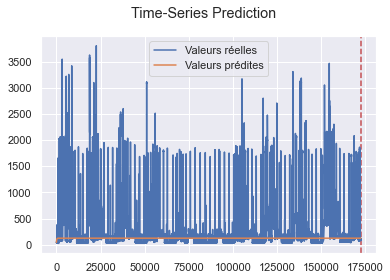

In [113]:
train_size=len(xtest)

plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(xtest,label="Valeurs réelles")
plt.plot(ytest, label="Valeurs prédites")
plt.legend()

plt.suptitle('Time-Series Prediction')
plt.show()

In [83]:
predict=pd.concat([datatest['date'],pd.DataFrame(yhat)],axis=1)

In [84]:
predict.to_csv('arima.csv',index=False)